## Import Libraries

In [1]:
# !pip install tensorflow
# !pip install tabulate
#!pip list
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.regression.linear_model import OLS, WLS
from statsmodels.tools.tools import add_constant
import os
from sklearn._loss import _loss

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats as st #has probplot() func
from scipy.stats import norm, beta
import statsmodels.api as sm # has ProbPlot with ppplot (percentiles), qqplot(quantiles),probplot(unscaled quantiles of x vs prob norm)
from statsmodels.gam.api import GLMGam, BSplines

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression,Lasso,LassoLarsIC
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,BaggingRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn import svm
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import jaccard_score, f1_score, log_loss
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.metrics import RocCurveDisplay
import sklearn.metrics as metrics
import sklearn.tree as tree

from xgboost import XGBClassifier, XGBRegressor
import xgboost

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import PredictionErrorDisplay
from sklearn.inspection import permutation_importance
from tabulate import tabulate
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV, RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import SplineTransformer
from pygam import LinearGAM, s, f, l, te
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer
from sklearn.neural_network import MLPRegressor
from numpy import random
from itertools import combinations, combinations_with_replacement
from sklearn.tree import export_graphviz, plot_tree  
import shap
shap.initjs()
from sklearn.utils.class_weight import compute_sample_weight
#from snapml import DecisionTreeRegressor as SnapDecisionTreeRegressor
#from snapml import RandomForestRegressor as SnapRandomForestRegressor
#from snapml import BoostingMachineRegressor as SnapBoostingMachineRegressor
import neuralsens.partial_derivatives as ns
import pickle
import joblib
from kneed import KneeLocator
from sklearnex import patch_sklearn


## Preprocessing

In [4]:
####CHECK STORED MODEL#####
# Deserialization
with open("dfY.pickle", "rb") as infile:
    dfYPickle = pickle.load(infile)
print("Reconstructed object", dfYPickle)
dfY=dfYPickle

# Deserialization
with open("dfGroups.pickle", "rb") as infile:
    dfGroupsPickle = pickle.load(infile)
print("Reconstructed object", dfGroupsPickle)
dfGroups=dfGroupsPickle


# Deserialization
with open("dfXTrial.pickle", "rb") as infile:
    dfXTrialPickle = pickle.load(infile)
print("Reconstructed object", dfXTrialPickle)
dfXTrial=dfXTrialPickle


# Deserialization
with open("dfXY_coils.pickle", "rb") as infile:
    dfXY_coilsPickle = pickle.load(infile)
print("Reconstructed object", dfXY_coilsPickle)
dfXY_coils=pd.DataFrame(dfXY_coilsPickle)

Reconstructed object                      AP1_FurnacePyro2Temp  AP1_FurnacePyro1Temp
ts                                                             
2024-05-09 08:40:00                1943.0           1813.500000
2024-05-09 08:42:00                1958.0           1854.449951
2024-05-09 08:44:00                1983.0           1891.800049
2024-05-09 08:46:00                1980.0           1896.300049
2024-05-09 08:48:00                1995.0           1904.100098
...                                   ...                   ...
2024-06-14 08:52:00                1632.0           1574.925049
2024-06-14 08:54:00                1638.0           1574.099976
2024-06-14 08:56:00                1629.0           1580.324951
2024-06-14 08:58:00                1618.0           1579.125000
2024-06-14 09:00:00                1646.0           1576.800049

[20323 rows x 2 columns]
Reconstructed object                     AP1_FurnaceCoilID  group
ts                                          
2024-05-09

In [5]:
#Info DF
print(dfY.shape)
print(dfXTrial.shape)
print(dfGroups.shape)
print(dfXY_coils.shape)

(20323, 2)
(20323, 22)
(20323, 2)
(21921, 1)


In [6]:
print(dfY.columns.tolist())
print(dfGroups.columns.tolist())
print(dfXTrial.columns.tolist())
print(dfXY_coils.columns.tolist())

['AP1_FurnacePyro2Temp', 'AP1_FurnacePyro1Temp']
['AP1_FurnaceCoilID', 'group']
['CurrentGuage', 'CurrentWidth', 'CoilLength', 'NetWeight', 'AP1_FurnaceCombustionAirPressureFeedback', 'AP1_FurnaceCombustionAirTempFurnace', 'AP1_FurnaceDilutionAirTemperatureFeedback', 'AP1_FurnaceRecuperatorInletTemp', 'AP1_FurnaceRecuperatorOutletTemp', 'AP1_FurnacePressureFeedback', 'AP1_FurnaceTV', 'AP1_FurnaceTonsPerHour', 'AP1_FurnaceTotalMeasuredGasFlow', 'AP1_FurnaceTotalSummedAirFlow', 'CSdeltaTmin', 'TopTemp1_2', 'TopTemp3_4_5', 'TopTemp6_7_8', 'TopGas1_2', 'TopGas3_4_5', 'TopGas6_7_8', 'SteelFamCluster']
['AP1_FurnaceCoilID']


In [7]:
dfY.head(2)

,AP1_FurnacePyro2Temp,AP1_FurnacePyro1Temp
ts,,
2024-05-09 08:40:00,1943.0,1813.500000
2024-05-09 08:42:00,1958.0,1854.449951


In [8]:
dfGroups.head(2)

,AP1_FurnaceCoilID,group
ts,,
2024-05-09 08:40:00,04BF4N,609
2024-05-09 08:42:00,04BF4N,609


In [9]:
dfXTrial.head(2)

,CurrentGuage,CurrentWidth,CoilLength,NetWeight,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceRecuperatorInletTemp,AP1_FurnaceRecuperatorOutletTemp,AP1_FurnacePressureFeedback,...,AP1_FurnaceTotalMeasuredGasFlow,AP1_FurnaceTotalSummedAirFlow,CSdeltaTmin,TopTemp1_2,TopTemp3_4_5,TopTemp6_7_8,TopGas1_2,TopGas3_4_5,TopGas6_7_8,SteelFamCluster
ts,,,,,,,,,,,,,,,,,,,,,
2024-05-09 08:40:00,0.04,61.4117,8090.3,69160.0,1.014615,373.529572,370.505768,886.068848,591.896973,0.113508,...,58982.066406,696512.9375,1.280313,1975.973083,1961.091105,1969.642822,3830.643799,3250.673991,1955.353475,0.0
2024-05-09 08:42:00,0.04,61.4117,8090.3,69160.0,0.956586,378.090790,374.100006,941.030396,619.748901,0.115873,...,62768.312500,735397.8750,1.280313,1998.330811,1986.797852,2020.612590,3887.743530,3273.397949,2087.333455,0.0


In [10]:
dfXY_coils.head(2)

,AP1_FurnaceCoilID
ts,
2024-05-09 08:40:00,04BF4N
2024-05-09 08:42:00,04BF4N


## Corr and Vif

In [11]:
dfX=dfXTrial.copy()

In [12]:
def variance_inflation_factor(exog, exog_idx):
    """
    exog : ndarray, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    """
    k_vars = exog.shape[1]
    x_i = exog[:, exog_idx]
    mask = np.arange(k_vars) != exog_idx
    x_noti = exog[:, mask]
    r_squared_i = OLS(x_i, x_noti, missing="drop").fit().rsquared
    if r_squared_i!=1:
        vif = 1. / (1. - r_squared_i)
    else:
        vif = np.nan
    return vif

def variance_inflation_factor_sklearn(exog, exog_idx):
    """
    exog : ndarray, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    """
    k_vars = exog.shape[1]
    x_i = exog[:, exog_idx]
    mask = np.arange(k_vars) != exog_idx
    x_noti = exog[:, mask]
    r_squared_i = LinearRegression().fit(X=x_noti,y=x_i).score(X=x_noti,y=x_i)#OLS(x_i, x_noti, missing="drop").fit().rsquared
    if r_squared_i!=1:
        vif = 1. / (1. - r_squared_i)
    else:
        vif = np.nan
    return vif

In [13]:
#Compute VIF
vif_data=pd.DataFrame()
vif_data["feature"]=dfX.columns
vif_data["dtype"]=dfX.dtypes
vif_data["VIF_OLS"]=[variance_inflation_factor(add_constant(dfX,prepend=False,has_constant='add').values,i) for i in range(len(dfX.columns))]
vif_data["VIF_sklearn"]=[variance_inflation_factor_sklearn(dfX.dropna(axis=0).values,i) for i in range(len(dfX.columns))]
#vif_data.assign(dtype= lambda x: dfX.dtypes.loc[x.feature])
for i in range(vif_data.shape[0]):
    vif_data.iloc[i,1]=dfX.dtypes.loc[vif_data.feature[i]]
print(vif_data.shape)
vif_data.sort_values(by='VIF_sklearn',ascending=False,na_position='first')

(22, 4)


,feature,dtype,VIF_OLS,VIF_sklearn
5,AP1_FurnaceCombustionAirTempFurnace,float64,8818.997288,8818.997288
6,AP1_FurnaceDilutionAirTemperatureFeedback,float64,7910.716307,7910.716307
7,AP1_FurnaceRecuperatorInletTemp,float64,579.624718,579.624718
8,AP1_FurnaceRecuperatorOutletTemp,float64,335.176066,335.176066
12,AP1_FurnaceTotalMeasuredGasFlow,float64,283.816528,283.816528
13,AP1_FurnaceTotalSummedAirFlow,float64,199.644605,199.644605
10,AP1_FurnaceTV,float64,121.654612,121.654612
11,AP1_FurnaceTonsPerHour,float64,109.142604,109.142604
9,AP1_FurnacePressureFeedback,float64,90.840122,90.840122
4,AP1_FurnaceCombustionAirPressureFeedback,float64,88.727371,88.727371


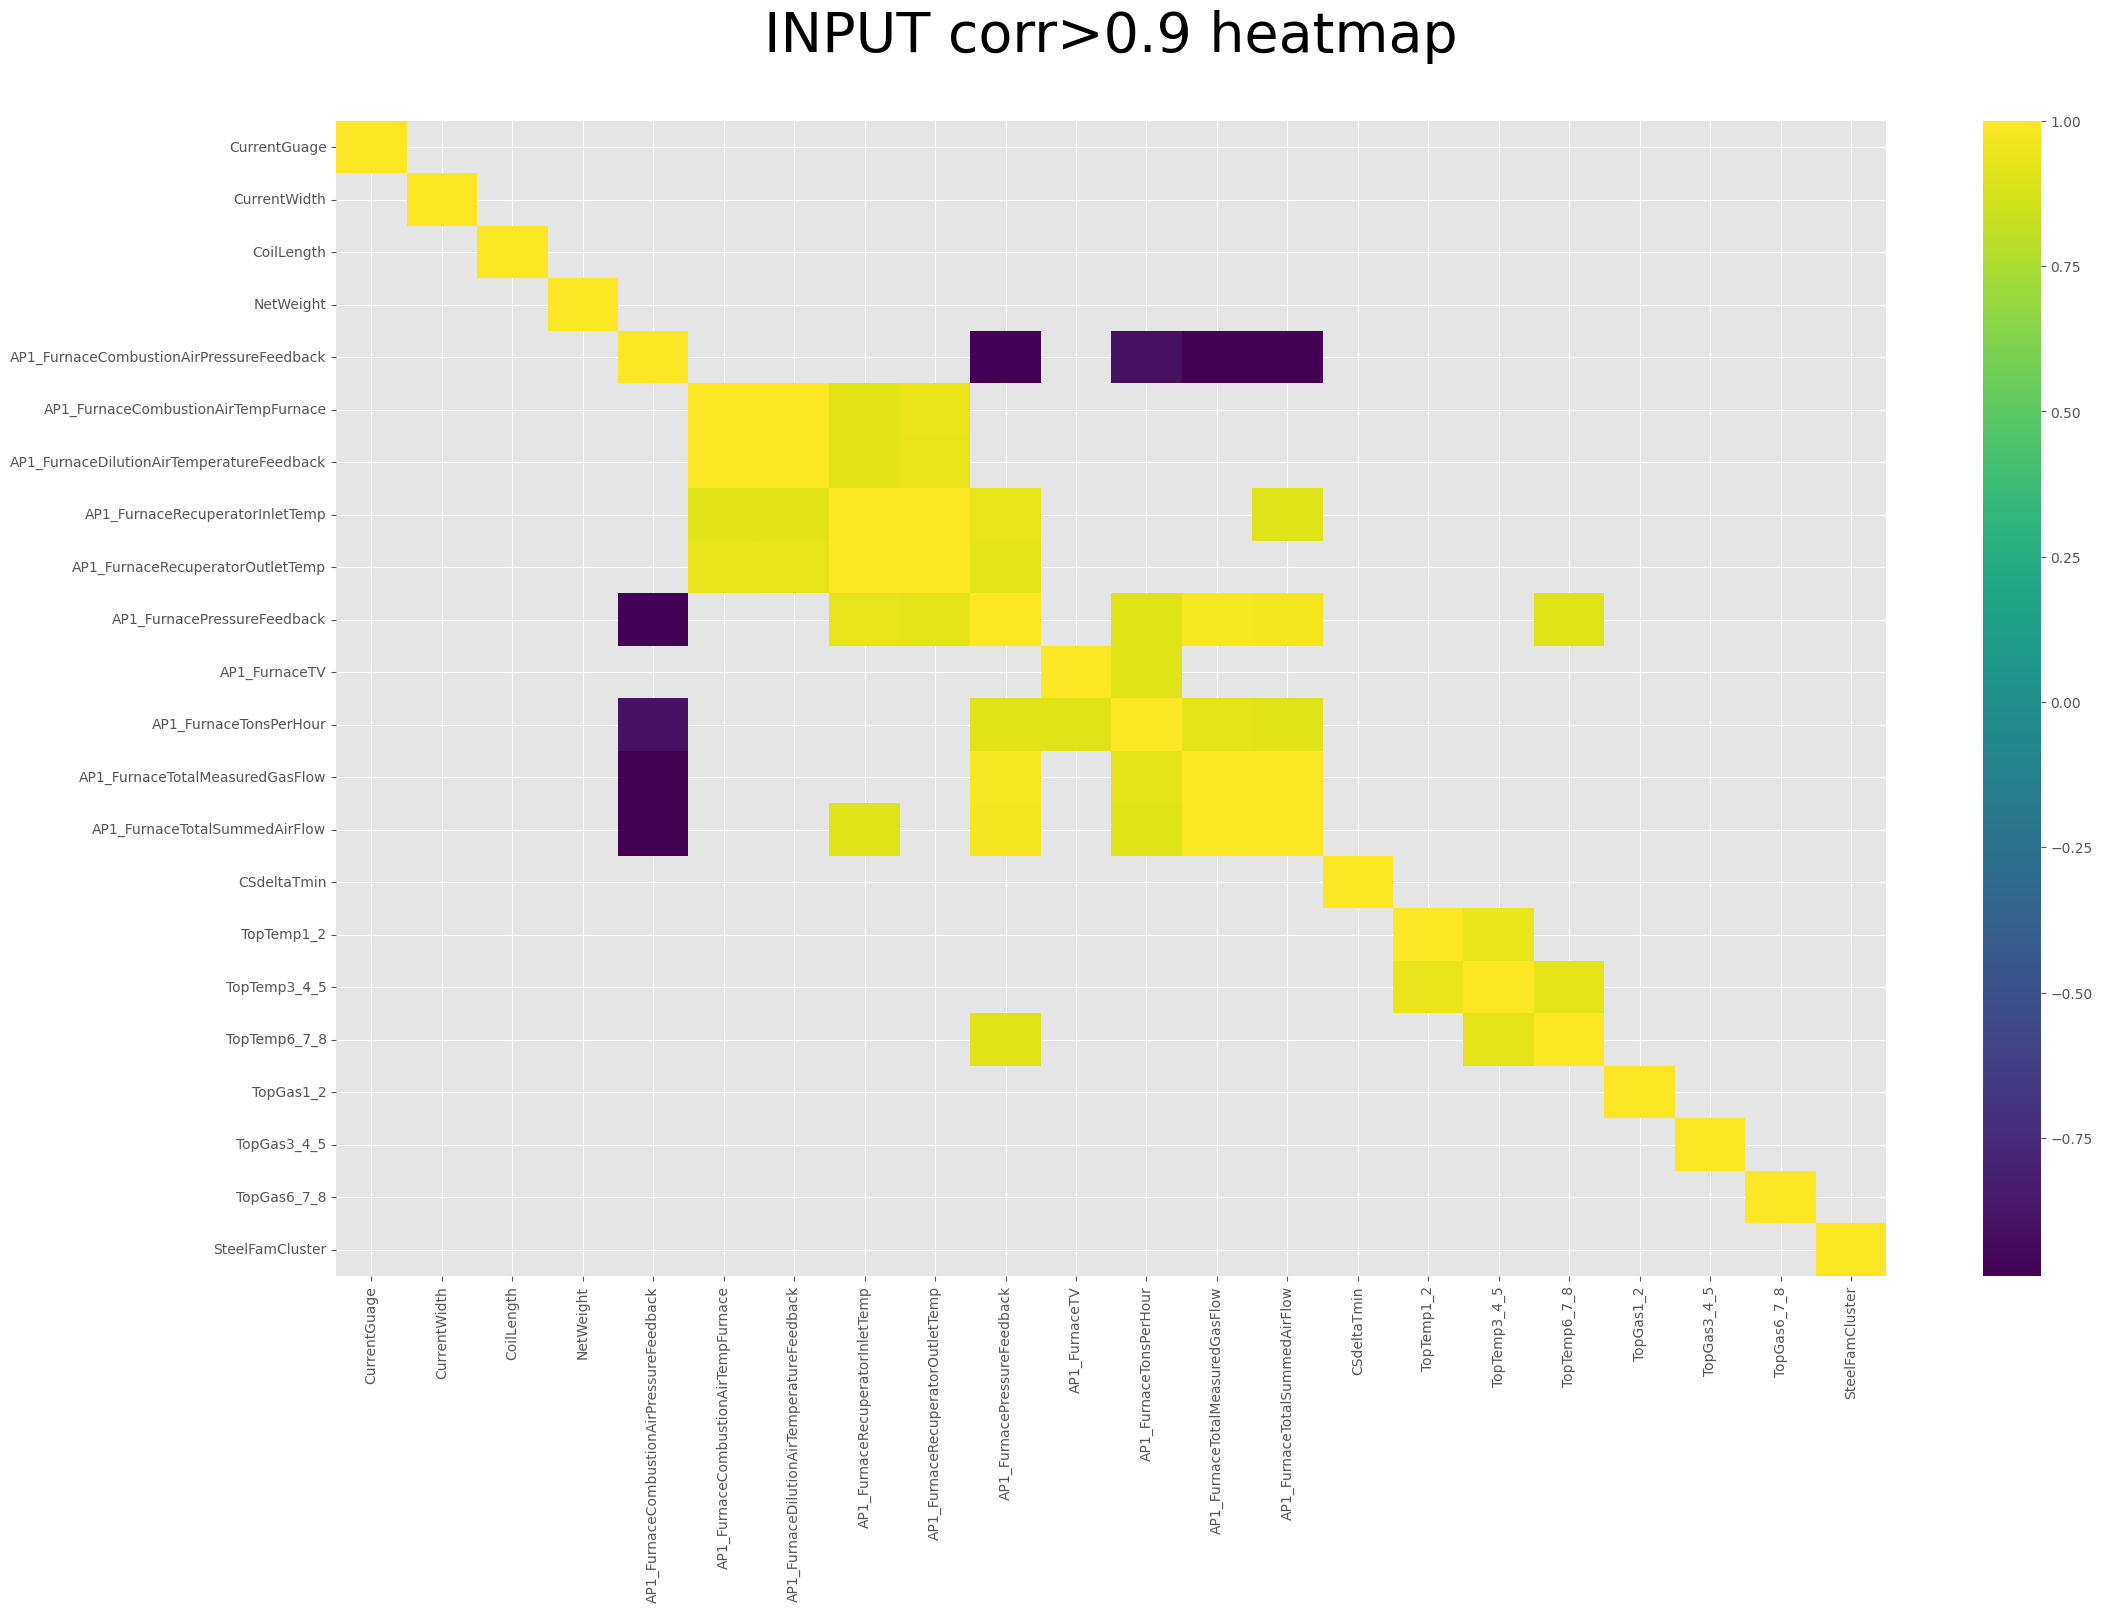

In [14]:
#Plot df corr heatmap
plt.figure(figsize=(25,15))
# sns.set_context('paper', font_scale=1.4)
xcorr_df = dfX.corr(method='pearson',numeric_only=True).map(lambda x: None if np.abs(x)<0.9 else x)#method='spearman'
sns.heatmap(xcorr_df, cmap='viridis')
plt.title("INPUT corr>0.9 heatmap",fontsize=40,pad=50)
plt.grid(visible=True,which='both',axis='both')
plt.show()

## Split & sample_weight

In [15]:
X=np.asarray(dfX.drop("SteelFamCluster",axis=1))
SFC_array=np.asarray(dfX.SteelFamCluster).reshape(-1,1)
y=np.asarray(dfY)
groups=np.asarray(dfGroups.group)
scaler=StandardScaler().fit(X)#Dont scale categorical encoded vars(SteelFamCluster)
X=scaler.transform(X)
X=np.concatenate((X,SFC_array),axis=1)
print(f"There are {len(dfGroups.AP1_FurnaceCoilID.unique())} unique coils and {len(dfGroups.group.unique())} unique groups")#dfXY_coils.loc[dfXY.index].unique()
len(dfXY_coils.loc[dfX.index]["AP1_FurnaceCoilID"].unique())#dfXY
#X=np.concatenate((X,groups.reshape(-1,1)),axis=1)#[:,-1]

There are 911 unique coils and 911 unique groups


911

In [16]:
scaler.inverse_transform(X[:,:-1])

array([[4.00000000e-02, 6.14117000e+01, 8.09030000e+03, ...,
        3.83064380e+03, 3.25067399e+03, 1.95535347e+03],
       [4.00000000e-02, 6.14117000e+01, 8.09030000e+03, ...,
        3.88774353e+03, 3.27339795e+03, 2.08733346e+03],
       [4.00000000e-02, 6.14117000e+01, 8.09030000e+03, ...,
        3.75654285e+03, 3.25288460e+03, 2.11572970e+03],
       ...,
       [2.32000000e-02, 6.16086000e+01, 1.40650000e+04, ...,
        3.48365784e+03, 1.34707416e+03, 9.62050598e+02],
       [2.32000000e-02, 6.16086000e+01, 1.40650000e+04, ...,
        3.45811420e+03, 1.35854490e+03, 9.67776265e+02],
       [2.32000000e-02, 6.16086000e+01, 1.40650000e+04, ...,
        3.44852325e+03, 1.35032666e+03, 9.60403259e+02]])

In [17]:
#Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42,stratify=groups)#Keeps % of groups in the splits, not group splitting
#[x for x in Xtrain[:,-1].tolist() if x in Xtest[:,-1].tolist()]
gss=GroupShuffleSplit(n_splits=1, train_size=.8, random_state=42)
for i, (train_index, test_index) in enumerate(gss.split(X, y, groups)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}, group={groups[train_index]}")
    print(f"  Test:  index={test_index}, group={groups[test_index]}")
    train_idx=train_index
    test_idx=test_index
#Check groups splitted: OK
print([x for x in groups[train_idx].tolist() if x in groups[test_idx].tolist()])
Xtrain=X[train_idx]
print(np.shape(Xtrain))
Xtest=X[test_idx]
print(np.shape(Xtest))
ytrain=y[train_idx]
print(np.shape(ytrain))
ytest=y[test_idx]
print(np.shape(ytest))

Fold 0:
  Train: index=[    0     1     2 ... 20320 20321 20322], group=[609 609 609 ... 776 776 776]
  Test:  index=[   58    59    60 ... 20031 20032 20033], group=[605 605 605 ... 863 863 863]
[]
(16403, 22)
(3920, 22)
(16403, 2)
(3920, 2)


In [18]:
sample_weight=compute_sample_weight(class_weight="balanced", y=X[:,-1])
train_sample_weight=compute_sample_weight(class_weight="balanced", y=Xtrain[:,-1])
test_sample_weight=compute_sample_weight(class_weight="balanced", y=Xtest[:,-1])
train_sample_weight

array([0.6768031 , 0.6768031 , 0.6768031 , ..., 1.91400233, 1.91400233,
       1.91400233])

## Models

### LinearRegressor

In [39]:
#With sklearn
reg=LinearRegression(n_jobs=-1).fit(Xtrain,ytrain[:,0],sample_weight=train_sample_weight)#,sample_weight=train_sample_weight

# Serialization
with open("regModel.pickle", "wb") as outfile:
    pickle.dump(reg, outfile)
print("Written object", reg)

print("R2 for training: ",reg.score(Xtrain,ytrain[:,0]))
print("R2 for test: ",reg.score(Xtest,ytest[:,0]))
ypred=reg.predict(Xtest)#returns shape (n_samples,1) instead of the supposedly (n_samples,)
LinearRegression_MAE = mean_absolute_error(ypred,ytest[:,0])
LinearRegression_MSE = mean_squared_error(ypred,ytest[:,0])
LinearRegression_RMSE = root_mean_squared_error(ypred,ytest[:,0])
LinearRegression_R2 = r2_score(ypred,ytest[:,0])
ReportLR = pd.DataFrame({'MAE':[LinearRegression_MAE],'MSE':[LinearRegression_MSE],'RMSE':[LinearRegression_RMSE],'R2':[LinearRegression_R2]},index=['LinearR'])#pd.DataFrame.from_dict
ReportLR

Written object LinearRegression(n_jobs=-1)
R2 for training:  0.9414270091912611
R2 for test:  0.9332638817835561


,MAE,MSE,RMSE,R2
LinearR,27.754693,1584.528781,39.80614,0.930635


In [40]:
####CHECK STORED MODEL#####
# Deserialization
with open("regModel.pickle", "rb") as infile:
    regModelPickle = pickle.load(infile)
print("Reconstructed object", regModelPickle)

Reconstructed object LinearRegression(n_jobs=-1)


In [41]:
#With statsmodel
#reg_stats=OLS(ytrain,add_constant(Xtrain), missing="drop").fit()
reg_stats=WLS(ytrain[:,0],add_constant(Xtrain), weights=train_sample_weight, missing="drop").fit()
print(reg_stats.summary())
nonsig_label=[]
sig_label=dfX.columns.tolist()
tune_idx=np.arange(len(dfX.columns))
pd.DataFrame(data=[np.round(reg_stats.params,2).reshape(1,-1)[0],np.insert(reg.coef_.reshape(1,-1),0,reg.intercept_)],index=["reg_stats coeff","reg_sklearn coeff"],columns=['intercept']+dfX.columns.tolist()).sort_values(by="reg_stats coeff",key=np.abs,axis=1,ascending=False).round(3)

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            WLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 1.512e+04
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:10:32   Log-Likelihood:                -83501.
No. Observations:               16403   AIC:                         1.670e+05
Df Residuals:                   16380   BIC:                         1.672e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1936.9261      0.624   3104.991      0.0

,intercept,AP1_FurnaceCombustionAirTempFurnace,SteelFamCluster,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceRecuperatorOutletTemp,AP1_FurnaceTV,TopTemp6_7_8,TopGas6_7_8,AP1_FurnacePressureFeedback,TopGas3_4_5,...,AP1_FurnaceRecuperatorInletTemp,AP1_FurnaceCombustionAirPressureFeedback,TopTemp3_4_5,CurrentGuage,AP1_FurnaceTotalMeasuredGasFlow,CSdeltaTmin,CoilLength,TopTemp1_2,TopGas1_2,NetWeight
reg_stats coeff,1936.930,-219.17,-186.390,168.710,108.220,-97.250,64.970,-43.830,-42.070,39.640,...,25.45,-22.700,14.340,12.700,-11.300,-10.260,9.560,6.230,3.210,-1.740
reg_sklearn coeff,1936.926,-219.17,-186.388,168.705,108.215,-97.251,64.971,-43.826,-42.069,39.638,...,25.45,-22.701,14.345,12.704,-11.297,-10.259,9.564,6.234,3.213,-1.739


In [42]:
#NON-SIGNIFICANT COEFFs: 6,7,25,26,31,32 ('AP1_FurnaceZone3TopTemp','AP1_FurnaceZone4TopTemp','AP1_FurnaceZone6TopGasFlowFeedback','AP1_FurnaceZone7TopAirFlowFeedback','AP1_FurnaceCombustionAirTempFurnace','AP1_FurnaceDilutionAirTemperatureFeedback'):39(AP1_FurnaceTotalMeasuredGasFlow)
print(f"model with fvalue={reg_stats.fvalue} and f-pvalue={reg_stats.f_pvalue}")
reg_stats.resid
dfCoef=pd.DataFrame(data=[reg_stats.params[1:],reg_stats.tvalues[1:],reg_stats.pvalues[1:],np.array([idx for idx,label in enumerate(dfX.columns) if label in sig_label])],columns=dfX[sig_label].columns,index=["coefs","tstat","pvalue","idx"]).round(4).T
dfCoef.idx=dfCoef.idx.astype(np.int64)
dfCoef=dfCoef[dfCoef.pvalue>=0.005]
nonsig_idx=dfCoef.idx
sig_idx=[x for x in np.arange(len(dfX.columns)) if x not in nonsig_idx.tolist()]
# nonsig_label=[x for x in dfX.columns.tolist() if x in dfX.columns[nonsig_idx.tolist()]]
# sig_label=[x for x in dfX.columns.tolist() if x not in nonsig_label]
nonsig_label=list(set(nonsig_label+dfCoef.index.tolist()))#Remove duplicates
sig_label=[x for x in dfX.columns.tolist() if x not in nonsig_label]
print(f"From the {dfX.shape[1]} vars, {len(sig_label)} are significant and {len(nonsig_label)} are not")
print(nonsig_label)
print(len(dfCoef.idx))
dfCoef

model with fvalue=15119.1802467497 and f-pvalue=0.0
From the 22 vars, 20 are significant and 2 are not
['NetWeight', 'AP1_FurnaceTotalMeasuredGasFlow']
2


,coefs,tstat,pvalue,idx
NetWeight,-1.7389,-2.6603,0.0078,3
AP1_FurnaceTotalMeasuredGasFlow,-11.2967,-2.1824,0.0291,12


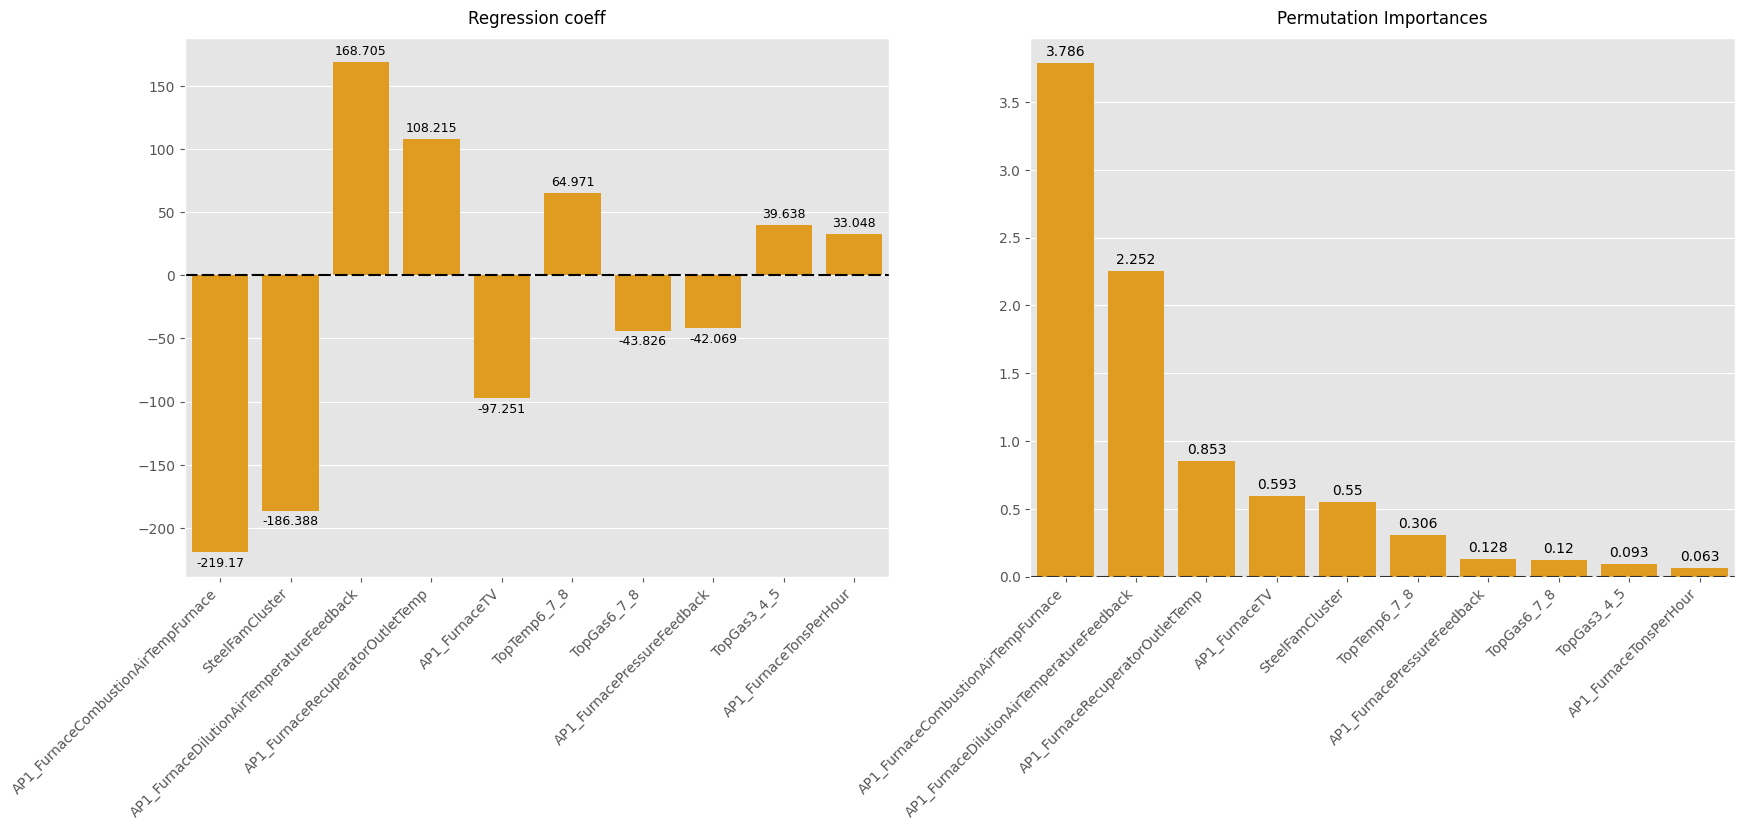

In [43]:
#FEATURE IMPORTANCE
imp_idx=np.flip(np.argsort(np.abs(reg.coef_))[-10:])#Flip to get desc order the 10 bigger elem
fig,axes=plt.subplots(1,2,figsize=(20,7))
sns.barplot(data=np.round(reg.coef_[imp_idx],3),color='orange',ax=axes[0])
axes[0].set_title(label="Regression coeff",loc='center',pad=10,fontsize="large")
# axes.get_xticks()
axes[0].set_xticks(axes[0].get_xticks(),labels=dfX.columns[imp_idx].tolist(),rotation=45,ha='right')
#axes.set_xticklabels(dfX.columns[np.flip(np.argsort(np.abs(reg.coef_[0]))[-10:])].tolist(),rotation=90)
axes[0].bar_label(axes[0].containers[0], fontsize=9, padding=3)
axes[0].axhline(0, color="k", dashes=(6, 2))
axes[0].tick_params(axis='x', labelsize=10)

pi=permutation_importance(reg, Xtest, ytest[:,0],sample_weight=test_sample_weight, n_jobs=-1, n_repeats=10,random_state=42)
pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean))[-10:])
sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),color='orange',ax=axes[1])
axes[1].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
axes[1].set_xticks(axes[1].get_xticks(),labels=dfX.columns[pimp_idx].tolist(),rotation=45,ha='right')
axes[1].bar_label(axes[1].containers[0], fontsize=10, padding=3)
axes[1].axhline(0, color="k", dashes=(6, 2))
axes[1].tick_params(axis='x', labelsize=10)

In [44]:
#RESIDUAL ANALYSIS
def func_residual_analysis(estimator,ypred,xtest,ytest):
    #Visualization
    fig,axes=plt.subplots(2,2,figsize=(11,8))
    fig.suptitle("Residual Analysis",fontsize=30)
    print("Plot 1")
    sns.histplot(data=ytest-ypred,kde=True,color="paleturquoise",ax=axes[0,0],legend=False)#,hue='clustersGMM',hue='SteelFamCluster',color="cadetblue"
    axes[0,0].set_title(label="Residuals Distribution",loc='center',pad=10,fontsize="medium")

    print("Plot 2")
    #PredictionErrorDisplay.from_estimator(estimator=estimator, X=xtest, y=ytest.reshape(1,-1)[0],kind="residual_vs_predicted",subsample=50000,random_state=42,line_kwargs={'lw':2,'color':'black'},scatter_kwargs={'s':20,'lw':0.3,'color':'lightseagreen','edgecolors':'black','alpha':0.8},ax=axes[0,1])#“actual_vs_predicted”
    sns.scatterplot(x=ypred.reshape(1,-1)[0],y=(ytest-ypred).reshape(1,-1)[0],s=20,linewidths=0.2,edgecolors='k',c='green',alpha=0.9,legend=False,ax=axes[0,1])#
    axes[0,1].axhline(0, color="k", dashes=(6, 2))
    axes[0,1].set_xlabel(xlabel="ypred",labelpad=5,fontsize="large")
    axes[0,1].set_ylabel(ylabel="Residuals",labelpad=15,fontsize="large")
    axes[0,1].set_title(label="Residuals vs Predicted",loc='center',pad=10,fontsize="medium")

    print("Plot 3")
    #st.probplot((ytest-ypred).reshape(1,-1)[0],plot=plt)#.qqplot(line='s')#, ax=ax[1]
    #sm.ProbPlot((ytest-ypred).reshape(1,-1)[0]).ppplot()
    qq=sm.ProbPlot((ytest-ypred).reshape(1,-1)[0],fit=False).qqplot(line="s",markerfacecolor='lightseagreen',alpha=0.8,markersize=4,markeredgecolor='black',markeredgewidth=0.5,ax=axes[1,0])#line="s",linestyle='--',color='yellow'
    #sm.qqline(qq.axes[0],line="s",x=qq.)
    #sm.ProbPlot((ytest-ypred).reshape(1,-1)[0]).probplot()
    #Customize reference line
    line=qq.findobj(lambda x: hasattr(x, 'get_color') and x.get_color() == 'r')#get line children
    line[0].set_c('fuchsia')
    line[0].set_linestyle('--')
    line[0].set_lw(1.5)
    axes[1,0].set_title(label="Q-Q Plot",loc='center',pad=10,fontsize="medium")

    print("Plot 4")
    sns.scatterplot(data=(ytest-ypred),s=20,linewidths=0.2,edgecolors='k',c='green',alpha=0.9,legend=False,ax=axes[1,1])#
    axes[1,1].set_title(label="Residuals vs RowNumber",loc='center',pad=10,fontsize="medium")
    axes[1,1].axhline(0, color="k", dashes=(6, 2))
    axes[1,1].set_xlabel(xlabel="Row Number",labelpad=5,fontsize="large")
    axes[1,1].set_ylabel(ylabel="Residuals",labelpad=15,fontsize="large")
    
    fig.tight_layout(pad=3)


Plot 1
Plot 2
Plot 3
Plot 4


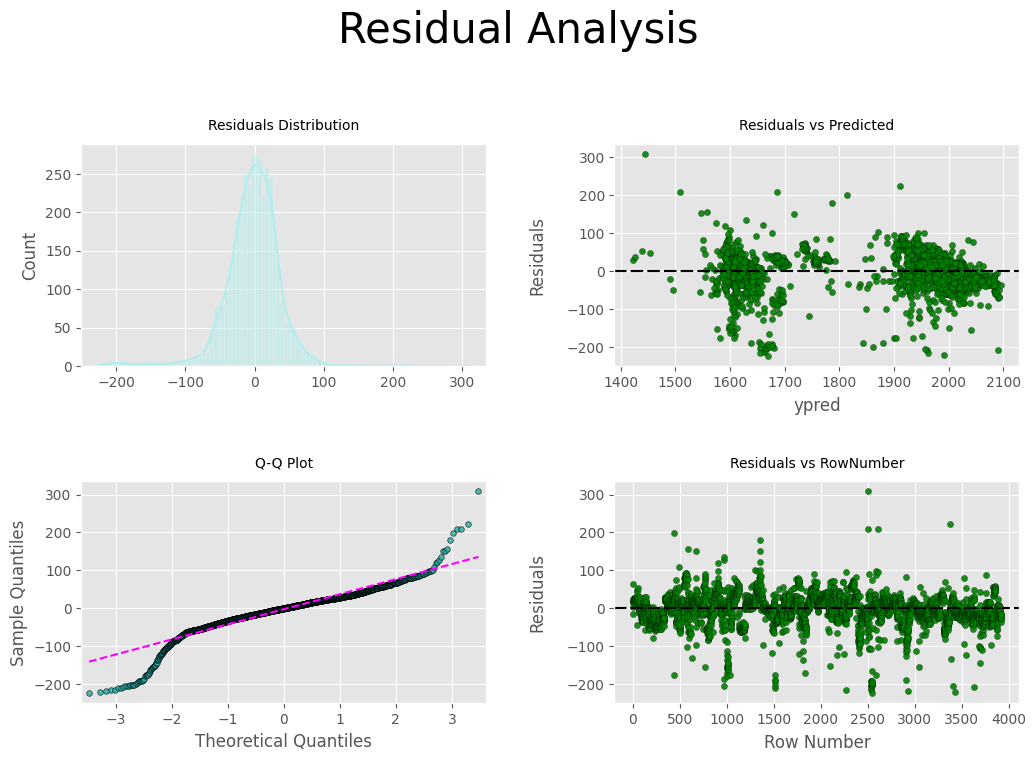

In [45]:
func_residual_analysis(estimator=reg,ypred=ypred,xtest=Xtest,ytest=ytest[:,0])

idx is 2
Written object LinearRegression(n_jobs=-1)
idx is 0
Written object LinearRegression(n_jobs=-1)
Model tuned with 2 iterations
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            WLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 1.662e+04
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:10:39   Log-Likelihood:                -83507.
No. Observations:               16403   AIC:                         1.671e+05
Df Residuals:                   16382   BIC:                         1.672e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

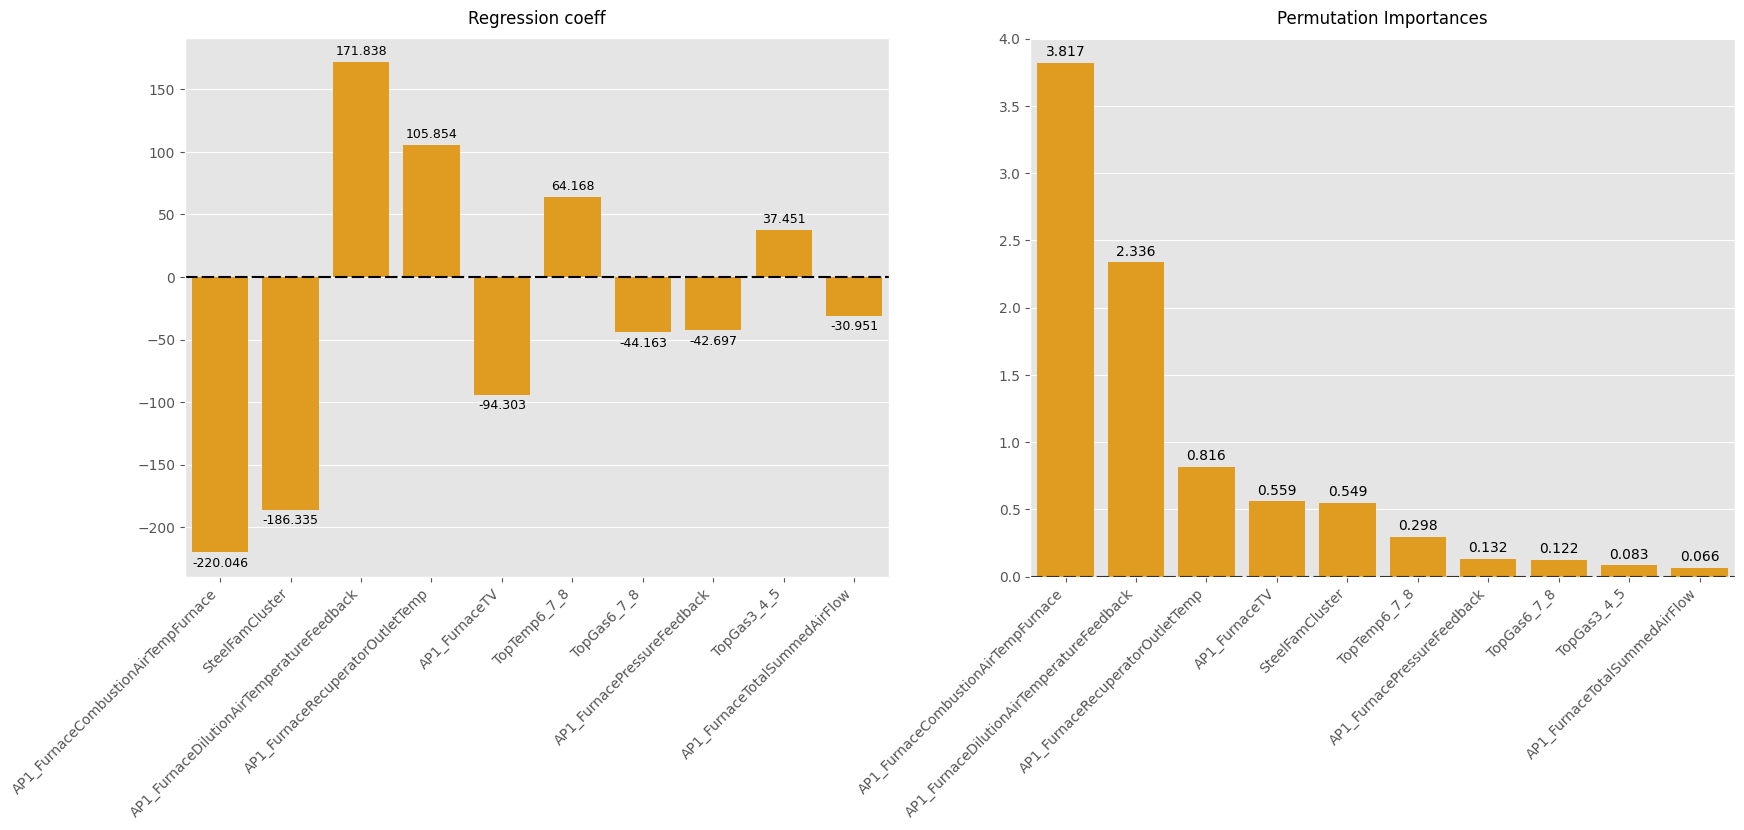

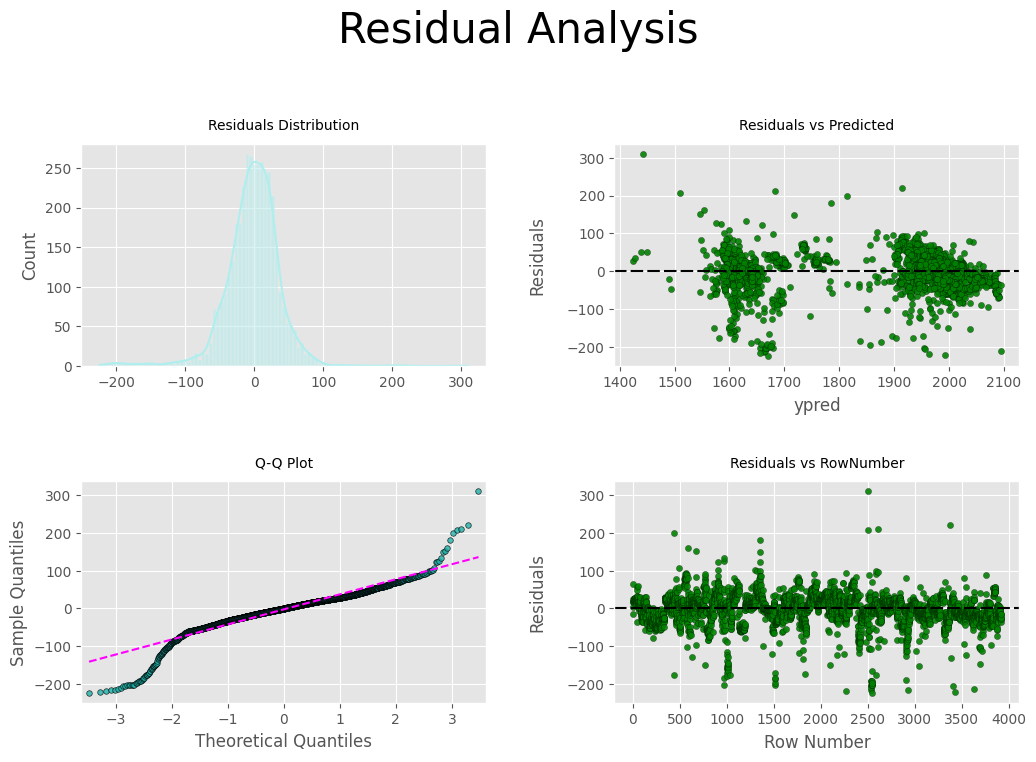

In [46]:
#TUNE FINAL MODEL
cont=0
idx=dfX.shape[1]#Initialise with worst case all vars are nonsig

while (cont<10) and idx>0:
    idx=len(dfCoef.idx)
    print(f"idx is {idx}")
    #With sklearn tuned
    tuned_idx=[i for i in np.arange(len(dfX.columns)) if dfX.columns[i] in sig_label]
    #print(nonsig_label)
    reg=LinearRegression(n_jobs=-1).fit(Xtrain[:,tuned_idx],ytrain[:,0],sample_weight=train_sample_weight)
    
    # Serialization
    with open("regModel.pickle", "wb") as outfile:
        pickle.dump([reg,tuned_idx], outfile)
    print("Written object", reg)
    
    # print("R2 for training: ",reg.score(Xtrain[:,tuned_idx],ytrain))
    # print("R2 for test: ",reg.score(Xtest[:,tuned_idx],ytest))
    #print(np.shape(Xtrain[:,tuned_idx]))
    ypred=reg.predict(Xtest[:,tuned_idx])
    LinearRegression_MAE = mean_absolute_error(ypred,ytest[:,0])
    LinearRegression_MSE = mean_squared_error(ypred,ytest[:,0])
    LinearRegression_RMSE = root_mean_squared_error(ypred,ytest[:,0])
    LinearRegression_R2 = r2_score(ypred,ytest[:,0])
    ReportLR = pd.DataFrame({'MAE':[LinearRegression_MAE],'MSE':[LinearRegression_MSE],'RMSE':[LinearRegression_RMSE],'R2':[LinearRegression_R2]},index=['LinearR'])#pd.DataFrame.from_dict
    #ReportLR
    
    
    
    
    #With statsmodel tuned
    #reg_stats=OLS(ytrain,add_constant(Xtrain[:,tuned_idx]), missing="drop").fit()
    reg_stats=WLS(ytrain[:,0],add_constant(Xtrain[:,tuned_idx]), weights=train_sample_weight, missing="drop").fit()
    #print(reg_stats.summary())
    #pd.DataFrame(data=[np.round(reg_stats.params,2).reshape(1,-1)[0],np.insert(reg.coef_.reshape(1,-1),0,reg.intercept_)],index=["reg_stats coeff","reg_sklearn coeff"],columns=['intercept']+dfX.columns[tuned_idx].tolist()).sort_values(by="reg_stats coeff",key=np.abs,axis=1,ascending=False).round(3)
    
    
    
    
    
    #NON-SIGNIFICANT COEFFs: 6,7,25,26,31,32 ('AP1_FurnaceZone3TopTemp','AP1_FurnaceZone4TopTemp','AP1_FurnaceZone6TopGasFlowFeedback','AP1_FurnaceZone7TopAirFlowFeedback','AP1_FurnaceCombustionAirTempFurnace','AP1_FurnaceDilutionAirTemperatureFeedback'):33()
    #print(f"model with fvalue={reg_stats.fvalue} and f-pvalue={reg_stats.f_pvalue}")
    #reg_stats.resid
    dfCoef=pd.DataFrame(data=[reg_stats.params[1:],reg_stats.tvalues[1:],reg_stats.pvalues[1:],np.array([idx for idx,label in enumerate(dfX.columns) if label in sig_label])],columns=dfX[sig_label].columns,index=["coefs","tstat","pvalue","idx"]).round(4).T
    dfCoef.idx=dfCoef.idx.astype(np.int64)
    dfCoef=dfCoef[dfCoef.pvalue>=0.005]
    nonsig_idx=dfCoef.idx
    sig_idx=[x for x in np.arange(len(dfX.columns)) if x not in nonsig_idx.tolist()]
    # nonsig_label=[x for x in dfX.columns.tolist() if x in dfX.columns[nonsig_idx.tolist()]]
    # sig_label=[x for x in dfX.columns.tolist() if x not in nonsig_label]
    nonsig_label=list(set(nonsig_label+dfCoef.index.tolist()))#Remove duplicates
    sig_label=[x for x in dfX.columns.tolist() if x not in nonsig_label]
    #print(f"From the {dfX.shape[1]} vars, {len(sig_label)} are significant and {len(nonsig_label)} are not")
    #print(nonsig_label)
    #dfCoef

    # print(f"Model tuned with {cont} iterations")
    # print(reg_stats.summary())
    # print(f"model with fvalue={reg_stats.fvalue} and f-pvalue={reg_stats.f_pvalue}")
    # print("R2 for training: ",reg.score(Xtrain[:,tuned_idx],ytrain))
    # print("R2 for test: ",reg.score(Xtest[:,tuned_idx],ytest))
    # print(f"From the {dfX.shape[1]} vars, {len(sig_label)} are significant and {len(nonsig_label)} are not")
    # print(nonsig_label)
    
    cont+=1
    if idx==0:
        print(f"Model tuned with {cont} iterations")
        print(reg_stats.summary())
        print(f"model with fvalue={reg_stats.fvalue} and f-pvalue={reg_stats.f_pvalue}")
        print("R2 for training: ",reg.score(Xtrain[:,tuned_idx],ytrain[:,0]))
        print("R2 for test: ",reg.score(Xtest[:,tuned_idx],ytest[:,0]))
                
    elif cont==10:
        print("Max iterations reached")
        print(tabulate(dfCoef))
        print(tabulate(ReportLR))
        

if idx==0:
    #FEATURE IMPORTANCE
    imp_idx=np.flip(np.argsort(np.abs(reg.coef_))[-10:])#Flip to get desc order the 10 bigger elem
    labels=dfX.columns[tuned_idx][imp_idx].tolist()
    fig,axes=plt.subplots(1,2,figsize=(20,7))
    sns.barplot(data=np.round(reg.coef_[imp_idx],3),color='orange',ax=axes[0])
    axes[0].set_title(label="Regression coeff",loc='center',pad=10,fontsize="large")
    # axes.get_xticks()
    axes[0].set_xticks(axes[0].get_xticks(),labels=labels,rotation=45,ha='right')
    #axes.set_xticklabels(dfX.columns[np.flip(np.argsort(np.abs(reg.coef_[0]))[-10:])].tolist(),rotation=90)
    axes[0].bar_label(axes[0].containers[0], fontsize=9, padding=3)
    axes[0].axhline(0, color="k", dashes=(6, 2))
    axes[0].tick_params(axis='x', labelsize=10)
    
    pi=permutation_importance(reg, Xtest[:,tuned_idx], ytest[:,0], sample_weight=test_sample_weight, n_jobs=-1, n_repeats=10,random_state=42)
    pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean))[-10:])
    labels=dfX.columns[tuned_idx][pimp_idx].tolist()
    sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),color='orange',ax=axes[1])
    axes[1].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
    axes[1].set_xticks(axes[1].get_xticks(),labels=labels,rotation=45,ha='right')
    axes[1].bar_label(axes[1].containers[0], fontsize=10, padding=3)
    axes[1].axhline(0, color="k", dashes=(6, 2))
    axes[1].tick_params(axis='x', labelsize=10)
    
    
    
    
    #RESIDUAL ANALYSIS
    func_residual_analysis(estimator=reg,ypred=ypred,xtest=Xtest[:,tuned_idx],ytest=ytest[:,0])

In [47]:
print(f"{len(tuned_idx)} selected variables out of {X.shape[1]}")
print(f"Removed variables are: {nonsig_label}")

20 selected variables out of 22
Removed variables are: ['NetWeight', 'AP1_FurnaceTotalMeasuredGasFlow']


In [48]:
####CHECK STORED MODEL#####
# Deserialization
with open("regModel.pickle", "rb") as infile:
    regModelPickle = pickle.load(infile)[0]
print("Reconstructed object", regModelPickle)

####CHECK STORED MODEL#####
# Deserialization
with open("regModel.pickle", "rb") as infile:
   tuned_idxPickle = pickle.load(infile)[1]
print("Reconstructed object", tuned_idxPickle)

#Test gives same results
ypred=regModelPickle.predict(Xtest[:,tuned_idx])
LinearRegression_MAE = mean_absolute_error(ypred,ytest[:,0])
LinearRegression_MSE = mean_squared_error(ypred,ytest[:,0])
LinearRegression_RMSE = root_mean_squared_error(ypred,ytest[:,0])
LinearRegression_R2 = r2_score(ypred,ytest[:,0])
pd.DataFrame({'MAE':[LinearRegression_MAE],'MSE':[LinearRegression_MSE],'RMSE':[LinearRegression_RMSE],'R2':[LinearRegression_R2]},index=['LinearR'])#pd.DataFrame.from_dict

Reconstructed object LinearRegression(n_jobs=-1)
Reconstructed object [np.int64(0), np.int64(1), np.int64(2), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21)]


,MAE,MSE,RMSE,R2
LinearR,27.823533,1591.164001,39.889397,0.930354


In [49]:
ReportLR

,MAE,MSE,RMSE,R2
LinearR,27.823533,1591.164001,39.889397,0.930354


In [50]:
#CHECK MODEL STABILITY
R2=[]
RMSE=[]
gss=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)
for i, (train2_index, val_index) in enumerate(gss.split(Xtrain[:,tuned_idx], ytrain, groups[train_idx])):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}, group={groups[train2_index]}")
    print(f"  Test:  index={val_index}, group={groups[val_index]}")
    train2_idx=train2_index
    val_idx=val_index
    #Check groups splitted: OK
    print([x for x in groups[train_idx][train2_idx].tolist() if x in groups[train_idx][val_idx].tolist()])
    Xtrain2=Xtrain[:,tuned_idx][train2_idx]
    Xval=Xtrain[:,tuned_idx][val_idx]
    ytrain2=ytrain[train2_idx]
    yval=ytrain[val_idx]
    train2_sample_weight=compute_sample_weight(class_weight="balanced", y=Xtrain2[:,-1])
    #R2
    
    regStab=LinearRegression().fit(Xtrain2,ytrain2[:,0],sample_weight=train2_sample_weight)
    ypred2=regStab.predict(Xval)
    RMSE.append(root_mean_squared_error(ypred2,yval[:,0]))
    R2.append(r2_score(ypred2,yval[:,0]))

print(f"\n avg validation R2={np.round(np.mean(R2),3)}+-{np.round(np.std(R2),3)}")
print(f"avg validation RMSE={np.round(np.mean(RMSE),3)}+-{np.round(np.std(RMSE),3)}")
R2

Fold 0:
  Train: index=[    0     1     2 ... 20320 20321 20322], group=[609 609 609 ... 741 741 741]
  Test:  index=[   30    31    32 ... 16369 16370 16371], group=[418 418 418 ... 739 739 739]
[]
Fold 1:
  Train: index=[    0     1     2 ... 20320 20321 20322], group=[418 418 418 ... 739 739 739]
  Test:  index=[    0     1     2 ... 16400 16401 16402], group=[609 609 609 ... 741 741 741]
[]
Fold 2:
  Train: index=[    0     1     2 ... 20320 20321 20322], group=[609 609 609 ... 741 741 741]
  Test:  index=[  104   105   106 ... 15783 15784 15785], group=[235 235 235 ... 733 733 733]
[]
Fold 3:
  Train: index=[    0     1     2 ... 20320 20321 20322], group=[418 418 418 ... 741 741 741]
  Test:  index=[    0     1     2 ... 16329 16330 16331], group=[609 609 609 ... 186 186 186]
[]
Fold 4:
  Train: index=[    0     1     2 ... 20320 20321 20322], group=[609 609 609 ... 741 741 741]
  Test:  index=[   30    31    32 ... 16032 16033 16034], group=[418 418 418 ... 411 411 411]
[]

 avg

[0.9339217898305014,
 0.9344249223577348,
 0.9255518402478433,
 0.9322992236992126,
 0.9351489370469271]

We see small variance of R2, so model looks stable

### Linear Regression with Lasso L1 Regularization

In [51]:
grid={'alpha':[10**x for x in np.linspace(start=-2,stop=2,num=20,endpoint=True)]}
lasso=Lasso(max_iter=2000,tol=1e-2,random_state=42)
cv=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)#Split training into training/Validation
GridLasso=GridSearchCV(estimator=lasso,param_grid=grid,scoring=["r2","neg_root_mean_squared_error"],refit='r2',return_train_score=True,cv=cv,n_jobs=-1,verbose=3)
GridLasso.fit(Xtrain,ytrain[:,0],groups=groups[train_idx],sample_weight=train_sample_weight)#,sample_weight=train_sample_weight
#GroupKFold could be used too

# Serialization
with open("GridLassoModel.pickle", "wb") as outfile:
    pickle.dump(GridLasso, outfile)
print("Written object", GridLasso)

pd.DataFrame(GridLasso.cv_results_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Written object GridSearchCV(cv=GroupShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=0.8),
             estimator=Lasso(max_iter=2000, random_state=42, tol=0.01),
             n_jobs=-1,
             param_grid={'alpha': [np.float64(0.01),
                                   np.float64(0.016237767391887217),
                                   np.float64(0.026366508987303583),
                                   np.float64(0.04281332398719394),
                                   np.float64(0.06951927961775606),
                                   np.float64(0.11288378916...
                                   np.float64(2.06913808111479),
                                   np.float64(3.359818286283781),
                                   np.float64(5.455594781168514),
                                   np.float64(8.858667904100823),
                                   np.float64(14.38449888287663),
            

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,...,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_train_neg_root_mean_squared_error,split1_train_neg_root_mean_squared_error,split2_train_neg_root_mean_squared_error,split3_train_neg_root_mean_squared_error,split4_train_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error
0,1.434913,1.772101e-01,0.004599,0.004543,0.010000,{'alpha': 0.01},0.933978,0.937659,0.924631,0.937226,...,-38.131322,1.305866,8,-36.740988,-36.862464,-35.933377,-35.228468,-36.188180,-36.190695,0.590965
1,0.971651,5.432942e-02,0.001989,0.001882,0.016238,{'alpha': 0.016237767391887217},0.934234,0.937826,0.925105,0.936936,...,-38.107153,1.287372,7,-36.747733,-36.865413,-35.930727,-35.220699,-36.189006,-36.190716,0.595653
2,0.709559,4.157298e-02,0.002598,0.003878,0.026367,{'alpha': 0.026366508987303583},0.934800,0.938098,0.925888,0.936559,...,-38.060131,1.269780,5,-36.762956,-36.858974,-35.935806,-35.227229,-36.211014,-36.199196,0.594536
3,0.507133,2.071394e-02,0.002000,0.004000,0.042813,{'alpha': 0.04281332398719394},0.935303,0.938369,0.926967,0.935795,...,-38.028175,1.254625,2,-36.815034,-36.893948,-35.997176,-35.273508,-36.256616,-36.247256,0.591844
4,0.335964,3.664841e-02,0.004000,0.004899,0.069519,{'alpha': 0.06951927961775606},0.935511,0.938245,0.928140,0.934893,...,-38.030854,1.217668,3,-36.897807,-37.016445,-36.138559,-35.372730,-36.312047,-36.347518,0.590832
5,0.235894,2.413515e-02,0.000000,0.000000,0.112884,{'alpha': 0.11288378916846889},0.935719,0.938007,0.929449,0.934155,...,-38.019409,1.182694,1,-37.084522,-37.197341,-36.301251,-35.469200,-36.414153,-36.493293,0.622438
6,0.124000,1.854751e-02,0.002000,0.004001,0.183298,{'alpha': 0.18329807108324356},0.935847,0.938566,0.929859,0.933158,...,-38.033592,1.291847,4,-37.372275,-37.309797,-36.617868,-35.584215,-36.604386,-36.697708,0.645700
7,0.077999,9.798076e-03,0.006000,0.004899,0.297635,{'alpha': 0.29763514416313175},0.935967,0.938909,0.930006,0.931970,...,-38.091482,1.419024,6,-37.495036,-37.504994,-36.703820,-35.677391,-36.965294,-36.869307,0.671252
8,0.056002,4.899734e-03,0.000000,0.000000,0.483293,{'alpha': 0.4832930238571752},0.936260,0.937904,0.930448,0.930414,...,-38.206658,1.478101,9,-37.783689,-37.908385,-36.885689,-35.940333,-37.129994,-37.129618,0.708264
9,0.046000,4.898839e-03,0.004001,0.004900,0.784760,{'alpha': 0.7847599703514611},0.936917,0.937839,0.931553,0.928353,...,-38.228771,1.683369,10,-37.896540,-38.071880,-36.995372,-35.983892,-37.227127,-37.234962,0.743069


In [52]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridLassoModel.pickle", "rb") as infile:
    GridLassoModelPickle = pickle.load(infile)
print("Reconstructed object", GridLassoModelPickle)
GridLasso=GridLassoModelPickle

Reconstructed object GridSearchCV(cv=GroupShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=0.8),
             estimator=Lasso(max_iter=2000, random_state=42, tol=0.01),
             n_jobs=-1,
             param_grid={'alpha': [np.float64(0.01),
                                   np.float64(0.016237767391887217),
                                   np.float64(0.026366508987303583),
                                   np.float64(0.04281332398719394),
                                   np.float64(0.06951927961775606),
                                   np.float64(0.11288378916...
                                   np.float64(2.06913808111479),
                                   np.float64(3.359818286283781),
                                   np.float64(5.455594781168514),
                                   np.float64(8.858667904100823),
                                   np.float64(14.38449888287663),
                                   np.float64(23.357214690901213),
 

Written object Lasso(alpha=np.float64(0.11288378916846889), max_iter=2000, random_state=42,
      tol=0.01)
-------  -------  -------  -------  --------
LinearR  27.8235  1591.16  39.8894  0.930354
-------  -------  -------  -------  --------


,MAE,MSE,RMSE,R2
Lasso,27.849891,1599.557761,39.994472,0.929613


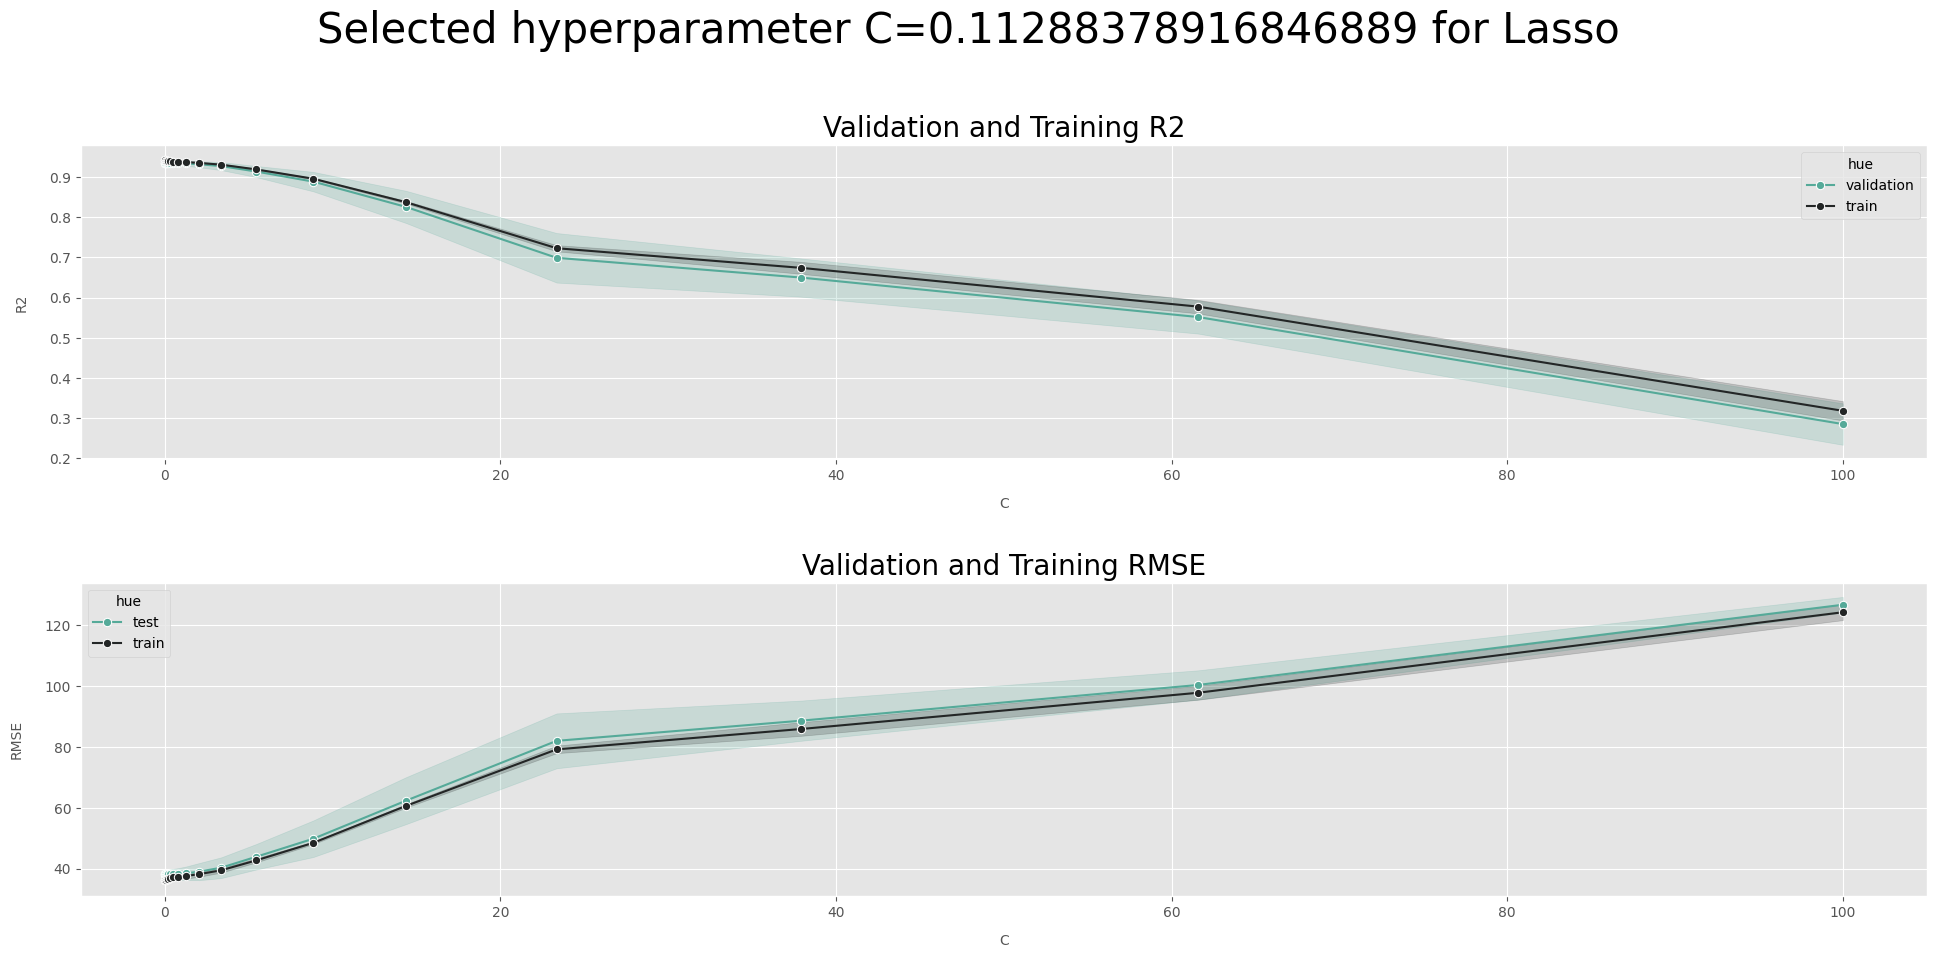

In [53]:
#TRAIN BEST MODEL
LRlasso=Lasso(alpha=GridLasso.best_params_["alpha"],random_state=42,max_iter=2000,tol=1e-2)#,max_iter=2000,tol=1e-2
LRlasso.fit(Xtrain,ytrain[:,0],sample_weight=train_sample_weight)

# Serialization
with open("LassoModel.pickle", "wb") as outfile:
    pickle.dump(LRlasso, outfile)
print("Written object", LRlasso)

ypred=LRlasso.predict(Xtest).reshape(-1,1)#Lasso returns row shape (n_samples,), not column shape (n_samples,1)
Lasso_MAE = mean_absolute_error(ypred,ytest[:,0])
Lasso_MSE = mean_squared_error(ypred,ytest[:,0])
Lasso_RMSE = root_mean_squared_error(ypred,ytest[:,0])
Lasso_R2 = r2_score(ypred,ytest[:,0])
ReportLasso = pd.DataFrame({'MAE':[Lasso_MAE],'MSE':[Lasso_MSE],'RMSE':[Lasso_RMSE],'R2':[Lasso_R2]},index=['Lasso'])#pd.DataFrame.from_dict

# GridLasso.best_estimator_#.dual_gap_
# GridLasso.best_score_
# GridLasso.best_params_
# GridLasso.scorer_
# GridLasso.multimetric_


# plot of train and test scores vs tree depth
# plt.plot(values, train_scores, '-o', label='Train')
# plt.plot(values, test_scores, '-o', label='Test')

fig,axes=plt.subplots(2,1,figsize=(20,10))
#sns.lineplot(data=pd.melt(dfXY[dfXY.columns[dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk|SteelFamCluster',regex=True)]].groupby("SteelFamCluster").mean().reset_index(),id_vars=['SteelFamCluster']),x='variable',y='value',hue='SteelFamCluster',lw=1,marker='o',errorbar='sd',markers=True,palette="dark:#5A9_r",ax=axes)#markers={'s':20,'marker':'o'}
data=pd.DataFrame(GridLasso.cv_results_).iloc[:,6:].drop(["rank_test_r2","rank_test_neg_root_mean_squared_error","mean_train_r2","std_train_r2","mean_test_r2","std_test_r2","mean_train_neg_root_mean_squared_error","std_train_neg_root_mean_squared_error","mean_test_neg_root_mean_squared_error","std_test_neg_root_mean_squared_error"],axis=1).abs()
data=pd.melt(pd.concat([data.iloc[:,:data.shape[1]//2],pd.DataFrame(data=[10**x for x in np.linspace(start=-2,stop=2,num=20,endpoint=True)],columns=['C'])],axis=1),id_vars=['C'])
data=data.assign(hue=lambda x: x.variable)
data.hue=data.hue.map(lambda x: "validation" if x in data.variable.unique()[:len(data.variable.unique())//2] else "train")
sns.lineplot(data=data,x='C',y='value',hue="hue",estimator=np.mean,err_style="band",errorbar='sd',markers=True,lw=1.5,marker='o',palette="dark:#5A9_r",ax=axes[0])#markers={'s':20,'marker':'o'}
fig.suptitle(f'Selected hyperparameter C={GridLasso.best_params_["alpha"]} for Lasso',fontsize=30)
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)
axes[0].set_xlabel("C",fontsize=10,labelpad=10)
axes[0].set_ylabel("R2",fontsize=10,labelpad=15)
axes[0].set_title("Validation and Training R2",fontsize="20")
#plt.xticks(rotation=45)

data=pd.DataFrame(GridLasso.cv_results_).iloc[:,6:].drop(["rank_test_r2","rank_test_neg_root_mean_squared_error","mean_train_r2","std_train_r2","mean_test_r2","std_test_r2","mean_train_neg_root_mean_squared_error","std_train_neg_root_mean_squared_error","mean_test_neg_root_mean_squared_error","std_test_neg_root_mean_squared_error"],axis=1).abs()
data=pd.melt(pd.concat([data.iloc[:,data.shape[1]//2:],pd.DataFrame(data=[10**x for x in np.linspace(start=-2,stop=2,num=20,endpoint=True)],columns=['C'])],axis=1),id_vars=['C'])
data=data.assign(hue=lambda x: x.variable)
data.hue=data.hue.map(lambda x: "test" if x in data.variable.unique()[:len(data.variable.unique())//2] else "train")
sns.lineplot(data=data,x='C',y='value',hue="hue",estimator=np.mean,err_style="band",errorbar='sd',markers=True,lw=1.5,marker='o',palette="dark:#5A9_r",ax=axes[1])#markers={'s':20,'marker':'o'}
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)
axes[1].set_xlabel("C",fontsize=10,labelpad=10)
axes[1].set_ylabel("RMSE",fontsize=10,labelpad=15)
axes[1].set_title("Validation and Training RMSE",fontsize="20")

fig.tight_layout(pad=3)
#plt.savefig(r"C:\Users\js5296\Desktop\NAS\Projects\AP1_Furnace_Control\EDAs\new\MV\newAvgTempRampSoak.png", bbox_inches="tight")

print(tabulate(ReportLR))
ReportLasso

In [54]:
####CHECK STORED MODEL#####
# Deserialization
with open("LassoModel.pickle", "rb") as infile:
    LassoModelPickle = pickle.load(infile)
print("Reconstructed object", LassoModelPickle)
LRlasso=LassoModelPickle

Reconstructed object Lasso(alpha=np.float64(0.11288378916846889), max_iter=2000, random_state=42,
      tol=0.01)


We see small variance of the metrics, so model looks stable

292.31321882198205
249


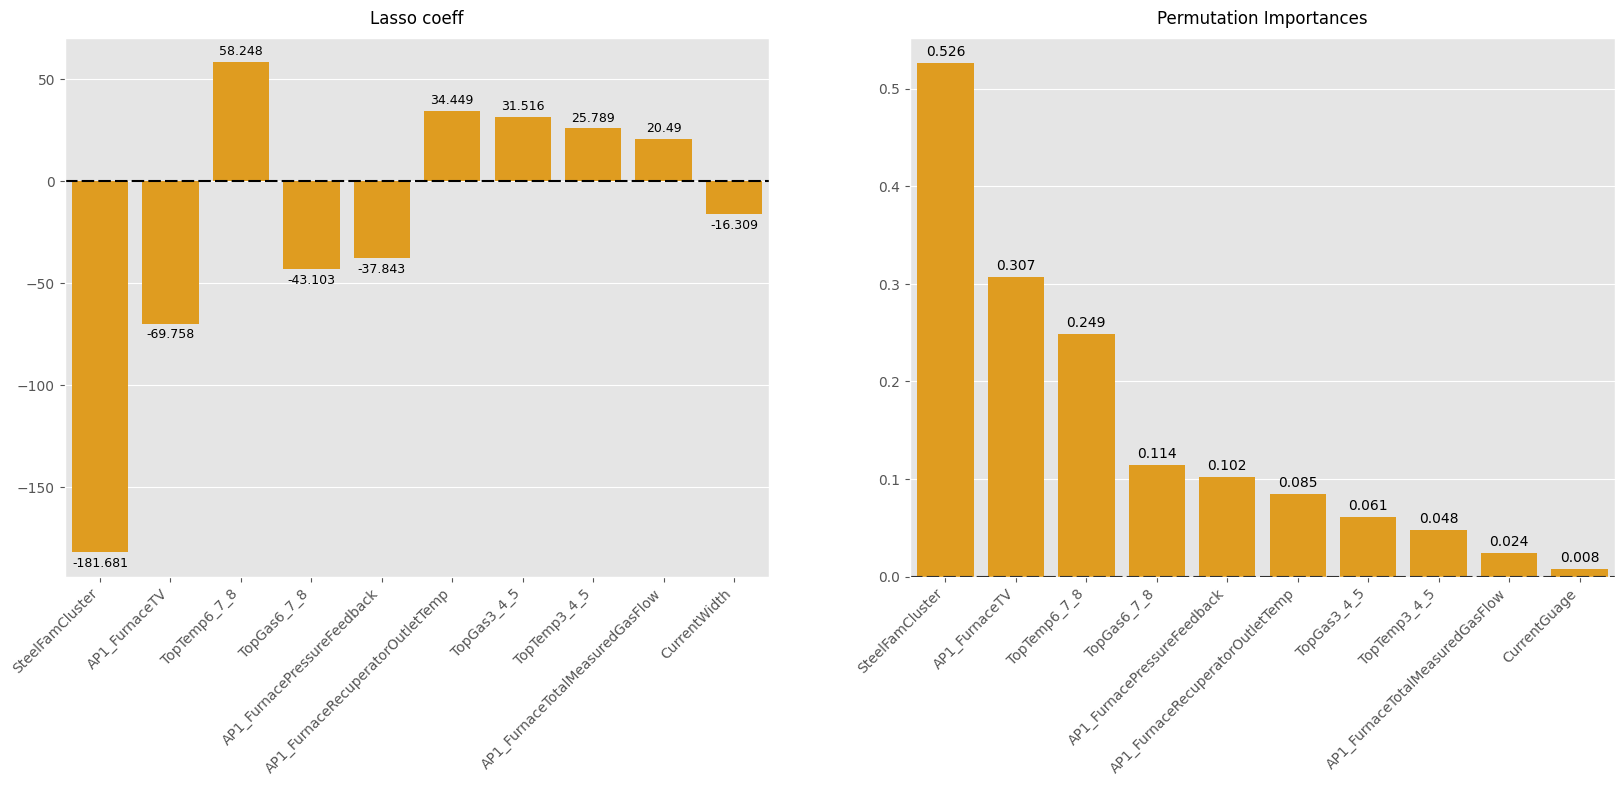

In [55]:
print(LRlasso.dual_gap_)
print(LRlasso.n_iter_)
LRlasso.coef_

#FEATURE IMPORTANCE
imp_idx=np.flip(np.argsort(np.abs(LRlasso.coef_))[-10:])#Flip to get desc order the 10 bigger elem
fig,axes=plt.subplots(1,2,figsize=(20,7))
sns.barplot(data=np.round(LRlasso.coef_[imp_idx],3),color='orange',ax=axes[0])
axes[0].set_title(label="Lasso coeff",loc='center',pad=10,fontsize="large")
# axes.get_xticks()
axes[0].set_xticks(axes[0].get_xticks(),labels=dfX.columns[imp_idx].tolist(),rotation=45,ha='right')
#axes.set_xticklabels(dfX.columns[np.flip(np.argsort(np.abs(reg.coef_[0]))[-10:])].tolist(),rotation=90)
axes[0].bar_label(axes[0].containers[0], fontsize=9, padding=3)
axes[0].axhline(0, color="k", dashes=(6, 2))
axes[0].tick_params(axis='x', labelsize=10)

pi=permutation_importance(LRlasso, Xtest, ytest[:,0].reshape(1,-1)[0], sample_weight=test_sample_weight, n_jobs=-1, n_repeats=10,random_state=42)
pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean))[-10:])
sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),color='orange',ax=axes[1])
axes[1].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
axes[1].set_xticks(axes[1].get_xticks(),labels=dfX.columns[pimp_idx].tolist(),rotation=45,ha='right')
axes[1].bar_label(axes[1].containers[0], fontsize=10, padding=3)
axes[1].axhline(0, color="k", dashes=(6, 2))
axes[1].tick_params(axis='x', labelsize=10)

Plot 1
Plot 2
Plot 3
Plot 4


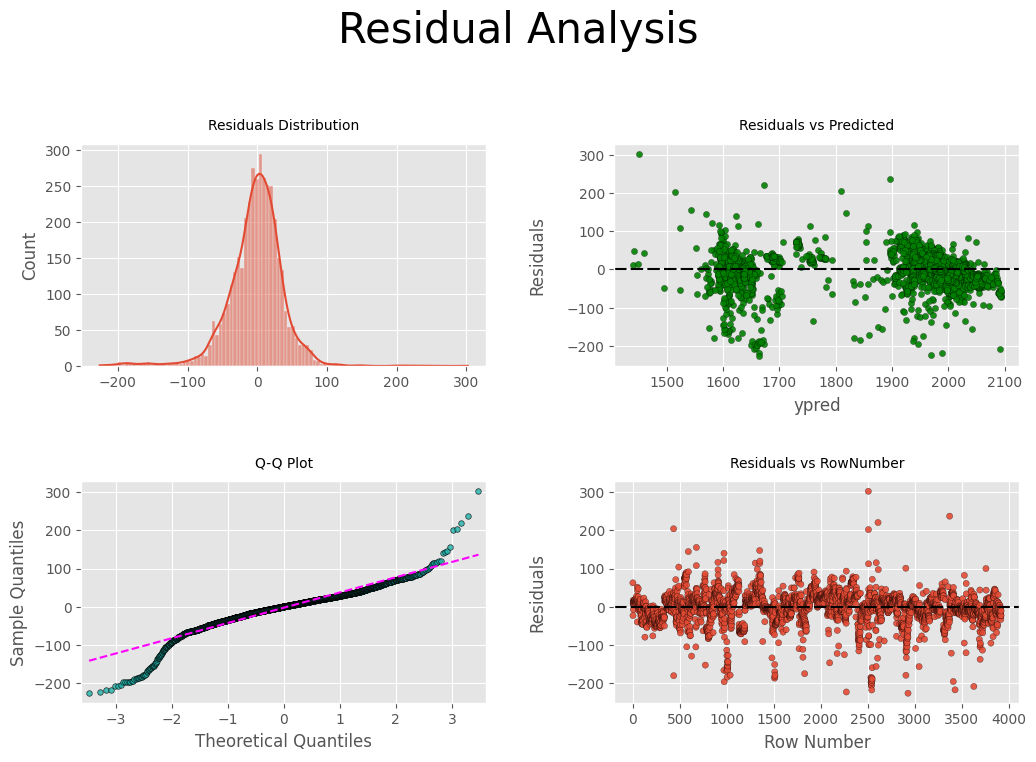

In [56]:
#RESIDUAL ANALYSIS
func_residual_analysis(estimator=LRlasso,ypred=ypred,xtest=Xtest,ytest=ytest[:,0].reshape(-1,1))


### Subset Selection: Sequential Feature Selector

### RFECV: Recursive Feature Elimination with CV

In [57]:
#Feature elimination based on coef, feature importance or callable
cv=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)#Split training into training/Validation
RFEcv=RFECV(estimator=LinearRegression(),scoring='r2',cv=cv,n_jobs=-1)#,verbose=1
#GridLasso=GridSearchCV(estimator=lasso,param_grid=grid,scoring=["r2","neg_root_mean_squared_error"],refit='r2',return_train_score=True,cv=cv,n_jobs=-1)
RFEcv.fit(Xtrain,ytrain[:,0],groups=groups[train_idx])#,groups=groups[train_idx]

# Serialization
with open("RFEcvModel.pickle", "wb") as outfile:
    pickle.dump(RFEcv, outfile)
print("Written object", RFEcv)

Written object RFECV(cv=GroupShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=0.8),
      estimator=LinearRegression(), n_jobs=-1, scoring='r2')


In [58]:
####CHECK STORED MODEL#####
# Deserialization
with open("RFEcvModel.pickle", "rb") as infile:
    RFEcvModelPickle = pickle.load(infile)
print("Reconstructed object", RFEcvModelPickle)

Reconstructed object RFECV(cv=GroupShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=0.8),
      estimator=LinearRegression(), n_jobs=-1, scoring='r2')


Selected number of features by model: 18; by elbow: 9
Selected features by elbow method are:  ['AP1_FurnaceCombustionAirTempFurnace', 'AP1_FurnaceDilutionAirTemperatureFeedback', 'AP1_FurnaceRecuperatorOutletTemp', 'AP1_FurnaceTV', 'AP1_FurnaceTotalSummedAirFlow', 'TopTemp3_4_5', 'TopTemp6_7_8', 'TopGas6_7_8', 'SteelFamCluster']
Written object RFE(estimator=LinearRegression(), n_features_to_select=np.int64(9))


,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,n_features
0,0.878479,0.023112,0.892549,0.907455,0.856768,0.846199,0.889427,1
1,0.892448,0.020041,0.896546,0.916553,0.871223,0.867330,0.910586,2
2,0.902001,0.020574,0.894970,0.926369,0.869640,0.897001,0.922024,3
3,0.909402,0.023856,0.894227,0.936917,0.872486,0.911855,0.931526,4
4,0.910833,0.021857,0.895193,0.936921,0.878683,0.911829,0.931539,5
5,0.916310,0.016913,0.904593,0.938586,0.895229,0.909385,0.933757,6
6,0.926292,0.009812,0.929128,0.937568,0.916991,0.912750,0.935025,7
7,0.932354,0.009859,0.930804,0.942780,0.919228,0.924641,0.944317,8
8,0.937350,0.008233,0.943666,0.943104,0.928712,0.926005,0.945261,9
9,0.938268,0.007685,0.944013,0.943640,0.931838,0.926408,0.945440,10


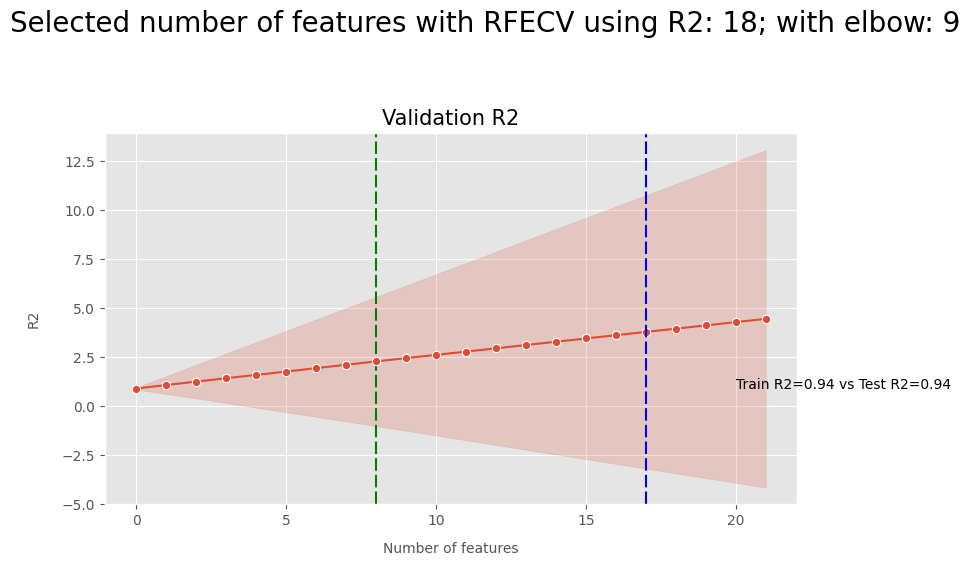

In [59]:
dfX.columns[~RFEcv.support_]#Eliminates
RFEcv.ranking_
LRrfeCV=RFEcv.estimator_#LinearRegressor fitted with n_features_
RFEcv.n_features_
RFEcv.n_features_in_

pd.DataFrame(RFEcv.cv_results_)
fig,axes=plt.subplots(figsize=(10,6))
#LOCALIZE ELBOW
rfe_n_features = KneeLocator(range(1,pd.DataFrame(RFEcv.cv_results_).shape[0]+1), pd.DataFrame(RFEcv.cv_results_).mean_test_score.values, curve='concave', direction='increasing').knee
#rfe_n_features = 10
axes.axvline(rfe_n_features-1, color="green", dashes=(6, 2))

data=pd.DataFrame(RFEcv.cv_results_)
sns.lineplot(data=pd.melt(pd.concat([data.iloc[:,2:],pd.DataFrame(data= range(dfX.shape[1]),columns=['N'])],axis=1),id_vars=['N']),x='N',y='value',estimator=np.mean,err_style="band",errorbar='sd',markers=True,lw=1.5,marker='o',ax=axes)#markers={'s':20,'marker':'o'}
fig.suptitle(f'Selected number of features with RFECV using R2: {RFEcv.n_features_}; with elbow: {rfe_n_features}',fontsize=20)
axes.tick_params(axis='x', labelsize=10)
axes.tick_params(axis='y', labelsize=10)
axes.set_xlabel("Number of features",fontsize=10,labelpad=10)
axes.set_ylabel("R2",fontsize=10,labelpad=15)
axes.set_title("Validation R2",fontsize=15)
axes.axvline(RFEcv.n_features_-1, color="blue", dashes=(6, 2))
axes.annotate(f"Train R2={np.round(RFEcv.score(Xtrain,ytrain[:,0]),2)} vs Test R2={np.round(RFEcv.score(Xtest,ytest[:,0]),2)}",xy=(20,0.9))#loc='best',numpoints=None,scatterpoints=Non
fig.tight_layout(pad=3)
print(f"Selected number of features by model: {RFEcv.n_features_}; by elbow: {rfe_n_features}")

#Fit elbow model
LRrfe = RFE(estimator=LinearRegression(),n_features_to_select=rfe_n_features).fit(Xtrain,ytrain[:,0])#,verbose=3
print("Selected features by elbow method are: ", dfX.columns[LRrfe.support_].tolist())
# Serialization
with open("LRrfeModel.pickle", "wb") as outfile:
    pickle.dump(LRrfe, outfile)
print("Written object", LRrfe)

pd.DataFrame(RFEcv.cv_results_)

In [60]:
####CHECK STORED MODEL#####
# Deserialization
with open("LRrfeModel.pickle", "rb") as infile:
    LRrfeModelPickle = pickle.load(infile)
print("Reconstructed object", LRrfeModelPickle)

Reconstructed object RFE(estimator=LinearRegression(), n_features_to_select=np.int64(9))


We can appreciate small variance of the score, so model looks stable

In [61]:
print("R2 for training: ",LRrfe.estimator_.score(Xtrain[:,LRrfe.support_],ytrain[:,0]))
print("R2 for test: ",LRrfe.estimator_.score(Xtest[:,LRrfe.support_],ytest[:,0]))
ypred=LRrfe.estimator_.predict(Xtest[:,LRrfe.support_]).reshape(-1,1)#returns shape (n_samples,1) instead of the supposedly (n_samples,)
LRrfe.predict(Xtest).reshape(-1,1)
LinearRegressionRFE_MAE = mean_absolute_error(ypred,ytest[:,0])
LinearRegressionRFE_MSE = mean_squared_error(ypred,ytest[:,0])
LinearRegressionRFE_RMSE = root_mean_squared_error(ypred,ytest[:,0])
LinearRegressionRFE_R2 = r2_score(ypred,ytest[:,0])
ReportLRrfe = pd.DataFrame({'MAE':[LinearRegressionRFE_MAE],'MSE':[LinearRegressionRFE_MSE],'RMSE':[LinearRegressionRFE_RMSE],'R2':[LinearRegressionRFE_R2]},index=['LRrfe'])#pd.DataFrame.from_dict
ReportLRrfe

R2 for training:  0.9402653468786736
R2 for test:  0.9330931764673571


,MAE,MSE,RMSE,R2
LRrfe,26.416062,1588.58187,39.857018,0.927562


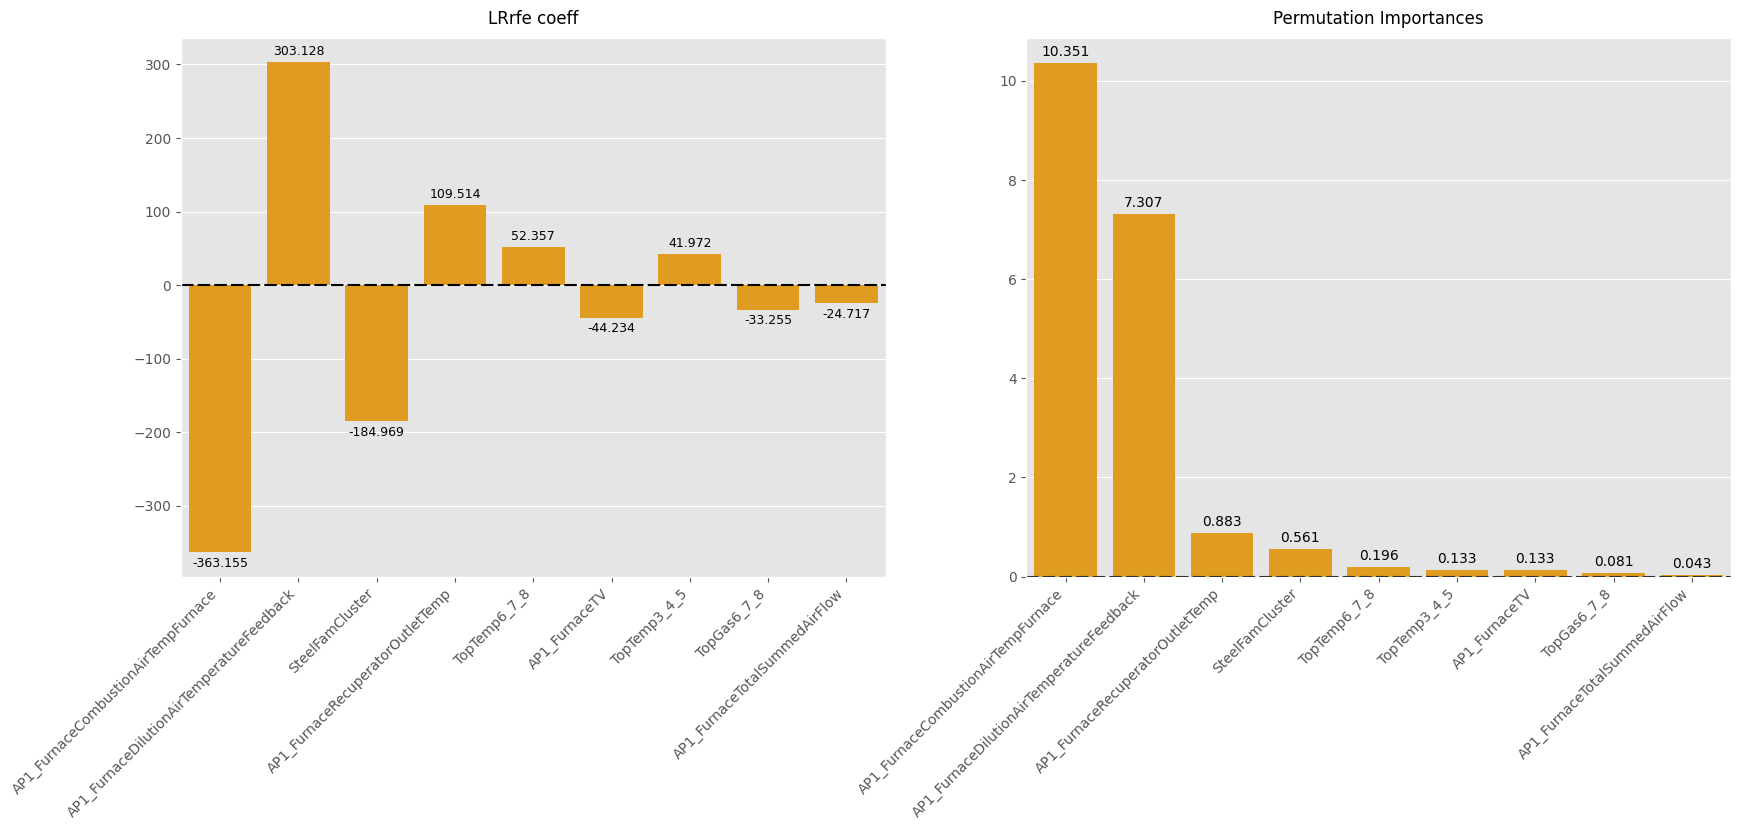

In [62]:
#FEATURE IMPORTANCE
labels=dfX.columns[LRrfe.support_]
imp_idx=np.flip(np.argsort(np.abs(LRrfe.estimator_.coef_))[-10:])#Flip to get desc order the 10 bigger elem
fig,axes=plt.subplots(1,2,figsize=(20,7))
sns.barplot(data=np.round(LRrfe.estimator_.coef_[imp_idx],3),color='orange',ax=axes[0])
axes[0].set_title(label="LRrfe coeff",loc='center',pad=10,fontsize="large")
# axes.get_xticks()
axes[0].set_xticks(axes[0].get_xticks(),labels=labels[imp_idx].tolist(),rotation=45,ha='right')
#axes.set_xticklabels(dfX.columns[np.flip(np.argsort(np.abs(reg.coef_[0]))[-10:])].tolist(),rotation=90)
axes[0].bar_label(axes[0].containers[0], fontsize=9, padding=3)
axes[0].axhline(0, color="k", dashes=(6, 2))
axes[0].tick_params(axis='x', labelsize=10)

pi=permutation_importance(LRrfe.estimator_, Xtest[:,LRrfe.support_], ytest[:,0].reshape(1,-1)[0], sample_weight=test_sample_weight, n_jobs=-1, n_repeats=10,random_state=42)
pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean))[-10:])
sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),color='orange',ax=axes[1])
axes[1].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
axes[1].set_xticks(axes[1].get_xticks(),labels=labels[pimp_idx].tolist(),rotation=45,ha='right')
axes[1].bar_label(axes[1].containers[0], fontsize=10, padding=3)
axes[1].axhline(0, color="k", dashes=(6, 2))
axes[1].tick_params(axis='x', labelsize=10)

Plot 1
Plot 2
Plot 3
Plot 4


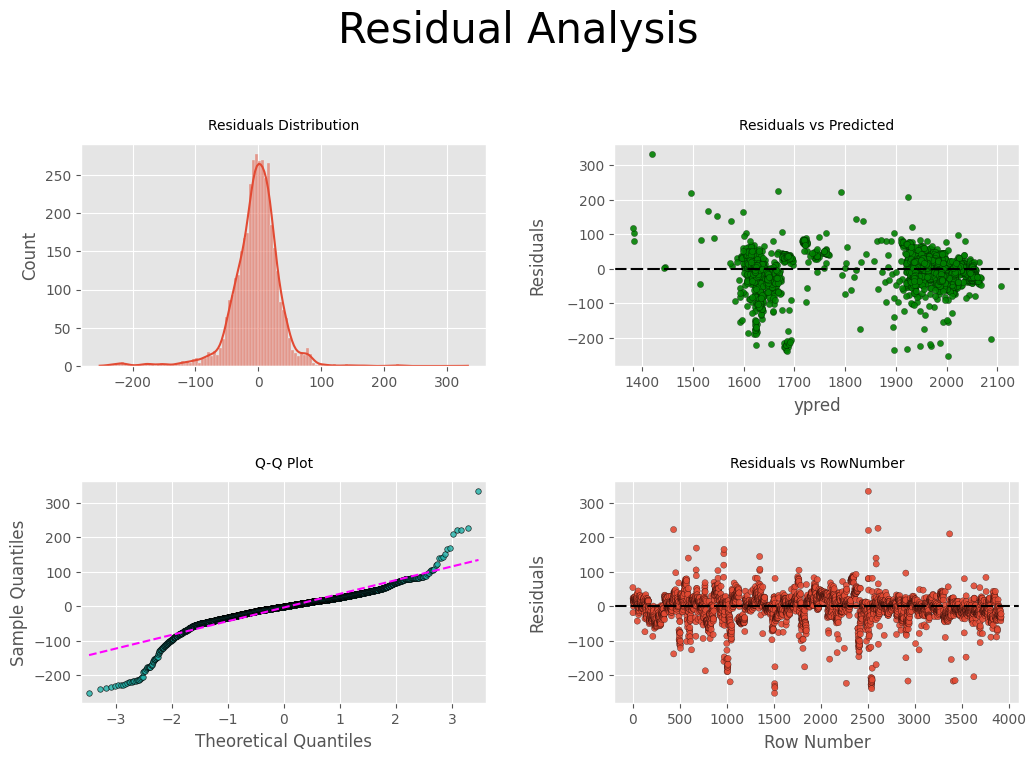

In [63]:
#RESIDUAL ANALYSIS
func_residual_analysis(estimator=LRrfe.estimator_,ypred=ypred,xtest=Xtest[:,LRrfe.support_],ytest=ytest[:,0].reshape(-1,1))


### Polynomial: LassoLarsIC is used as an alternative to CV to find the best alpha (scoring func still R2). If Lasso or LassoLars intead, alphas also in grid.

In [ ]:
#Make callable scoring 
def aic_bic_scorer(estimator, X, y):#With GridSearchCV X and y are the validation, estimator is the pipe of estimator=pipe.
    ypred=estimator.predict(X).reshape(-1,1)
    y=y.reshape(1,-1)
    res=ypred-y
    rss=np.sum(np.square(res))
    coef=estimator[-1].coef_#.reshape(1,-1).tolist()#estimator["regress"].coef_.reshape(1,-1)#.tolist()
    p=np.array([c for c in coef if c!=0]).shape[0]
    sigma_square=np.square(res.std())#or MSE=mean_squared_error(ypred,y)
    N=X.shape[0]
    bic=(1./(N*sigma_square))*(rss+np.log(N)*(p+1)*sigma_square)
    aic=(1./(N*sigma_square))*(rss+2*(p+1)*sigma_square)
    #ll = -N*np.log(2*np.pi*(sigma_square))/2 - np.sum(((res-res.mean())**2)/(2 * (sigma_square)))#LogLikelihood of model
    #aic=2*(p+1)-2*ll
    #bic=np.log(N)*p-2*ll
    scores={'aic':-aic,'bic':-bic}
    
    return scores


def bic_scorer(estimator, X, y): 
    ypred=estimator.predict(X).reshape(-1,1)
    y=y.reshape(1,-1)
    res=ypred-y
    rss=np.sum(np.square(res))
    coef=estimator[-1].coef_#.reshape(1,-1).tolist()#estimator["regress"].coef_.reshape(1,-1)#.tolist()
    p=np.array([c for c in coef if c!=0]).shape[0]
    sigma_square=np.square(res.std())#or MSE=mean_squared_error(ypred,y)
    N=X.shape[0]
    bic=(1./(N*sigma_square))*(rss+np.log(N)*(p+1)*sigma_square)
    
    return bic

def dump_scorer(estimator,X,y):#y.ndim=1 (n_samples,),ypred.ndim=1
    ypred=estimator.predict(X).reshape(1,-1)
    y=y.reshape(1,-1)
    res=ypred-y
    rss=np.sum(np.square(res))
    coef=estimator["regress"].coef_#.reshape(1,-1)#.tolist()
    p=np.array([c for c in coef if c!=0]).shape[0]
    sigma_square=np.square(res.std())#or MSE=mean_squared_error(ypred,y)
    N=X.shape[0]
    print(ypred.shape,y.shape,res.shape)
    #return estimator.score(X,y)
    return sigma_square

In [ ]:
%%time
#: 1h 47min 13s-6models ->1min with XTrial?
#PROBLEM:  GridSearchCV SELECTS HIGHER SCORE, BUT AIC/BIC BEST IS MIN
#criterion='aic','bic' used by estimator to select appropiate alpha. But the scoring function it uses with GridSearch gives back R2
#pipe = make_pipeline(PolynomialFeatures(include_bias=False),LassoLarsIC(criterion='aic'))#max_iter=2000,tol=1e-2,random_state=42
num_transformer = Pipeline(steps=[("poly",PolynomialFeatures(include_bias=True,interaction_only=False))])#
cat_transformer=Pipeline(steps=[("poly",PolynomialFeatures(include_bias=False,interaction_only=False))])#Interaction between variables with categorical
preprocessor = ColumnTransformer(transformers=[("num",num_transformer,np.arange(X.shape[1]-1)),("cat",cat_transformer,np.arange(X.shape[1]))],remainder='drop')#Dont apply to last column:categorical
variance_transformer=VarianceThreshold(threshold=0.0)
pipe = Pipeline(steps=[("preprocessor",preprocessor),("var",variance_transformer),("regress",LassoLarsIC())])
#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).
#If degree too high, nFeatures>nsamples and warnings start arise: max with with d=3 including only d3 vars
grid={"preprocessor__num__poly__degree":[0,(2,2),(3,3)],"preprocessor__cat__poly__degree":[1],"regress__criterion":['bic','aic']}#,,"regress__alpha":[10**x for x in np.linspace(start=-2,stop=2,num=20,endpoint=True)]
#Dumbgrid={"preprocessor__num__poly__degree":[2],"regress__criterion":['bic','aic']}#,,"regress__alpha":[10**x for x in np.linspace(start=-2,stop=2,num=20,endpoint=True)]
cv=GroupShuffleSplit(n_splits=5, train_size=.9, random_state=42)#Split training into training/Validation: train size 0.9 for train2 size having more samples than features
GridpLassoLarsIC=GridSearchCV(estimator=pipe,param_grid=grid,scoring=aic_bic_scorer,return_train_score=True,refit='aic',cv=cv,n_jobs=48,verbose=1)#error_score='raise'
GridpLassoLarsIC.fit(Xtrain,ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx])
#GroupKFold could be used too

# Serialization
with open("GridpLassoLarsICModel.pickle", "wb") as outfile:
    pickle.dump(GridpLassoLarsIC, outfile)
print("Written object", GridpLassoLarsIC)

pd.DataFrame(GridpLassoLarsIC.cv_results_)

In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridpLassoLarsICModel.pickle", "rb") as infile:
    GridpLassoLarsICModelPickle = pickle.load(infile)
print("Reconstructed object", GridpLassoLarsICModelPickle)

GridpLassoLarsIC=GridpLassoLarsICModelPickle

In [ ]:
print(f"The % std of the aic score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridpLassoLarsIC.cv_results_).std_test_aic.tolist(),pd.DataFrame(GridpLassoLarsIC.cv_results_).mean_test_aic.tolist())]}")
print(f"The % std of the bic score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridpLassoLarsIC.cv_results_).std_test_bic.tolist(),pd.DataFrame(GridpLassoLarsIC.cv_results_).mean_test_bic.tolist())]}")
pd.DataFrame(GridpLassoLarsIC.cv_results_)

Due to the small % of the std, the models are considered stable

In [ ]:
#PLOT AIC/BIC RESULTS FOR HYPERPARAMETER SELECTION

data=pd.DataFrame(GridpLassoLarsIC.cv_results_)
Daic=data.loc[data['rank_test_aic'].idxmin(),'param_preprocessor__num__poly__degree']
Dbic=data.loc[data['rank_test_bic'].idxmin(),'param_preprocessor__num__poly__degree']
DC=data.loc[data['rank_test_aic'].idxmin(),['rank_test_aic','mean_test_aic','rank_test_bic','mean_test_bic','param_preprocessor__num__poly__degree','param_regress__criterion']]
D=DC['param_preprocessor__num__poly__degree']
C=DC['param_regress__criterion']


fig,axes=plt.subplots(1,2,figsize=(20,5))

data=data.iloc[:,8:].drop(["mean_train_aic","std_train_aic","mean_test_aic","std_test_aic","rank_test_aic","mean_train_bic","std_train_bic","mean_test_bic","std_test_bic","rank_test_bic"],axis=1).abs()
data=pd.melt(pd.concat([data.iloc[:,:data.shape[1]//2],pd.DataFrame(data=[d for d in np.arange(1,len(pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique())+1) for i in range(2)],columns=['D'])],axis=1),id_vars=['D'])
data=data.assign(hue=lambda x: x.variable)
data.hue=data.hue.map(lambda x: "validation" if x in data.variable.unique()[:len(data.variable.unique())//2] else "train")
sns.lineplot(data=data,x='D',y='value',hue="hue",estimator=np.mean,err_style="band",errorbar='sd',markers=True,lw=1.5,marker='o',palette="dark:#5A9_r",ax=axes[0])#markers={'s':20,'marker':'o'}
fig.suptitle('Selected hyperparameter Degree={} and Criterion={} for Lasso'.format(D,C),fontsize=30)
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)
axes[0].set_xlabel("D",fontsize=10,labelpad=10)
axes[0].set_ylabel("AIC",fontsize=10,labelpad=15)
axes[0].set_title("Validation and Training AIC",fontsize="20")
axes[0].set_xticks(np.arange(1,len(pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique())+1),labels=pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique().tolist())#,rotation=45,ha='right'
axes[0].axvline(pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique().tolist().index(Daic)+1, color="red", dashes=(6, 2))

#plt.xticks(rotation=45)

data=pd.DataFrame(GridpLassoLarsIC.cv_results_).iloc[:,8:].drop(["mean_train_aic","std_train_aic","mean_test_aic","std_test_aic","rank_test_aic","mean_train_bic","std_train_bic","mean_test_bic","std_test_bic","rank_test_bic"],axis=1).abs()
data=pd.melt(pd.concat([data.iloc[:,data.shape[1]//2:],pd.DataFrame(data=[d for d in np.arange(1,len(pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique())+1) for i in range(2)],columns=['D'])],axis=1),id_vars=['D'])
data=data.assign(hue=lambda x: x.variable)
data.hue=data.hue.map(lambda x: "test" if x in data.variable.unique()[:len(data.variable.unique())//2] else "train")
sns.lineplot(data=data,x='D',y='value',hue="hue",estimator=np.mean,err_style="band",errorbar='sd',markers=True,lw=1.5,marker='o',palette="dark:#5A9_r",ax=axes[1])#markers={'s':20,'marker':'o'}
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)
axes[1].set_xlabel("D",fontsize=10,labelpad=10)
axes[1].set_ylabel("BIC",fontsize=10,labelpad=15)
axes[1].set_title("Validation and Training BIC",fontsize="20")
axes[1].set_xticks(np.arange(1,len(pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique())+1),labels=pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique().tolist())#,rotation=45,ha='right'
axes[1].axvline(pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique().tolist().index(Dbic)+1, color="red", dashes=(6, 2))


fig.tight_layout(pad=3)
#plt.savefig(r"C:\Users\js5296\Desktop\NAS\Projects\AP1_Furnace_Control\EDAs\new\MV\newAvgTempRampSoak.png", bbox_inches="tight")


# data=pd.melt(pd.concat([data,pd.DataFrame(data=[d for d in np.arange(1,len(pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique())+1) for i in range(2)],columns=['D'])],axis=1),id_vars=['D','param_regress__criterion'])
# data=data.assign(hue=lambda x: x.variable)
# data.hue=data.hue.map(lambda x: "validation" if x in data.variable.unique()[:len(data.variable.unique())//2] else "train")
# #data.hue=data['param_regress__criterion']+'_'+data.hue
# sns.lineplot(data=data[data.param_regress__criterion=='bic'],x='D',y='value',hue="hue",estimator=np.mean,err_style="band",errorbar='sd',markers=True,lw=1.5,marker='o',palette="dark:#5A9_r",ax=axes[0])#markers={'s':20,'marker':'o'},palette="dark:#5A9_r"
# sns.lineplot(data=data[data.param_regress__criterion=='aic'],x='D',y='value',hue="hue",estimator=np.mean,err_style="band",errorbar='sd',markers=True,lw=1.5,marker='o',palette="dark:#5A9_r",ax=axes[1])#markers={'s':20,'marker':'o'},palette="dark:#5A9_r"
# fig.suptitle('Selected hyperparameter Degree={} and Criterion={} for Lasso'.format(D,C),fontsize=30)
# axes[0].tick_params(axis='x', labelsize=10)
# axes[0].tick_params(axis='y', labelsize=10)
# axes[1].tick_params(axis='x', labelsize=10)
# axes[1].tick_params(axis='y', labelsize=10)
# axes[0].set_xlabel("Degree",fontsize=10,labelpad=10)
# axes[0].set_ylabel("BIC",fontsize=10,labelpad=15)
# axes[1].set_xlabel("Degree",fontsize=10,labelpad=10)
# axes[1].set_ylabel("AIC",fontsize=10,labelpad=15)
# axes[0].set_xticks(np.arange(1,len(pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique())+1),labels=pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique().tolist())#,rotation=45,ha='right'
# axes[1].set_xticks(np.arange(1,len(pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique())+1),labels=pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique().tolist())#,rotation=45,ha='right'
# axes[0].set_title("Validation and Training BIC",fontsize="20")
# axes[1].set_title("Validation and Training AIC",fontsize="20")
# axes[0].axvline(pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique().tolist().index(Dbic)+1, color="red", dashes=(6, 2))
# axes[1].axvline(pd.DataFrame(GridpLassoLarsIC.cv_results_).param_preprocessor__num__poly__degree.unique().tolist().index(Daic)+1, color="red", dashes=(6, 2))
# fig.tight_layout(pad=3)
# #plt.xticks(rotation=45)

In [ ]:
GridpLassoLarsIC.best_estimator_[-1].alphas_
GridpLassoLarsIC.best_estimator_[-1].alpha_
GridpLassoLarsIC.best_estimator_[-1].noise_variance_
GridpLassoLarsIC.best_estimator_[-1].coef_
GridpLassoLarsIC.best_estimator_[-1].criterion_
GridpLassoLarsIC.scorer_


#Alpha selection of best estimator using aic and bic:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars_ic.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-ic-py
data=pd.DataFrame(GridpLassoLarsIC.cv_results_)
score_criterion=data.loc[data['rank_test_aic'].idxmin(),'param_regress__criterion']#aic or bic for alpha
n_samples=Xtrain.shape[0]
scaled_criterion=GridpLassoLarsIC.best_estimator_[-1].criterion_
scaled_criterion = GridpLassoLarsIC.best_estimator_[-1].criterion_ - n_samples * np.log(2 * np.pi * GridpLassoLarsIC.best_estimator_[-1].noise_variance_) - n_samples 

fig,axes=plt.subplots(figsize=(20,5))
sns.lineplot(x=GridpLassoLarsIC.best_estimator_[-1].alphas_,y=scaled_criterion,markers=True,lw=1.5,marker='o',ax=axes)#markers={'s':20,'marker':'o'},palette="dark:#5A9_r"
#fig.suptitle('Selected hyperparameter alpha={} with Criterion={} for Lasso'.format(GridpLassoLarsIC.best_estimator_[-1].alpha_,C),fontsize=30)
axes.tick_params(axis='x', labelsize=10)
axes.tick_params(axis='y', labelsize=10)
axes.set_xlabel("alpha",fontsize=10,labelpad=10)
axes.set_ylabel(str(C),fontsize=10,labelpad=15)
axes.set_title('Selected hyperparameter alpha={} with Criterion={} for LassoLarsIC'.format(np.round(GridpLassoLarsIC.best_estimator_[-1].alpha_,3),C),fontsize="20")
axes.axvline(GridpLassoLarsIC.best_estimator_[-1].alpha_, color="red", dashes=(6, 2))
fig.tight_layout(pad=3)


In [ ]:
%%time
#3s
#TRAIN BEST MODEL
d=D

num_transformer = Pipeline(steps=[("poly",PolynomialFeatures(include_bias=True,interaction_only=False,degree=d))])#
cat_transformer=Pipeline(steps=[("poly",PolynomialFeatures(include_bias=False,interaction_only=False,degree=1))])#Interaction between variables with categorical
preprocessor = ColumnTransformer(transformers=[("num",num_transformer,np.arange(X.shape[1]-1)),("cat",cat_transformer,np.arange(X.shape[1]))],remainder='drop')
variance_transformer=VarianceThreshold(threshold=0.0)
pipe = Pipeline(steps=[("preprocessor",preprocessor),("var",variance_transformer)])
print(len(pipe.fit(Xtrain).get_feature_names_out(dfX.columns)))
labels=pipe.fit(Xtrain).get_feature_names_out(dfX.columns)

data=pipe.fit_transform(Xtrain)
PolyLassoLarsIC=LassoLarsIC(criterion=C).fit(X=data,y=ytrain[:,0].reshape(1,-1)[0])
PolyLassoLarsIC.criterion_

# Serialization
with open("PolyLassoLarsICModel.pickle", "wb") as outfile:
    pickle.dump([PolyLassoLarsIC,pipe], outfile)
print("Written object", PolyLassoLarsIC)

#Alpha selection of best estimator using aic and bic:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars_ic.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-ic-py
score_criterion=C#aic or bic
n_samples=Xtrain.shape[0]
scaled_criterion=PolyLassoLarsIC.criterion_
scaled_criterion = PolyLassoLarsIC.criterion_ - n_samples * np.log(2 * np.pi * PolyLassoLarsIC.noise_variance_) - n_samples 

#plt.plot(scaled_criterion, color="tab:blue", marker="o", label=str(score_criterion))
if (len(PolyLassoLarsIC.alphas_)==len(PolyLassoLarsIC.criterion_)) & (PolyLassoLarsIC.alphas_.min()==PolyLassoLarsIC.alpha_):
    fig,axes=plt.subplots(figsize=(20,5))
    sns.lineplot(x=PolyLassoLarsIC.alphas_,y=scaled_criterion,markers=True,lw=1.5,marker='o',ax=axes)#markers={'s':20,'marker':'o'},palette="dark:#5A9_r"
    #fig.suptitle('Selected hyperparameter alpha={} with Criterion={} for Lasso'.format(GridpLassoLarsIC.best_estimator_[-1].alpha_,C),fontsize=30)
    axes.tick_params(axis='x', labelsize=15)
    axes.tick_params(axis='y', labelsize=15)
    axes.set_xlabel("alpha",fontsize=15,labelpad=10)
    axes.set_ylabel(str(C),fontsize=15,labelpad=15)
    axes.set_title('Selected hyperparameter alpha={} with alpha_criterion={} for LassoLarsIC and degree={}'.format(np.round(PolyLassoLarsIC.alpha_,3),C,d),fontsize="20")
    axes.axvline(PolyLassoLarsIC.alpha_, color="red", dashes=(6, 2))
    fig.tight_layout(pad=3)


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("PolyLassoLarsICModel.pickle", "rb") as infile:
    PolyLassoLarsICModelPickle = pickle.load(infile)[0]
print("Reconstructed object", PolyLassoLarsICModelPickle)
PolyLassoLarsIC=PolyLassoLarsICModelPickle

# Deserialization
with open("PolyLassoLarsICModel.pickle", "rb") as infile:
    pipePickle=pickle.load(infile)[1]
print("Reconstructed object", pipePickle)
pipe=pipePickle

In [ ]:
#UNUSED FEATURES WITH COEF = 0
d=D
num_transformer = Pipeline(steps=[("poly",PolynomialFeatures(include_bias=True,interaction_only=False,degree=d))])#
cat_transformer=Pipeline(steps=[("poly",PolynomialFeatures(include_bias=False,interaction_only=False,degree=1))])#Interaction between variables with categorical
preprocessor = ColumnTransformer(transformers=[("num",num_transformer,np.arange(X.shape[1]-1)),("cat",cat_transformer,np.arange(X.shape[1]))],remainder='drop')
variance_transformer=VarianceThreshold(threshold=0.0)
pipe = Pipeline(steps=[("preprocessor",preprocessor),("var",variance_transformer)])
print(f"Total features for Poly {len(pipe.fit(Xtrain).get_feature_names_out(dfX.columns))}")
labels=pipe.fit(Xtrain).get_feature_names_out(dfX.columns)

print(f"Unused features for poly {(PolyLassoLarsIC.coef_==0).sum()}")
labels[PolyLassoLarsIC.coef_==0]

PolyLassoLarsIC.alphas_
PolyLassoLarsIC.alpha_
PolyLassoLarsIC.coef_
(np.array([x for x in PolyLassoLarsIC.coef_ if x==0]).shape[0] + np.array([x for x in PolyLassoLarsIC.coef_ if x!=0]).shape[0]) == PolyLassoLarsIC.coef_.shape[0]

variance_transformer=VarianceThreshold(threshold=0.0)
num_transformer = Pipeline(steps=[("poly",PolynomialFeatures(include_bias=True,interaction_only=False,degree=(3,3)))])#
cat_transformer=Pipeline(steps=[("poly",PolynomialFeatures(include_bias=False,interaction_only=False,degree=1))])#Interaction between variables with categorical
preprocessor = ColumnTransformer(transformers=[("num",num_transformer,np.arange(X.shape[1]-1)),("cat",cat_transformer,np.arange(X.shape[1]))],remainder='drop')
pipe = Pipeline(steps=[("preprocessor",preprocessor),("var",variance_transformer)])
print(len(pipe.fit(Xtrain).get_feature_names_out(dfX.columns)))
pipe.fit(Xtrain).get_feature_names_out(dfX.columns)

#PolyLassoLarsIC.criterion_
#PolyLassoLarsIC.noise_variance_
#PolyLassoLarsIC.get_params()


In [ ]:
ypred=PolyLassoLarsIC.predict(pipe.fit_transform(Xtest)).reshape(-1,1)
LinearRegressionPolyLLIC_MAE = mean_absolute_error(ypred,ytest[:,0])
LinearRegressionPolyLLIC_MSE = mean_squared_error(ypred,ytest[:,0])
LinearRegressionPolyLLIC_RMSE = root_mean_squared_error(ypred,ytest[:,0])
LinearRegressionPolyLLIC_R2 = r2_score(ypred,ytest[:,0])
ReportLRPolyLLIC = pd.DataFrame({'MAE':[LinearRegressionPolyLLIC_MAE],'MSE':[LinearRegressionPolyLLIC_MSE],'RMSE':[LinearRegressionPolyLLIC_RMSE],'R2':[LinearRegressionPolyLLIC_R2]},index=['LRPolyLLIC'])#pd.DataFrame.from_dict
ReportLRPolyLLIC
#print(np.square((ypred-ytest).std()),LinearRegressionPolyLLIC_MSE)


In [ ]:
%%time
#40s
#FEATURE IMPORTANCE
imp_idx=np.flip(np.argsort(np.abs(PolyLassoLarsIC.coef_))[-10:])#Flip to get desc order the 10 bigger elem
fig,axes=plt.subplots(1,2,figsize=(20,7))
sns.barplot(data=np.round(PolyLassoLarsIC.coef_[imp_idx],3),color='orange',ax=axes[0])
axes[0].set_title(label="Poly LassoLarsIC coeff",loc='center',pad=10,fontsize="large")
# axes.get_xticks()
axes[0].set_xticks(axes[0].get_xticks(),labels=labels[imp_idx].tolist(),rotation=45,ha='right')
#axes.set_xticklabels(dfX.columns[np.flip(np.argsort(np.abs(reg.coef_[0]))[-10:])].tolist(),rotation=90)
axes[0].bar_label(axes[0].containers[0], fontsize=9, padding=3)
axes[0].axhline(0, color="k", dashes=(6, 2))
axes[0].tick_params(axis='x', labelsize=10)

pi=permutation_importance(PolyLassoLarsIC, pipe.fit_transform(Xtest), ytest[:,0].reshape(1,-1)[0], sample_weight=test_sample_weight, n_jobs=-1, n_repeats=10,random_state=42)
pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean))[-10:])
sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),color='orange',ax=axes[1])
axes[1].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
axes[1].set_xticks(axes[1].get_xticks(),labels=labels[pimp_idx].tolist(),rotation=45,ha='right')
axes[1].bar_label(axes[1].containers[0], fontsize=10, padding=3)
axes[1].axhline(0, color="k", dashes=(6, 2))
axes[1].tick_params(axis='x', labelsize=10)

In [ ]:
#RESIDUAL ANALYSIS
func_residual_analysis(estimator=PolyLassoLarsIC,ypred=ypred,xtest=pipe.fit_transform(Xtest),ytest=ytest[:,0].reshape(-1,1))


### Regression Splines

In [ ]:
%%time
#:1h20-120 models -> 14min with XTrial
num_transformer = Pipeline(steps=[("spline",SplineTransformer(include_bias=False))])
preprocessor = ColumnTransformer(transformers=[("num",num_transformer,np.arange(X.shape[1]-1))],remainder='passthrough')
pipe = Pipeline(steps=[("preprocessor",preprocessor),("regress",LassoLarsIC(eps=2.220446049250313e-5))])#'aic','bic'
#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).
grid={"preprocessor__num__spline__degree":np.arange(1,4),"preprocessor__num__spline__n_knots":np.arange(2,12),"preprocessor__num__spline__knots":['uniform','quantile'],"regress__criterion":['bic','aic']}#knots must be [2,inf),#,,"regress__alpha":[10**x for x in np.linspace(start=-2,stop=2,num=20,endpoint=True)]
cv=GroupShuffleSplit(n_splits=5, train_size=.85, random_state=42)#Split training into training/Validation: train size 0.85 for not having problems with bigger grid computation of Lasso(knots=5,d=3)
GridsLassoLarsIC=GridSearchCV(estimator=pipe,param_grid=grid,scoring=aic_bic_scorer,return_train_score=True,refit='aic',cv=cv,n_jobs=20,verbose=3)#error_score='raise',make_scorer(aic_bic_scorer,greater_is_better=False)
GridsLassoLarsIC.fit(Xtrain,ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx])
#GroupKFold could be used too

# Serialization
with open("GridsLassoLarsICModel.pickle", "wb") as outfile:
    pickle.dump(GridsLassoLarsIC, outfile)
print("Written object", GridsLassoLarsIC)

pd.DataFrame(GridsLassoLarsIC.cv_results_)

In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridsLassoLarsICModel.pickle", "rb") as infile:
    GridsLassoLarsICModelPickle = pickle.load(infile)
print("Reconstructed object", GridsLassoLarsICModelPickle)

GridsLassoLarsIC=GridsLassoLarsICModelPickle

In [ ]:
print(f"The % std of the aic score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridsLassoLarsIC.cv_results_).std_test_aic.tolist(),pd.DataFrame(GridsLassoLarsIC.cv_results_).mean_test_aic.tolist())]}")
print(f"The % std of the bic score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridsLassoLarsIC.cv_results_).std_test_bic.tolist(),pd.DataFrame(GridsLassoLarsIC.cv_results_).mean_test_bic.tolist())]}")
pd.DataFrame(GridsLassoLarsIC.cv_results_)

Due to the small % of std for all models, it looks like they are stable 

In [ ]:
#PLOT AIC/BIC RESULTS FOR HYPERPARAMETER SELECTION

data=pd.DataFrame(GridsLassoLarsIC.cv_results_)
# Daic=data[data.param_regress__criterion=='aic'].loc[data[data.param_regress__criterion=='aic']['rank_test_aic'].idxmax(),'param_spline__degree']
# NKaic=data[data.param_regress__criterion=='aic'].loc[data[data.param_regress__criterion=='aic']['rank_test_aic'].idxmax(),'param_spline__n_knots']
# Kaic=data[data.param_regress__criterion=='aic'].loc[data[data.param_regress__criterion=='aic']['rank_test_aic'].idxmax(),'param_spline__knots']
# Dbic=data[data.param_regress__criterion=='bic'].loc[data[data.param_regress__criterion=='bic']['rank_test_aic'].idxmax(),'param_spline__degree']
# NKbic=data[data.param_regress__criterion=='bic'].loc[data[data.param_regress__criterion=='bic']['rank_test_aic'].idxmax(),'param_spline__n_knots']
# Kbic=data[data.param_regress__criterion=='bic'].loc[data[data.param_regress__criterion=='bic']['rank_test_aic'].idxmax(),'param_spline__knots']
DC=data.loc[data['rank_test_aic'].idxmin(),['rank_test_aic','mean_test_aic','rank_test_bic','mean_test_bic','param_preprocessor__num__spline__degree','param_regress__criterion','param_preprocessor__num__spline__n_knots','param_preprocessor__num__spline__knots']]
d=DC['param_preprocessor__num__spline__degree']
nknots=DC['param_preprocessor__num__spline__n_knots']
knots=DC['param_preprocessor__num__spline__knots']
C=DC['param_regress__criterion']

DC

In [ ]:
#Alpha selection of best estimator using aic and bic:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars_ic.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-ic-py
data=pd.DataFrame(GridsLassoLarsIC.cv_results_)
score_criterion=data.loc[data['rank_test_aic'].idxmin(),'param_regress__criterion']#aic or bic
n_samples=Xtrain.shape[0]
scaled_criterion=GridsLassoLarsIC.best_estimator_[-1].criterion_
scaled_criterion = GridsLassoLarsIC.best_estimator_[-1].criterion_ - n_samples * np.log(2 * np.pi * GridsLassoLarsIC.best_estimator_[-1].noise_variance_) - n_samples 

fig,axes=plt.subplots(figsize=(20,5))
sns.lineplot(x=GridsLassoLarsIC.best_estimator_[-1].alphas_,y=scaled_criterion,markers=True,lw=1.5,marker='o',ax=axes)#markers={'s':20,'marker':'o'},palette="dark:#5A9_r"
#fig.suptitle('Selected hyperparameter alpha={} with Criterion={} for Lasso'.format(GridpLassoLarsIC.best_estimator_[-1].alpha_,C),fontsize=30)
axes.tick_params(axis='x', labelsize=15)
axes.tick_params(axis='y', labelsize=15)
axes.set_xlabel("alpha",fontsize=15,labelpad=10)
axes.set_ylabel(str(C),fontsize=15,labelpad=15)
axes.set_title('Selected hyperparameter alpha={} with Criterion={} for LassoLarsIC with nknots={} distribiuted {} and degree={}'.format(np.round(GridsLassoLarsIC.best_estimator_[-1].alpha_,3),C,nknots,knots,d),fontsize="20")
axes.axvline(GridsLassoLarsIC.best_estimator_[-1].alpha_, color="red", dashes=(6, 2))
fig.tight_layout(pad=3)


In [ ]:
#TRAIN BEST MODEL
splineTransformer=SplineTransformer(include_bias=False,degree=d,n_knots=nknots,knots=knots)
spline_preprocessor = ColumnTransformer(transformers=[("spline",splineTransformer,np.arange(X.shape[1]-1))],remainder='passthrough')
labels=spline_preprocessor.fit(Xtrain).get_feature_names_out(dfX.columns)
data=spline_preprocessor.fit_transform(Xtrain)
SplineLassoLarsIC=LassoLarsIC(criterion=C,max_iter=500,eps=np.finfo(float).eps).fit(X=data,y=ytrain[:,0].reshape(1,-1)[0])#max_iter=23 or eps=2.220446049250313e-7 for degenerative sol to converge

# Serialization
with open("SplineLassoLarsICModel.pickle", "wb") as outfile:
    pickle.dump([SplineLassoLarsIC,spline_preprocessor], outfile)
print("Written object", SplineLassoLarsIC)

In [ ]:
spline_preprocessor.fit_transform(Xtrain).shape

In [ ]:
print(SplineLassoLarsIC.get_params())
print(splineTransformer.get_params())
print(SplineLassoLarsIC.alpha_)
SplineLassoLarsIC.coef_

In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("SplineLassoLarsICModel.pickle", "rb") as infile:
    SplineLassoLarsICModelPickle = pickle.load(infile)[0]
print("Reconstructed object", SplineLassoLarsICModelPickle)
SplineLassoLarsIC=SplineLassoLarsICModelPickle

####CHECK STORED MODEL#####
# Deserialization
with open("SplineLassoLarsICModel.pickle", "rb") as infile:
    spline_preprocessorPickle = pickle.load(infile)[1]
print("Reconstructed object", spline_preprocessorPickle)
spline_preprocessor=spline_preprocessorPickle

In [ ]:
#Alpha selection of best estimator using aic and bic:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars_ic.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-ic-py
score_criterion=C#aic or bic
n_samples=Xtrain.shape[0]
scaled_criterion=SplineLassoLarsIC.criterion_
scaled_criterion = SplineLassoLarsIC.criterion_ - n_samples * np.log(2 * np.pi * SplineLassoLarsIC.noise_variance_) - n_samples 

#plt.plot(scaled_criterion, color="tab:blue", marker="o", label=str(score_criterion))
if (len(SplineLassoLarsIC.alphas_)==len(SplineLassoLarsIC.criterion_)):
    if (SplineLassoLarsIC.alphas_.min()!=SplineLassoLarsIC.alpha_):
        print("Selected alpha not min alpha")
    fig,axes=plt.subplots(figsize=(20,5))
    sns.lineplot(x=SplineLassoLarsIC.alphas_,y=scaled_criterion,markers=True,lw=1.5,marker='o',ax=axes)#markers={'s':20,'marker':'o'},palette="dark:#5A9_r"
    #fig.suptitle('Selected hyperparameter alpha={} with Criterion={} for Lasso'.format(GridpLassoLarsIC.best_estimator_[-1].alpha_,C),fontsize=30)
    axes.tick_params(axis='x', labelsize=15)
    axes.tick_params(axis='y', labelsize=15)
    axes.set_xlabel("alpha",fontsize=15,labelpad=10)
    axes.set_ylabel(str(C),fontsize=15,labelpad=15)
    axes.set_title('Selected hyperparameter alpha={} with Criterion={} for LassoLarsIC with nknots={} distributed {} and degree={}'.format(np.round(SplineLassoLarsIC.alpha_,3),C,nknots,knots,d),fontsize="20")
    axes.axvline(SplineLassoLarsIC.alpha_, color="red", dashes=(6, 2))
    fig.tight_layout(pad=3)
    

In [ ]:
SplineLassoLarsIC.alpha_
SplineLassoLarsIC.coef_
SplineLassoLarsIC.get_params()
ypred=SplineLassoLarsIC.predict(spline_preprocessor.fit_transform(Xtest)).reshape(-1,1)
LinearRegressionSplineLLIC_MAE = mean_absolute_error(ypred,ytest[:,0])
LinearRegressionSplineLLIC_MSE = mean_squared_error(ypred,ytest[:,0])
LinearRegressionSplineLLIC_RMSE = root_mean_squared_error(ypred,ytest[:,0])
LinearRegressionSplineLLIC_R2 = r2_score(ypred,ytest[:,0])
ReportLRSplineLLIC = pd.DataFrame({'MAE':[LinearRegressionSplineLLIC_MAE],'MSE':[LinearRegressionSplineLLIC_MSE],'RMSE':[LinearRegressionSplineLLIC_RMSE],'R2':[LinearRegressionSplineLLIC_R2]},index=['LRSplineLLIC'])#pd.DataFrame.from_dict
ReportLRSplineLLIC

In [ ]:
#FEATURE IMPORTANCE
imp_idx=np.flip(np.argsort(np.abs(SplineLassoLarsIC.coef_))[-10:])#Flip to get desc order the 10 bigger elem
fig,axes=plt.subplots(1,2,figsize=(20,7))
sns.barplot(data=np.round(SplineLassoLarsIC.coef_[imp_idx],3),color='orange',ax=axes[0])
axes[0].set_title(label="Spline LassoLarsIC coeff",loc='center',pad=10,fontsize="large")
# axes.get_xticks()
axes[0].set_xticks(axes[0].get_xticks(),labels=labels[imp_idx].tolist(),rotation=45,ha='right')
#axes.set_xticklabels(dfX.columns[np.flip(np.argsort(np.abs(reg.coef_[0]))[-10:])].tolist(),rotation=90)
axes[0].bar_label(axes[0].containers[0], fontsize=9, padding=3)
axes[0].axhline(0, color="k", dashes=(6, 2))
axes[0].tick_params(axis='x', labelsize=10)

pi=permutation_importance(SplineLassoLarsIC, spline_preprocessor.fit_transform(Xtest), ytest[:,0].reshape(1,-1)[0], sample_weight=test_sample_weight, n_jobs=-1, n_repeats=10,random_state=42)
pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean))[-10:])
sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),color='orange',ax=axes[1])
axes[1].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
axes[1].set_xticks(axes[1].get_xticks(),labels=labels[pimp_idx].tolist(),rotation=45,ha='right')
axes[1].bar_label(axes[1].containers[0], fontsize=10, padding=3)
axes[1].axhline(0, color="k", dashes=(6, 2))
axes[1].tick_params(axis='x', labelsize=10)

In [ ]:
#RESIDUAL ANALYSIS
func_residual_analysis(estimator=SplineLassoLarsIC,ypred=ypred,xtest=spline_preprocessor.fit_transform(Xtest),ytest=ytest[:,0].reshape(-1,1))


### Generalized Additive Models GAMs

In [ ]:
%%time
#2h40,3h,1h14
#USING pyGAM: s(0)spline feature0,l(0)linear term,f(0)factor,te(0,1)tensor product interaction features 0-1

####FIRST METHOD: USING BUILTIN GRIDSEARCH OF PYGAM: by default estimators('AIC', 'AICc', 'GCV', 'UBRE'). Default GCV for models with unknown scale and UBRE for models with known scale.
#return_scores=True returns dict with keys=model and value=score
#gam = LinearGAM().gridsearch(Xtrain, ytrain[:,0].reshape(1,-1)[0],keep_best=True,return_scores=True,lam=np.logspace(-3, 3, 2),spline_order=np.arange(1,3),n_splines=np.arange(19,21))#grid=dict(lam=np.logspace(-3, 3, 11)) 
#return_scores=False returns besto model fitted
#gam = LinearGAM().gridsearch(Xtrain, ytrain[:,0].reshape(1,-1)[0],keep_best=True,return_scores=False,lam=np.logspace(-3, 3, 2),spline_order=np.arange(1,3),n_splines=np.arange(19,21))


####SECOND METHOD: GRIDSEARCHCV OF SKLEARN: Error bc of bug as the constructor cant set/modify param callbacks
#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).

# #https://github.com/dswah/pyGAM/issues/291
# #https://github.com/dswah/pyGAM/pull/267
# #" ".join([str(item) for item in [f"s({i})+" for i in range(dfX.shape[1]-1)]+['f(41)']])#Generate handmade formula
# #" ".join([str(item) for item in [f"s({i}.lam=l,n_splines=n,spline_order=d)+" for i in range(dfX.shape[1]-1)]+['f(41)']])#Generate handmade formula
# #gam=GAM(s(0)+ s(1)+ s(2)+ s(3)+ s(4)+ s(5)+ s(6)+ s(7)+ s(8)+ s(9)+ s(10)+ s(11)+ s(12)+ s(13)+ s(14)+ s(15)+ s(16)+ s(17)+ s(18)+ s(19)+ s(20)+ s(21)+ s(22)+ s(23)+ s(24)+ s(25)+ s(26)+ s(27)+ s(28)+ s(29)+ s(30)+ s(31)+ s(32)+ s(33)+ s(34)+ s(35)+ s(36)+ s(37)+ s(38)+ s(39)+ s(40)+ f(41)),distribution='normal',link='identity')#distribution(normal,binomial,poisson,gamma,inv_gauss),link(identity,logit,inverse,log,inverse-squared)
# gam=LinearGAM(s(0)+ s(1)+ s(2)+ s(3)+ s(4)+ s(5)+ s(6)+ s(7)+ s(8)+ s(9)+ s(10)+ s(11)+ s(12)+ s(13)+ s(14)+ s(15)+ s(16)+ s(17)+ s(18)+ s(19)+ s(20)+ s(21)+ s(22)+ s(23)+ s(24)+ s(25)+ s(26)+ s(27)+ s(28)+ s(29)+ s(30)+ s(31)+ s(32)+ s(33)+ s(34)+ s(35)+ s(36)+ s(37)+ s(38)+ s(39)+ s(40)+ f(41))#distribution='normal',link='identity'), SteelFamCluster is a factor
# #gam.set_params(force=True,lam=3,spline_order=1,n_splines=20)
# grid={"lam":np.logspace(-3, 3, 2),"spline_order":np.arange(1,3),"n_splines":np.arange(19,21)}#
# cv=GroupShuffleSplit(n_splits=5, train_size=.80, random_state=42)#Split training into training/Validation: train size 0.85 for not having problems with bigger grid computation of Lasso(knots=5,d=3)
# gamGScv=GridSearchCV(estimator=gam,param_grid=grid,scoring=None,return_train_score=True,refit=True,cv=cv,n_jobs=-1)#error_score='raise'
# gamGScv.fit(Xtrain,ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx])
# #GroupKFold could be used too
# pd.DataFrame(gamGScv.cv_results_)

####THIRD METHOD: PANA IMPORT PANA
R2_cv=[]
RMSE_cv=[]
score_cv=[]
R2=[]
RMSE=[]
score=[]
R2_std=[]
RMSE_std=[]
score_std=[]
lam=[]
n_spline=[]

gss=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)
params={"lam":np.logspace(-3, 3, 20),"n_splines":np.arange(4,26)}#,"spline_order":np.arange(1,3)
grid=ParameterGrid(params)

#Iterate through all models
for i,m_dict in enumerate(grid):
    print(f"Model{i}")
    gam=LinearGAM(terms=s(0)+ s(1)+ s(2)+ s(3)+ s(4)+ s(5)+ s(6)+ s(7)+ s(8)+ s(9)+ s(10)+ s(11)+ s(12)+ s(13)+ s(14)+ s(15)+ s(16)+ s(17)+ s(18)+ s(19)+ s(20)+ f(21),lam=m_dict['lam'],n_splines=m_dict['n_splines'])#,spline_order=3#distribution='normal',link='identity'), SteelFamCluster is a factor
    lam.append(m_dict['lam'])  
    n_spline.append(m_dict['n_splines'])
    
    #Iterate through all splits for each model
    score_cv=[]
    RMSE_cv=[]
    R2_cv=[]
    for i, (train2_idx, val_idx) in enumerate(gss.split(Xtrain, ytrain, groups[train_idx])):
        # print(f"Fold {i}:")
        # print(f"  Train: index={train_index}, group={groups[train2_index]}")
        # print(f"  Test:  index={val_index}, group={groups[val_index]}")
        Xtrain2=Xtrain[train2_idx]
        Xval=Xtrain[val_idx]
        ytrain2=ytrain[train2_idx]
        yval=ytrain[val_idx]
        train2_sample_weight=compute_sample_weight(class_weight="balanced", y=Xtrain2[:,-1])
        
        #Check groups splitted: OK
        if i==0:#Only check for the first model
            print([x for x in groups[train_idx][train2_idx].tolist() if x in groups[train_idx][val_idx].tolist()])

        #Train model: setting spline_order gives callback problems for the rest of param, so default=3 will be set
        gam.fit(Xtrain2,ytrain2[:,0],train2_sample_weight)#train2_sample_weight

        
        #validation SCORES of each model through all splits cv
        ypred2=gam.predict(Xval)
        score_cv.append(gam.score(Xval,yval[:,0].reshape(1,-1)[0]))
        RMSE_cv.append(root_mean_squared_error(ypred2,yval[:,0]))
        R2_cv.append(r2_score(ypred2,yval[:,0]))

    #Mean and std of validation scores for each model
    print(f"avg R2={np.round(np.mean(R2_cv),3)}+-{np.round(np.std(R2_cv),3)}")
    print(f"avg RMSE={np.round(np.mean(RMSE_cv),3)}+-{np.round(np.std(RMSE_cv),3)}")
    print(f"avg SCORE={np.round(np.mean(score_cv),3)}+-{np.round(np.std(score_cv),3)}")
    score.append(np.round(np.mean(score_cv),3))
    RMSE.append(np.round(np.mean(RMSE_cv),3))
    R2.append(np.round(np.mean(R2_cv),3))
    R2_std.append(np.round(np.std(R2_cv),3))
    RMSE_std.append(np.round(np.std(RMSE_cv),3))
    score_std.append(np.round(np.std(score_cv),3))

    gamDict = {'lam':lam,'n_spline':n_spline,'R2':R2,'R2_std':R2_std,'RMSE':RMSE,'RMSE_std':RMSE_std,'score':score,'score_std':score_std}
    # Serialization
    with open("gamDictModels.pickle", "wb") as outfile:
        pickle.dump(gamDict, outfile)
    #print("Written object", gamDict)
    

In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("gamDictModels.pickle", "rb") as infile:
    gamDictModelsPickle = pickle.load(infile)
#print("Reconstructed object", gamDictModelsPickle)

gamDict=gamDictModelsPickle

In [ ]:
%%time
#2s
#SELECT BEST MODEL
GAMmodel_idx=np.argmax(gamDict['R2'])#model_idx=np.argmin(RMSE)
print(f"Best model is number {GAMmodel_idx} with validation R2={np.max(gamDict['R2'])}, regularization lambda={np.round(gamDict['lam'][GAMmodel_idx],3)}, spline order=3 and number of splines={gamDict['n_spline'][GAMmodel_idx]}")
gam=LinearGAM(terms=s(0)+ s(1)+ s(2)+ s(3)+ s(4)+ s(5)+ s(6)+ s(7)+ s(8)+ s(9)+ s(10)+ s(11)+ s(12)+ s(13)+ s(14)+ s(15)+ s(16)+ s(17)+ s(18)+ s(19)+ s(20)+ f(21),lam=gamDict['lam'][GAMmodel_idx],n_splines=gamDict['n_spline'][GAMmodel_idx])#,spline_order=3#distribution='normal',link='identity'), SteelFamCluster is a factor
gam.fit(Xtrain,ytrain[:,0],train_sample_weight)#train_sample_weight

Serialization
with open("gamModel.pickle", "wb") as outfile:
    pickle.dump(gam, outfile)
print("Written object", gam)

print(tabulate(gam.summary()))#Rank is the number of coeff that 
gam.get_params(deep=True)
gam.statistics_
gam.deviance_residuals(Xtest,ytest[:,0])
gam.loglikelihood(Xtest,ytest[:,0])



In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("gamModel.pickle", "rb") as infile:
    gamModelPickle = pickle.load(infile)
print("Reconstructed object", gamModelPickle)

gam=gamModelPickle

In [ ]:
#SCORES
ypred=gam.predict(Xtest).reshape(-1,1)
GAM_MAE = mean_absolute_error(ypred,ytest[:,0])
GAM_MSE = mean_squared_error(ypred,ytest[:,0])
GAM_RMSE = root_mean_squared_error(ypred,ytest[:,0])
GAM_R2 = r2_score(ypred,ytest[:,0])
ReportGAM = pd.DataFrame({'MAE':[GAM_MAE],'MSE':[GAM_MSE],'RMSE':[GAM_RMSE],'R2':[GAM_R2]},index=['GAM'])#pd.DataFrame.from_dict
ReportGAM

In [ ]:
#####CREATE LABELS#######
GAMmodel_idx=np.argmax(gamDict['R2'])
#Number of coefficients without intercept are numerical features*number of splines per feature (42*7) + factor features*factor levels(1*2)
if len(gam.coef_[1:])==(dfX.shape[1]-1)*gamDict['n_spline'][GAMmodel_idx]+2:
    labels=[f"{feature}__split{i}" for feature in dfX.columns[:-1] for i in range(1,gamDict['n_spline'][GAMmodel_idx]+1)]+[f"{feature}__factor{i}" for feature in dfX.columns[-1:] for i in range(2)]
len(labels)==len(gam.coef_[1:])# Im a genius

In [ ]:
%%time
#30s
#FEATURE IMPORTANCE:First elem of coef is intercept: coef_[1:]
imp_idx=np.flip(np.argsort(np.abs(gam.coef_[1:]))[-10:])#Flip to get desc order the 10 bigger elem
fig,axes=plt.subplots(1,2,figsize=(20,7))
sns.barplot(data=np.round(gam.coef_[1:][imp_idx],3),color='orange',ax=axes[0])
axes[0].set_title(label="GAM coeff",loc='center',pad=10,fontsize="large")
# axes.get_xticks()
axes[0].set_xticks(axes[0].get_xticks(),labels=np.array(labels)[imp_idx],rotation=45,ha='right')
#axes.set_xticklabels(dfX.columns[np.flip(np.argsort(np.abs(reg.coef_[0]))[-10:])].tolist(),rotation=90)
axes[0].bar_label(axes[0].containers[0], fontsize=9, padding=3)
axes[0].axhline(0, color="k", dashes=(6, 2))
axes[0].tick_params(axis='x', labelsize=10)

pi=permutation_importance(gam, Xtest, ytest[:,0].reshape(1,-1)[0], scoring='r2', sample_weight=test_sample_weight, n_jobs=-1, n_repeats=10,random_state=42)
pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean))[-10:])
sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),color='orange',ax=axes[1])
axes[1].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
axes[1].set_xticks(axes[1].get_xticks(),labels=np.array(labels)[pimp_idx],rotation=45,ha='right')
axes[1].bar_label(axes[1].containers[0], fontsize=10, padding=3)
axes[1].axhline(0, color="k", dashes=(6, 2))
axes[1].tick_params(axis='x', labelsize=10)

In [ ]:
%%time
#2min
#Plotting Partial Dependance Plots, prediction intervals and simulate from posterior  for the 3 most important vars+SteelFamCluster

feature_imp=[]
#[feature_imp.append(x) for x in [elem.split('__')[0] for elem in np.array(labels)[imp_idx]] ]#if x not in feature_imp
for x in [elem.split('__')[0] for elem in np.array(labels)[np.flip(np.argsort(np.abs(gam.coef_[1:])))]]:
    if x not in feature_imp:
        feature_imp.append(x)
if 'SteelFamCluster' in feature_imp[:3]:
    titles= feature_imp[:4]
else:
    titles=feature_imp[:3]+['SteelFamCluster']
titles_idx=[dfX.columns.tolist().index(x) for x in titles]


## plotting
plt.figure();
fig, axes = plt.subplots(3,4,figsize=(20,15));

for r in range(3):
    for c in range(4):
        if r==0:
            #Plotting Partial Dependance Plots for the 3 most important vars+SteelFamCluster
            XX = gam.generate_X_grid(term=titles_idx[c])
            axes[r,c].plot(XX[:, titles_idx[c]], gam.partial_dependence(term=titles_idx[c], X=XX))
            axes[r,c].plot(XX[:, titles_idx[c]], gam.partial_dependence(term=titles_idx[c], X=XX, width=.95)[1], c='r', ls='--')#plt.plot(XX, gam.confidence_intervals(XX, width=.95), color='b', ls='--')
            axes[r,c].set_title('partial dependance',fontsize='x-large')
            axes[r,c].set_ylabel('AP1_FurnacePyro2Temp',fontsize='x-large',labelpad=10)
            axes[r,c].set_xlabel(titles[c],fontsize='x-large',labelpad=10)
        elif r==1:
            #Plotting prediction intervals
            XX = gam.generate_X_grid(term=titles_idx[c])
            axes[r,c].plot(XX[:,titles_idx[c]].reshape(-1,1), gam.predict(XX), 'r--')#XX[:,titles_idx[c]].reshape(-1,1), gam.predict(XX)
            axes[r,c].plot(XX[:,titles_idx[c]].reshape(-1,1), gam.prediction_intervals(XX, width=.95)[:,0], color='b', ls='--')
            axes[r,c].plot(XX[:,titles_idx[c]].reshape(-1,1), gam.prediction_intervals(XX, width=.95)[:,1], color='b', ls='--')
            axes[r,c].scatter(Xtest[:,titles_idx[c]].reshape(-1,1), ytest[:,0], facecolor='gray', edgecolors='none')
            axes[r,c].set_title('95% prediction interval',fontsize='x-large')
            axes[r,c].set_ylabel('AP1_FurnacePyro2Temp',fontsize='x-large',labelpad=10)
            axes[r,c].set_xlabel(titles[c],fontsize='x-large',labelpad=10)
        elif r==2:
            #Simulate from Posterior of the Coeffs/draw samples from the posterior of the coefficients
            XX = gam.generate_X_grid(term=titles_idx[c])
            for response in gam.sample(Xtest, ytest[:,0], quantity='y', n_draws=50, sample_at_X=XX):
                axes[r,c].scatter(XX[:,titles_idx[c]].reshape(-1,1), response, alpha=.03, color='k')
            axes[r,c].plot(XX[:,titles_idx[c]].reshape(-1,1), gam.predict(XX), 'r--')
            axes[r,c].plot(XX[:,titles_idx[c]].reshape(-1,1), gam.prediction_intervals(XX, width=.95), color='b', ls='--')
            axes[r,c].set_title('draw samples from  posterior of coefficients')
            axes[r,c].set_ylabel('AP1_FurnacePyro2Temp',fontsize='x-large',labelpad=10)
            axes[r,c].set_xlabel(titles[c],fontsize='x-large',labelpad=10)

fig.tight_layout(pad=3)

In [ ]:
#RESIDUAL ANALYSIS
func_residual_analysis(estimator=gam,ypred=ypred,xtest=Xtest,ytest=ytest[:,0].reshape(-1,1))


### Multilayer Perceptron

In [ ]:
%%time
#1h-144 models
#SELECT BEST HYPERPARAMETERS

best_model_solver=[]
for solver in ['adam','sgd','lbfgs']:
    #U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).
    mlp=MLPRegressor(solver=solver,early_stopping=True,random_state=42,verbose=True)
    if solver=='adam':
        grid={"max_iter":[3500],"hidden_layer_sizes":[(50,)],"activation":['identity', 'logistic', 'tanh', 'relu'],'alpha':np.logspace(-4,3,6),'learning_rate_init':np.logspace(-4,1,6)}
    elif solver=='sgd':#Activation 'Identity' gives nan. Activation 'relu' gives nan with Lr_init=0.01
        grid={"max_iter":[3500],"hidden_layer_sizes":[(50,)],"activation":['logistic', 'tanh', 'relu'],'alpha':np.logspace(-4,3,6),'learning_rate_init':np.logspace(-4,1,6),'learning_rate':['constant','invscaling','adaptive']}
    elif (solver=='lbfgs'):
        grid={"max_iter":[4500],"hidden_layer_sizes":[(50,)],"activation":['identity', 'logistic', 'tanh', 'relu'],'alpha':np.logspace(-4,3,6)}

    #grid={"hidden_layer_sizes":[(50,), (100,), (50, 50), (100, 100)],"activation":['identity', 'logistic', 'tanh', 'relu'],"solver":['lbfgs','sgd','adam'],'alpha':np.logspace(-4,3,10),'learning_rate':['constant','invscaling','adaptive'],'learning_rate_init':np.logspace(-4,-1,5)}#batch_size,tol,shuffle,max_iter,power_t,momentum,nesterovs_momentum,early_stopping,validation_fraction,beta_1,beta_2,epsilon,n_iter_no_change,
    #grid={"hidden_layer_sizes":[(50,)],"activation":['identity', 'logistic', 'tanh', 'relu'],'learning_rate':['constant','invscaling','adaptive']}#batch_size,tol,shuffle,max_iter,power_t,momentum,nesterovs_momentum,early_stopping,validation_fraction,beta_1,beta_2,epsilon,n_iter_no_change,
    cv=GroupShuffleSplit(n_splits=5, train_size=.80, random_state=42)#Split training into training/Validation: train size 0.85 for not having problems with bigger grid computation of Lasso(knots=5,d=3)
    GridMLPparams=GridSearchCV(estimator=mlp,param_grid=grid,scoring=["r2","neg_root_mean_squared_error"],refit='r2',return_train_score=True,cv=cv,n_jobs=-1,verbose=3)
    print(f"Try solver={solver}")
    GridMLPparams.fit(Xtrain,ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx])
    #GroupKFold could be used too
    #pd.DataFrame(GridMLPparams.cv_results_)
    best_model_solver.append(GridMLPparams)

    # Serialization
    with open("MLPSolverListModels.pickle", "wb") as outfile:
        pickle.dump(best_model_solver, outfile)
    print("Written object", best_model_solver)


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("MLPSolverListModels.pickle", "rb") as infile:
    MMLPSolverListModelsPickle = pickle.load(infile)
print("Reconstructed object", MMLPSolverListModelsPickle)

best_model_solver=MMLPSolverListModelsPickle

In [ ]:
pd.DataFrame(best_model_solver[0].cv_results_)
pd.DataFrame(best_model_solver[1].cv_results_)
pd.DataFrame(best_model_solver[2].cv_results_)

In [ ]:
best_adam=pd.DataFrame(best_model_solver[0].cv_results_).loc[pd.DataFrame(best_model_solver[0].cv_results_).rank_test_r2==1,:]
best_sgd=pd.DataFrame(best_model_solver[1].cv_results_).loc[pd.DataFrame(best_model_solver[1].cv_results_).rank_test_r2==1,:]
best_lbfgs=pd.DataFrame(best_model_solver[2].cv_results_).loc[pd.DataFrame(best_model_solver[2].cv_results_).rank_test_r2==1,:]

if best_adam.ndim>1:
    best_adam=best_adam.iloc[0,:]
if best_sgd.ndim>1:
    best_sgd=best_sgd.iloc[0,:]
if best_lbfgs.ndim>1:
    best_lbfgs=best_lbfgs.iloc[0,:]

bestsMLP=pd.concat([best_adam,best_sgd,best_lbfgs],axis=1).T
bestsMLP.index=['adam','sgd','lbfgs']
print(bestsMLP.loc["sgd","params"])
bestsMLP.iloc[:,4:18]

In [ ]:
%%time
# 1d 3h 21min 45s-170 models ALL DATA
# -170 models Subsample
#SELECT BEST STRUCTURE with subsample

idx1=[int(x) for x in list(np.round(np.linspace(0,Xtrain.shape[0]-1,4000),0))]#Take x number of samples distributed evenly

bestMLP=bestsMLP.loc[bestsMLP['mean_test_r2'].idxmax(),['rank_test_r2','mean_test_r2','rank_test_neg_root_mean_squared_error','mean_test_neg_root_mean_squared_error','param_activation','param_hidden_layer_sizes','param_learning_rate']]
solver=bestsMLP['mean_test_r2'].idxmax()
bestMLP_idx=['adam','sgd','lbfgs'].index(solver)
Lr=best_model_solver[bestMLP_idx].best_estimator_.get_params(deep=True)['learning_rate']
activation=best_model_solver[bestMLP_idx].best_estimator_.get_params(deep=True)['activation']
struct=list()
for i in range(4):#number hidden layers: 7 takes much time
    a=combinations_with_replacement([80,100,120],i+1)#[20,40,60,80,100,120],[80,100,120] best with 80 and 1 hidden layer:try 
    for j in a:#Number of neurons in each layer
        struct.append(j)

mlp=MLPRegressor(early_stopping=True,activation=activation,solver=solver,random_state=42,verbose=True)#,hidden_layer_sizes=np.random.randint(low=50,high=150)

if solver=='adam':
    grid={"max_iter":[3500],"hidden_layer_sizes":struct,'alpha':np.logspace(-4,3,5),'learning_rate_init':np.logspace(-4,1,5),'beta_1':[0.7,0.8,0.9],'beta_2':[0.8,0.9,0.999]}#batch_size,tol,shuffle,max_iter,power_t,momentum,nesterovs_momentum,early_stopping,validation_fraction,beta_1,beta_2,epsilon,n_iter_no_change,
elif (solver=='sgd') and (Lr=='invscaling'):
    grid={"max_iter":[3500],"hidden_layer_sizes":struct,'learning_rate':Lr,'alpha':np.logspace(-4,3,5),'learning_rate_init':np.logspace(-4,1,5),'power_t':[0.4,0.5,0.6],'momentum':[0.8,0.9,0.95]}#batch_size,tol,shuffle,max_iter,power_t,momentum,nesterovs_momentum,early_stopping,validation_fraction,beta_1,beta_2,epsilon,n_iter_no_change,
elif (solver=='sgd') and (Lr!='invscaling'):
    grid={"max_iter":[3500],"hidden_layer_sizes":struct,'learning_rate':Lr,'alpha':np.logspace(-4,3,5),'learning_rate_init':np.logspace(-4,-1,5),'momentum':[0.8,0.9,0.95]}#batch_size,tol,shuffle,max_iter,power_t,momentum,nesterovs_momentum,early_stopping,validation_fraction,beta_1,beta_2,epsilon,n_iter_no_change,
elif (solver=='lbfgs'):
    grid={"max_iter":[4500],"hidden_layer_sizes":struct,'alpha':np.logspace(-4,3,5)}#batch_size,tol,shuffle,max_iter,power_t,momentum,nesterovs_momentum,early_stopping,validation_fraction,beta_1,beta_2,epsilon,n_iter_no_change,
print(f"Number of candidates = {len(ParameterGrid(grid))}")
cv=GroupShuffleSplit(n_splits=5, train_size=.80, random_state=42)#Split training into training/Validation: train size 0.85 for not having problems with bigger grid computation of Lasso(knots=5,d=3)
GridMLPstruct=GridSearchCV(estimator=mlp,param_grid=grid,scoring=["r2","neg_root_mean_squared_error"],refit='r2',return_train_score=True,cv=cv,n_jobs=-1,verbose=3)
GridMLPstruct.fit(Xtrain[idx1,:],ytrain[:,0].reshape(1,-1)[0][idx1],groups=groups[train_idx][idx1])
#GroupKFold could be used too

# Serialization
with open("GridMLPstructModels.pickle", "wb") as outfile:
    pickle.dump(GridMLPstruct, outfile)
print("Written object", GridMLPstruct)

pd.DataFrame(GridMLPstruct.cv_results_).sort_values(by='rank_test_r2',ascending=False)


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridMLPstructModels.pickle", "rb") as infile:
    GridMLPstructModelsPickle = pickle.load(infile)
print("Reconstructed object", GridMLPstructModelsPickle)

GridMLPstruct=GridMLPstructModelsPickle

In [ ]:
print(best_model_solver[bestMLP_idx].best_estimator_.n_iter_)
print(best_model_solver[bestMLP_idx].best_estimator_.n_layers_)
print(best_model_solver[bestMLP_idx].best_estimator_.n_outputs_)
print(best_model_solver[bestMLP_idx].best_estimator_.out_activation_)
best_model_solver[bestMLP_idx].best_estimator_.get_params(deep=True)#['activation']
#GridMLPparams.get_params(deep=True)

In [ ]:
print(GridMLPstruct.best_estimator_.n_iter_)
print(GridMLPstruct.best_estimator_.n_layers_)
print(GridMLPstruct.best_estimator_.n_outputs_)
print(GridMLPstruct.best_estimator_.out_activation_)
GridMLPstruct.best_estimator_.get_params(deep=True)#['activation']
#GridMLPparams.get_params(deep=True)

In [ ]:
print(f"The % std of the r2 score for the different models are {np.max([np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridMLPstruct.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridMLPstruct.cv_results_).mean_test_r2.tolist())])}")
print(f"The % std of the rmse score for the different models are {np.max([np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridMLPstruct.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridMLPstruct.cv_results_).mean_test_neg_root_mean_squared_error.tolist())])}")
pd.DataFrame(GridMLPstruct.cv_results_)

In [ ]:
%%time
#:4min
#SELECT BEST MODEL
struct=GridMLPstruct.best_estimator_.get_params(deep=True)['hidden_layer_sizes']
activation=GridMLPstruct.best_estimator_.get_params(deep=True)['activation']
alpha=GridMLPstruct.best_estimator_.get_params(deep=True)['alpha']
if solver=='adam':
    beta_1=GridMLPstruct.best_estimator_.get_params(deep=True)['beta_1']
    beta_2=GridMLPstruct.best_estimator_.get_params(deep=True)['beta_2']
    Lr_init=GridMLPstruct.best_estimator_.get_params(deep=True)['learning_rate_init']
    mlp=MLPRegressor(hidden_layer_sizes=struct,activation=activation,solver=solver,alpha=alpha, learning_rate_init=Lr_init,beta_1=beta_1,beta_2=beta_2,random_state=42,max_iter=3500,verbose=True,early_stopping=True)
elif (solver=='sgd') and (Lr=='invscaling'):
    Lr=GridMLPstruct.best_estimator_.get_params(deep=True)['learning_rate']
    Lr_init=GridMLPstruct.best_estimator_.get_params(deep=True)['learning_rate_init']
    momentum=GridMLPstruct.best_estimator_.get_params(deep=True)['momentum']
    power_t=GridMLPstruct.best_estimator_.get_params(deep=True)['power_t']
    mlp=MLPRegressor(hidden_layer_sizes=struct,activation=activation,solver=solver,learning_rate=Lr,learning_rate_init=Lr_init,alpha=alpha,power_t=power_t,momentum=momentum,random_state=42,max_iter=3500,verbose=True,early_stopping=True)
elif (solver=='sgd') and (Lr!='invscaling'):
    Lr=GridMLPstruct.best_estimator_.get_params(deep=True)['learning_rate']
    Lr_init=GridMLPstruct.best_estimator_.get_params(deep=True)['learning_rate_init']
    momentum=GridMLPstruct.best_estimator_.get_params(deep=True)['momentum']
    mlp=MLPRegressor(hidden_layer_sizes=struct,activation=activation,solver=solver,learning_rate=Lr,learning_rate_init=Lr_init,alpha=alpha,momentum=momentum,random_state=42,max_iter=3500,verbose=True,early_stopping=True)
elif (solver=='lbfgs'):
    mlp=MLPRegressor(hidden_layer_sizes=struct,activation=activation,solver=solver,alpha=alpha,random_state=42,max_iter=4500,verbose=True,early_stopping=True)

mlp.fit(Xtrain,ytrain[:,0].reshape(1,-1)[0])

# Serialization
with open("mlpModel.pickle", "wb") as outfile:
    pickle.dump(mlp, outfile)
print("Written object", mlp)


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("mlpModel.pickle", "rb") as infile:
    mlpModelPickle = pickle.load(infile)
print("Reconstructed object", mlpModelPickle)

mlp=mlpModelPickle

In [ ]:
#Model info
data=pd.DataFrame(GridMLPstruct.cv_results_).sort_values(by='rank_test_r2').iloc[0,:]
print(f"The % std of the r2 score for the best model is {np.round(np.abs(data.std_test_r2/data.mean_test_r2*100),2)}")
print(f"The % std of the rmse score for the best model is {np.round(np.abs(data.std_test_neg_root_mean_squared_error/data.mean_test_neg_root_mean_squared_error*100),2)}")
print(mlp.get_params())

In [ ]:
#SCORES
ypred=mlp.predict(Xtest).reshape(-1,1)
MLP_MAE = mean_absolute_error(ypred,ytest[:,0])
MLP_MSE = mean_squared_error(ypred,ytest[:,0])
MLP_RMSE = root_mean_squared_error(ypred,ytest[:,0])
MLP_R2 = r2_score(ypred,ytest[:,0])
ReportMLP = pd.DataFrame({'MAE':[MLP_MAE],'MSE':[MLP_MSE],'RMSE':[MLP_RMSE],'R2':[MLP_R2]},index=['MLP'])#pd.DataFrame.from_dict
ReportMLP

In [ ]:
# Obtain parameters to perform jacobian
wts = mlp.coefs_
bias = mlp.intercepts_
actfunc = ['identity',mlp.get_params()['activation'],mlp.out_activation_]
sens_end_layer = 'last'
sens_end_input = False
sens_origin_layer = 0
sens_origin_input = True

# Perform jacobian of the model
jacobian = ns.jacobian_mlp(wts, bias, actfunc, pd.DataFrame(Xtrain, columns=dfX.columns), pd.DataFrame(ytrain[:,0], columns=[dfY.columns[0]]))

#jacobian.plot("sens")
# jacobian.sens
# jacobian.raw_sens
# jacobian.mlp_struct
# jacobian.summary()
# jacobian.sensitivityPlots(plot_type='square')#square,mean_std,raw
#jacobian.featurePlots() #NOT YET
#jacobian.timePlots() #NOT YET
jacobian.sens[0]

In [ ]:
fig,axes=plt.subplots(figsize=(20,7))
sns.barplot(x=jacobian.sens[0].index.values.tolist(), y=jacobian.sens[0]['mean_squared'].values, order=jacobian.sens[0].sort_values(by=['mean_squared'], ascending=True).index, palette='Blues_d', ax=axes)
axes.set_xlabel("Input variables")
axes.set_ylabel("mean(Sens^2)")
axes.set_xticks(axes.get_xticks(),labels=jacobian.sens[0].index.values[np.argsort(jacobian.sens[0]['mean_squared'].values)],rotation=45,ha='right')

In [ ]:
fig,ax=plt.subplots(figsize=(30,7))
ax.set_xlim(
                [
                    min(jacobian.sens[0]["mean"]) - 0.2 * max(abs(jacobian.sens[0]["mean"])),
                    max(jacobian.sens[0]["mean"]) + 0.2 * max(abs(jacobian.sens[0]["mean"])),
                ]
            )
ax.hlines(
    y=0,
    xmin=min(jacobian.sens[0]["mean"]) - 0.2 * max(abs(jacobian.sens[0]["mean"])),
    xmax=max(jacobian.sens[0]["mean"]) + 0.2 * max(abs(jacobian.sens[0]["mean"])),
    color="blue",
)
ax.vlines(x=0, ymin=0, ymax=1.2 * max(jacobian.sens[0]["std"]), color="blue")
ax.scatter(x=0, y=0, s=150, c="blue")
for i, txt in enumerate(jacobian.sens[0].index.values.tolist()):
    ax.annotate(
        txt,
        xy=(jacobian.sens[0]["mean"][i], jacobian.sens[0]["std"][i]),
        xycoords="data",
        va="center",
        ha="center",
        fontsize="large",
        bbox=dict(boxstyle="round", fc="w", ec="gray"),
    )
ax.set_xlabel("mean(Sens)")
ax.set_ylabel("std(Sens)")
ax.title.set_text("Sensitivity plots for output ")

In [ ]:
fig,ax=plt.subplots(figsize=(30,7))
jacobian.raw_sens[0].plot.kde(ax=ax)
ax.set_xlabel("Sens")
ax.set_ylabel("density(Sens)")

In [ ]:
%%time
#:13min
#FEATURE IMPORTANCE:
#KernelExplainer takes the prediction funtion of the model and background data that uses to explain the model. 
#For small datasets it can take the Xtrain as background, but for larger, give a representative value for each feature with shap.sample, shap.kmeans or just passing a vector with Xtrain.mean or Xtrain.median
MLPexplainer = shap.KernelExplainer(model=mlp.predict, data=shap.kmeans(Xtrain,10), feature_names=dfX.columns.tolist())#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1]))
MLPexplanation = MLPexplainer(Xtest)#Has .values(shap_values), .base_values(background values?), .data (data: Xtest)
MLPexplanation.data=np.asarray(dfX.iloc[test_idx,:])

# Serialization
with open("mlpSHAP.pickle", "wb") as outfile:
    pickle.dump(MLPexplanation, outfile)
print("Written object", MLPexplanation)

MLPexplanation


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("mlpSHAP.pickle", "rb") as infile:
    MLPexplanationPickle = pickle.load(infile)
print("Reconstructed object", MLPexplanationPickle)

MLPexplanation=MLPexplanationPickle

In [ ]:
shap.plots.force(MLPexplanation[0:100])#Aggregate first 100 obs
shap.plots.bar(MLPexplanation, max_display=22)
shap.plots.beeswarm(MLPexplanation, max_display=24)
shap.plots.scatter(MLPexplanation[:,'TopTemp6_7_8'],color=MLPexplanation[:,'SteelFamCluster'],)

In [ ]:
#RESIDUAL ANALYSIS
func_residual_analysis(estimator=mlp,ypred=ypred,xtest=Xtest,ytest=ytest[:,0].reshape(-1,1))

### Support Vector Machines Regression (SVMr)

In [ ]:
%%time
#:57min 35s-[25,25,25,27]-[0,0,0,] 1min
#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).
#Dumbgrid={"kernel":['rbf','linear'],"gamma":np.logspace(-4,3,2),"C":np.logspace(-3,3,2)}#"degree":np.arange(1,4)
#grid={"kernel":['rbf', 'poly','sigmoid','linear'],"degree":np.arange(1,4),"gamma":np.logspace(-4,3,7),"C":np.logspace(-3,3,7)}

idx1=[int(x) for x in list(np.round(np.linspace(0,Xtrain.shape[0]-1,4000),0))]#Take x number of samples distributed evenly

#SELECT BEST HYPERPARAMETERS WITH SUBSAMPLE OF TRAINING: POLY TAKES TOO MUCH FOR TRAINING, NOT BEST OPTION
best_model_kernel_subsample=[]
for kernel in ['rbf','sigmoid','linear']:#,'poly'
    #U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).
    svr=svm.SVR(kernel=kernel)
    if kernel=='poly':
        grid={"degree":np.arange(1,4),"gamma":np.logspace(-4,3,3),"C":np.logspace(-3,3,3)}
    elif kernel=='linear':
        grid={"degree":[3],"gamma":[0.002],"C":np.logspace(-3,3,25)}
    else:
        grid={"degree":[3],"gamma":np.logspace(-4,3,8),"C":np.logspace(-3,3,8)}

    cv=GroupShuffleSplit(n_splits=5, train_size=.80, random_state=42)#Split training into training/Validation
    GridSVR=GridSearchCV(estimator=svr,param_grid=grid,scoring=["r2","neg_root_mean_squared_error"],refit='r2',return_train_score=True,cv=cv,n_jobs=-1,verbose=10)#Try n_jobs=48 to leave 2 cpus for other purposes
    print(f"Try kernel={kernel}")
    Tini=time.now()
    GridSVR.fit(Xtrain[idx1,:],ytrain[:,0].reshape(1,-1)[0][idx1],groups=groups[train_idx][idx1],sample_weight=train_sample_weight[idx1])
    print(f"kernel {kernel} took {time.now()-Tini}")
    #GroupKFold could be used too
    #pd.DataFrame(GridSVR.cv_results_)
    best_model_kernel_subsample.append(GridSVR)
    
    # Serialization
    with open("GridSVRsubModel.pickle", "wb") as outfile:
        pickle.dump(best_model_kernel_subsample, outfile)
    print("Written object", best_model_kernel_subsample)

In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridSVRsubModel.pickle", "rb") as infile:
    GridSVRsubModelPickle = pickle.load(infile)
print("Reconstructed object", GridSVRsubModelPickle)

best_model_kernel_subsample=GridSVRsubModelPickle

In [ ]:
#RBF
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(best_model_kernel_subsample[0].cv_results_).sort_values(by='rank_test_r2').std_test_r2.tolist(),pd.DataFrame(best_model_kernel_subsample[0].cv_results_).sort_values(by='rank_test_r2').mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(best_model_kernel_subsample[0].cv_results_).sort_values(by='rank_test_r2').std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(best_model_kernel_subsample[0].cv_results_).sort_values(by='rank_test_r2').mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(best_model_kernel_subsample[0].cv_results_).sort_values(by='rank_test_r2').iloc[:,4:16]

In [ ]:
#SIGMOID
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(best_model_kernel_subsample[1].cv_results_).sort_values(by='rank_test_r2').std_test_r2.tolist(),pd.DataFrame(best_model_kernel_subsample[1].cv_results_).sort_values(by='rank_test_r2').mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(best_model_kernel_subsample[1].cv_results_).sort_values(by='rank_test_r2').std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(best_model_kernel_subsample[1].cv_results_).sort_values(by='rank_test_r2').mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(best_model_kernel_subsample[1].cv_results_).sort_values(by='rank_test_r2').iloc[:,4:16]

In [ ]:
#LINEAR
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(best_model_kernel_subsample[2].cv_results_).sort_values(by='rank_test_r2').std_test_r2.tolist(),pd.DataFrame(best_model_kernel_subsample[2].cv_results_).sort_values(by='rank_test_r2').mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(best_model_kernel_subsample[2].cv_results_).sort_values(by='rank_test_r2').std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(best_model_kernel_subsample[2].cv_results_).sort_values(by='rank_test_r2').mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(best_model_kernel_subsample[2].cv_results_).sort_values(by='rank_test_r2').iloc[:,4:16]

#POLY
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(best_model_kernel_subsample[3].cv_results_).std_test_r2.tolist(),pd.DataFrame(best_model_kernel_subsample[3].cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(best_model_kernel_subsample[3].cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(best_model_kernel_subsample[3].cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(best_model_kernel_subsample[3].cv_results_).sort_values(by='rank_test_r2')

In [ ]:
best_rbf=pd.DataFrame(best_model_kernel_subsample[0].cv_results_).loc[pd.DataFrame(best_model_kernel_subsample[0].cv_results_).rank_test_r2==1,:]
best_sigmoid=pd.DataFrame(best_model_kernel_subsample[1].cv_results_).loc[pd.DataFrame(best_model_kernel_subsample[1].cv_results_).rank_test_r2==1,:]
best_linear=pd.DataFrame(best_model_kernel_subsample[2].cv_results_).loc[pd.DataFrame(best_model_kernel_subsample[2].cv_results_).rank_test_r2==1,:]
#best_poly=pd.DataFrame(best_model_kernel_subsample[3].cv_results_).loc[pd.DataFrame(best_model_kernel_subsample[3].cv_results_).rank_test_r2==1,:]

if best_rbf.ndim>1:
    best_rbf=best_rbf.iloc[0,:]
if best_sigmoid.ndim>1:
    best_sigmoid=best_sigmoid.iloc[0,:]
if best_linear.ndim>1:
    best_linear=best_linear.iloc[0,:]
# if best_poly.ndim>1:
#     best_poly=best_poly.iloc[0,:]

bestsSVRsub=pd.concat([best_rbf,best_sigmoid,best_linear],axis=1).T#,best_poly
bestsSVRsub.index=['rbf','sigmoid','linear']#,'poly'
bestsSVRsub

In [ ]:
%%time
#:13min-[25,25,10,] models
#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).
#Dumbgrid={"kernel":['rbf','linear'],"gamma":np.logspace(-4,3,2),"C":np.logspace(-3,3,2)}#"degree":np.arange(1,4)
#grid={"kernel":['rbf', 'poly','sigmoid','linear'],"degree":np.arange(1,4),"gamma":np.logspace(-4,3,7),"C":np.logspace(-3,3,7)}


#SELECT BEST HYPERPARAMETERS ARAOUN BEST COMBINATION
best_model_kernel=[]
for kernel in ['rbf','sigmoid','linear']:#,'poly' not tried
    #U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).
    svr=svm.SVR(kernel=kernel)
    if kernel=='poly':
        grid={"degree":np.arange(1,4),"gamma":np.logspace(-4,3,4),"C":np.logspace(2,4,5)}
    elif kernel=='linear':
        grid={"degree":[3],"gamma":[0.002],"C":np.logspace(0,2,10)}
    else:
        grid={"degree":[3],"gamma":np.logspace(-4,-1,4),"C":np.logspace(1,4,4)}

    cv=GroupShuffleSplit(n_splits=5, train_size=.80, random_state=42)#Split training into training/Validation
    GridSVR=GridSearchCV(estimator=svr,param_grid=grid,scoring=["r2","neg_root_mean_squared_error"],refit='r2',return_train_score=True,cv=cv,n_jobs=-1,verbose=10)#Try n_jobs=48 to leave 2 cpus for other purposes
    print(f"Try kernel={kernel}")
    GridSVR.fit(Xtrain,ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
    #GroupKFold could be used too
    #pd.DataFrame(GridSVR.cv_results_)
    best_model_kernel.append(GridSVR)
    
    # Serialization
    with open("GridSVRModel.pickle", "wb") as outfile:
        pickle.dump(best_model_kernel, outfile)
    print("Written object", best_model_kernel)

In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridSVRModel.pickle", "rb") as infile:
    GridSVRModelPickle = pickle.load(infile)
print("Reconstructed object", GridSVRModelPickle)

best_model_kernel=GridSVRModelPickle

In [ ]:
#RBF
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(best_model_kernel[0].cv_results_).sort_values(by='rank_test_r2').std_test_r2.tolist(),pd.DataFrame(best_model_kernel[0].cv_results_).sort_values(by='rank_test_r2').mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(best_model_kernel[0].cv_results_).sort_values(by='rank_test_r2').std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(best_model_kernel[0].cv_results_).sort_values(by='rank_test_r2').mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(best_model_kernel[0].cv_results_).sort_values(by='rank_test_r2').iloc[:,4:16]

In [ ]:
#SIGMOID
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(best_model_kernel[1].cv_results_).sort_values(by='rank_test_r2').std_test_r2.tolist(),pd.DataFrame(best_model_kernel[1].cv_results_).sort_values(by='rank_test_r2').mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(best_model_kernel[1].cv_results_).sort_values(by='rank_test_r2').std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(best_model_kernel[1].cv_results_).sort_values(by='rank_test_r2').mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(best_model_kernel[1].cv_results_).sort_values(by='rank_test_r2').iloc[:,4:16]

In [ ]:
#LINEAR
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(best_model_kernel[2].cv_results_).sort_values(by='rank_test_r2').std_test_r2.tolist(),pd.DataFrame(best_model_kernel[2].cv_results_).sort_values(by='rank_test_r2').mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(best_model_kernel[2].cv_results_).sort_values(by='rank_test_r2').std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(best_model_kernel[2].cv_results_).sort_values(by='rank_test_r2').mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(best_model_kernel[2].cv_results_).sort_values(by='rank_test_r2').iloc[:,4:16]

In [ ]:
best_rbf=pd.DataFrame(best_model_kernel[0].cv_results_).loc[pd.DataFrame(best_model_kernel[0].cv_results_).rank_test_r2==1,:]
best_sigmoid=pd.DataFrame(best_model_kernel[1].cv_results_).loc[pd.DataFrame(best_model_kernel[1].cv_results_).rank_test_r2==1,:]
best_linear=pd.DataFrame(best_model_kernel[2].cv_results_).loc[pd.DataFrame(best_model_kernel[2].cv_results_).rank_test_r2==1,:]
#best_poly=pd.DataFrame(best_model_kernel[3].cv_results_).loc[pd.DataFrame(best_model_kernel[3].cv_results_).rank_test_r2==1,:]

if best_rbf.ndim>1:
    best_rbf=best_rbf.iloc[0,:]
if best_sigmoid.ndim>1:
    best_sigmoid=best_sigmoid.iloc[0,:]
if best_linear.ndim>1:
    best_linear=best_linear.iloc[0,:]
# if best_poly.ndim>1:
#     best_poly=best_poly.iloc[0,:]

bestsSVR=pd.concat([best_rbf,best_sigmoid,best_linear],axis=1).T#,best_poly
bestsSVR.index=['rbf','sigmoid','linear']#,'poly'
bestsSVR

In [ ]:
%%time
#9min

bestSVR=bestsSVR.loc[bestsSVR['mean_test_r2'].idxmax(),['rank_test_r2','mean_test_r2','rank_test_neg_root_mean_squared_error','mean_test_neg_root_mean_squared_error','param_C','param_gamma','param_degree']]
kernel=bestsSVR['mean_test_r2'].idxmax()
bestSVR_idx=['rbf','sigmoid','linear','poly'].index(kernel)
C=best_model_kernel[bestSVR_idx].best_estimator_.get_params(deep=True)['C']
gamma=best_model_kernel[bestSVR_idx].best_estimator_.get_params(deep=True)['gamma']
degree=best_model_kernel[bestSVR_idx].best_estimator_.get_params(deep=True)['degree']

#TRAIN BEST MODEL
svr=svm.SVR(kernel=kernel,gamma=gamma,C=C,degree=degree).fit(X=Xtrain,y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)


# Serialization
with open("svrModel.pickle", "wb") as outfile:
    pickle.dump(svr, outfile)
print("Written object", svr)

print(best_model_kernel[bestSVR_idx].best_estimator_.n_iter_)
if kernel =='linear':
    print(best_model_kernel[bestSVR_idx].best_estimator_.coef_)
print(len(best_model_kernel[bestSVR_idx].best_estimator_.support_))
print(best_model_kernel[bestSVR_idx].best_estimator_.support_vectors_)
best_model_kernel[bestSVR_idx].best_estimator_.get_params(deep=True)#['activation']
#GridMLPparams.get_params(deep=True)

In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("svrModel.pickle", "rb") as infile:
    svrModelPickle = pickle.load(infile)
print("Reconstructed object", svrModelPickle)

svr=svrModelPickle

In [ ]:
#Change in r2 with C and gamma
# Reshape for heatmap
data = pd.DataFrame(best_model_kernel[bestSVR_idx].cv_results_)

if kernel=='poly':
    grid={"degree":np.arange(1,4),"gamma":np.logspace(-4,3,4),"C":np.logspace(2,4,5)}
elif kernel=='linear':
    grid={"degree":[3],"gamma":[0.002],"C":np.logspace(0,2,10)}
else:
    grid={"degree":[3],"gamma":np.logspace(-4,-1,4),"C":np.logspace(1,4,4)}
        
#kernel = data.loc[data.rank_test_r2.idxmin(),"param_kernel"]
scores = np.asarray(data.loc[:,"mean_test_r2"]).reshape(len(grid['gamma']),len(grid['C']))
 
# Heatmap
sns.heatmap(scores, cmap = plt.cm.hot,annot= True, cbar= True, square=True)
 
plt.xlabel("gamma")
plt.ylabel("C")
plt.xticks(np.arange(len(grid['gamma'])), np.round(grid['gamma'],6), rotation=45)
plt.yticks(np.arange(len(grid['C'])), np.round(grid['C'],6), rotation=0)
 
plt.title(f"R2 for different parameters of {kernel} kernel")
plt.show()
 
## Plot accuracy vs C parameter for diff gamma values
plt.figure(figsize=(10, 6))
plt.title(f"R2 vs C parameter for {kernel} kernel")
plt.xlabel("C")
plt.ylabel("R2")
n = len(grid['C'])
for i in range(n):
    plt.plot(grid['C'], scores[:,i], 'o-', label='gamma='+str(grid['gamma'][i]))
 
plt.legend()
plt.xscale('log')
plt.show()

In [ ]:
svr.n_iter_ #152.698.594
if kernel=='linear':
    svr.coef_[0]
svr.n_support_ #array([16480])
svr.support_
svr.support_vectors_
print(svr.get_params(deep=True))
ypred=svr.predict(Xtest).reshape(-1,1)
SVR_MAE = mean_absolute_error(ypred,ytest[:,0])
SVR_MSE = mean_squared_error(ypred,ytest[:,0])
SVR_RMSE = root_mean_squared_error(ypred,ytest[:,0])
SVR_R2 = r2_score(ypred,ytest[:,0])
ReportSVR = pd.DataFrame({'MAE':[SVR_MAE],'MSE':[SVR_MSE],'RMSE':[SVR_RMSE],'R2':[SVR_R2]},index=['SVR'])#pd.DataFrame.from_dict
ReportSVR

In [ ]:
%%time
#11h
if kernel =='linear':
    #FEATURE IMPORTANCE:First elem of coef is intercept: 
    imp_idx=np.flip(np.argsort(np.abs(svr.coef_[0]))[-10:])#Flip to get desc order the 10 bigger elem
    fig,axes=plt.subplots(1,2,figsize=(20,7))
    sns.barplot(data=np.round(svr.coef_[0][imp_idx],3),color='orange',ax=axes[0])
    axes[0].set_title(label="SVM coeff",loc='center',pad=10,fontsize="large")
    #axes.get_xticks()
    axes[0].set_xticks(axes[0].get_xticks(),labels=dfX.columns[imp_idx].tolist(),rotation=45,ha='right')
    #axes.set_xticklabels(dfX.columns[np.flip(np.argsort(np.abs(reg.coef_[0]))[-10:])].tolist(),rotation=90)
    axes[0].bar_label(axes[0].containers[0], fontsize=9, padding=3)
    axes[0].axhline(0, color="k", dashes=(6, 2))
    axes[0].tick_params(axis='x', labelsize=10)
    
    pi=permutation_importance(svr, Xtest, ytest[:,0].reshape(1,-1)[0], n_repeats=10,random_state=42)
    pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean))[-10:])
    sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),color='orange',ax=axes[1])
    axes[1].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
    axes[1].set_xticks(axes[1].get_xticks(),labels=dfX.columns[pimp_idx].tolist(),rotation=45,ha='right')
    axes[1].bar_label(axes[1].containers[0], fontsize=10, padding=3)
    axes[1].axhline(0, color="k", dashes=(6, 2))
    axes[1].tick_params(axis='x', labelsize=10)
else:
    #FEATURE IMPORTANCE
    
    #KernelExplainer takes the prediction funtion of the model and background data that uses to explain the model. 
    #For small datasets it can take the Xtrain as background, but for larger, give a representative value for each feature with shap.sample, shap.kmeans or just passing a vector with Xtrain.mean or Xtrain.median
    SVRexplainer = shap.KernelExplainer(model=svr.predict, data=shap.kmeans(Xtrain,5), feature_names=dfX.columns.tolist())#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1]))
    SVRexplanation = SVRexplainer(Xtest)#Has .values(shap_values), .base_values(background values?), .data (data: Xtest)
    SVRexplanation.data=np.asarray(dfX.iloc[test_idx,:])
    
    # Serialization
    with open("svrSHAP.pickle", "wb") as outfile:
        pickle.dump(SVRexplanation, outfile)
    print("Written object", SVRexplanation)
    

In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("svrSHAP.pickle", "rb") as infile:
    svrSHAPPickle = pickle.load(infile)
print("Reconstructed object", svrSHAPPickle)

SVRexplanation=svrSHAPPickle


In [ ]:
shap.plots.force(SVRexplanation[0:100])#Aggregate first 100 obs
shap.plots.bar(SVRexplanation, max_display=22)
shap.plots.beeswarm(SVRexplanation, max_display=24)
shap.plots.scatter(SVRexplanation[:,'TopTemp6_7_8'],color=SVRexplanation[:,'SteelFamCluster'],)

In [ ]:
#RESIDUAL ANALYSIS
func_residual_analysis(estimator=svr,ypred=ypred,xtest=Xtest,ytest=ytest[:,0].reshape(-1,1))


### K Nearest Neighbours Regression KNN

In [ ]:
%%time
#:Dumb 5 min
#:Grid 20 min-352 models, 15 min-272 models
#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).
Dumbgrid={"weights":["uniform","distance"],"n_neighbors":np.arange(17,20),'metric':['manhattan','euclidean']}#
grid={"weights":["uniform","distance"],"n_neighbors":np.arange(1,50,3),'metric':['manhattan','euclidean','minkowski','braycurtis','canberra','chebyshev','correlation','cosine']}#,"algorithm":['ball_tree', 'kd_tree','brute'],,"leaf_size":np.logspace(-3,3,2),'mahalanobis' needs V
knn=KNeighborsRegressor()#n_jobs=-1
cv=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)
GridKNN=GridSearchCV(estimator=knn,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=-1,verbose=3)#error_score='raise',
GridKNN.fit(Xtrain,ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx])
#GroupKFold could be used too

# Serialization
with open("GridKNNModel.pickle", "wb") as outfile:
    pickle.dump(GridKNN, outfile)
print("Written object", GridKNN)

pd.DataFrame(GridKNN.cv_results_).sort_values(by='rank_test_r2',ascending=True)

In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridKNNModel.pickle", "rb") as infile:
    GridKNNModelPickle = pickle.load(infile)
print("Reconstructed object", GridKNNModelPickle)

In [ ]:
print(f"The % std of the r2 score for the different models is {np.max([np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridKNN.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridKNN.cv_results_).mean_test_r2.tolist())])}")
print(f"The % std of the rmse score for the different models is {np.max([np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridKNN.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridKNN.cv_results_).mean_test_neg_root_mean_squared_error.tolist())])}")
pd.DataFrame(GridKNN.cv_results_).sort_values(by='rank_test_r2',ascending=True)
#Bests with weights=distance and metric minkowski, euclidean, manhattan

It can be seen that the % of std for R2 and RMSE is small, so models are stable.

In [ ]:
%%time

#TRAIN BEST MODEL
data=pd.DataFrame(GridKNN.cv_results_).loc[pd.DataFrame(GridKNN.cv_results_).rank_test_r2==1,:]

print(f"The % std of the r2 score for best model is {np.round(np.abs(data.std_test_r2/data.mean_test_r2*100),2)}")
print(f"The % std of the rmse score for best model is {np.round(np.abs(data.std_test_neg_root_mean_squared_error/data.mean_test_neg_root_mean_squared_error*100),2)}")

if data.ndim>1:
    data=data.iloc[0,:]
weights=data.params['weights']
n=data.params['n_neighbors']
metric='manhattan'#data.params['metric']
print(data.params)

data=pd.DataFrame(GridKNN.cv_results_)
data=data.loc[(data.param_metric==metric) & (data.param_weights==weights),['param_n_neighbors','mean_test_r2','mean_test_neg_root_mean_squared_error']].sort_values(by='param_n_neighbors',ascending=True).abs()
fig,axes=plt.subplots(1,2,figsize=(20,5))

#LOCALIZE ELBOW
knn_elbow = KneeLocator([int(x) for x in data.param_n_neighbors.values], [float(x) for x in data.mean_test_r2.values], curve='concave', direction='increasing').knee
axes[0].axvline(knn_elbow, color="green", dashes=(6, 2))
sns.lineplot(x=data.param_n_neighbors,y=data.mean_test_r2,markers=True,lw=1.5,marker='o',ax=axes[0])#markers={'s':20,'marker':'o'},palette="dark:#5A9_r"
#fig.suptitle('Selected hyperparameter alpha={} with Criterion={} for Lasso'.format(GridpLassoLarsIC.best_estimator_[-1].alpha_,C),fontsize=30)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_xlabel("k_neigbours",fontsize=15,labelpad=10)
axes[0].set_ylabel("R2",fontsize=15,labelpad=15)
axes[0].set_title('Selected number of neighbours={} for KNN with R2={}'.format(knn_elbow,np.round(data.loc[data.param_n_neighbors==knn_elbow,'mean_test_r2'].values[0],3)),fontsize="20")
axes[0].axvline(n, color="blue", dashes=(6, 2))
axes[0].set_xticks(axes[0].get_xticks(),labels=[x if x in data.param_n_neighbors.values else '' for x in axes[0].get_xticks()],ha='center')#[int(y) for y in axes[0].get_xticks()],rotation=0,ha='center')#axes[0].get_xticks()

#LOCALIZE ELBOW
knn_elbow = KneeLocator([int(x) for x in data.param_n_neighbors.values], [float(x) for x in data.mean_test_neg_root_mean_squared_error.values], curve='convex', direction='decreasing').knee
axes[1].axvline(knn_elbow, color="green", dashes=(6, 2))
sns.lineplot(x=data.param_n_neighbors,y=data.mean_test_neg_root_mean_squared_error,markers=True,lw=1.5,marker='o',ax=axes[1])#markers={'s':20,'marker':'o'},palette="dark:#5A9_r"
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].set_xlabel("k_neigbours",fontsize=15,labelpad=10)
axes[1].set_ylabel("RMSE",fontsize=15,labelpad=15)
axes[1].set_title('Selected number of neighbours={} for KNN with RMSE={}'.format(knn_elbow,np.round(data.loc[data.param_n_neighbors==knn_elbow,'mean_test_neg_root_mean_squared_error'].values[0],3)),fontsize="20")
axes[1].axvline(n, color="blue", dashes=(6, 2))
axes[1].set_xticks(axes[1].get_xticks(),labels=[x if x in data.param_n_neighbors.values else '' for x in axes[1].get_xticks()],rotation=0,ha='center')

fig.tight_layout(pad=3)




n=knn_elbow
knn=KNeighborsRegressor(weights=weights,n_neighbors=n,metric=metric,n_jobs=-1)
knn.fit(X=Xtrain,y=ytrain[:,0].reshape(1,-1)[0])

# Serialization
with open("knnModel.pickle", "wb") as outfile:
    pickle.dump(knn, outfile)
print("Written object", knn)


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("knnModel.pickle", "rb") as infile:
    knnModelPickle = pickle.load(infile)
print("Reconstructed object", knnModelPickle)

knn=knnModelPickle

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(30,7))
features_idx = [idx for idx,feature in enumerate (dfX.columns.tolist()) if feature in ['AP1_FurnaceCombustionAirPressureFeedback','AP1_FurnaceDilutionAirTemperatureFeedback','AP1_FurnaceCombustionAirTempFurnace']]

idx1=[int(x) for x in list(np.round(np.linspace(0,Xtest.shape[0]-1,50),0))]#Take x number of samples distributed evenly
idx2=np.argsort(Xtest[idx1,:][:,features_idx[0]])#sort mos important feature for GAM

for i,k in enumerate([n-3,n,n+10]):
    #sns.scatterplot(x=Xtrain[:,0],y=ytrain.reshape(1,-1)[0],ax=axes[i])
    #sns.lineplot(x=Xtrain[:,0],y=KNeighborsRegressor(weights=weights,n_neighbors=k,metric=metric,n_jobs=-1).fit(X=Xtrain,y=ytrain.reshape(1,-1)[0]).predict(Xtrain),markers=True,lw=1.5,marker='o',ax=axes[i])#markers={'s':20,'marker':'o'},palette="dark:#5A9_r"
    axes[i].scatter(Xtest[idx1,:][:,features_idx[0]], ytest[:,0].reshape(1,-1)[0][idx1], color="darkorange", label="data")
    axes[i].plot(np.sort(Xtest[idx1][:,features_idx[0]]), KNeighborsRegressor(weights=weights,n_neighbors=k,metric=metric,n_jobs=-1).fit(X=Xtrain,y=ytrain[:,0].reshape(1,-1)[0]).predict(Xtest[idx1])[idx2], color="navy", label="prediction")
    axes[i].tick_params(axis='x', labelsize=15)
    axes[i].tick_params(axis='y', labelsize=15)
    axes[i].set_xlabel("Xtrain[0]",fontsize=15,labelpad=10)
    axes[i].set_ylabel("ytrain|ypred",fontsize=15,labelpad=15)
    axes[i].set_title(f'n={k}',fontsize="20")
    

In [ ]:
knn.effective_metric_
knn.effective_metric_params_
print(knn.get_params(deep=True))
ypred=knn.predict(Xtest).reshape(-1,1)
KNN_MAE = mean_absolute_error(ypred,ytest[:,0])
KNN_MSE = mean_squared_error(ypred,ytest[:,0])
KNN_RMSE = root_mean_squared_error(ypred,ytest[:,0])
KNN_R2 = r2_score(ypred,ytest[:,0])
ReportKNN = pd.DataFrame({'MAE':[KNN_MAE],'MSE':[KNN_MSE],'RMSE':[KNN_RMSE],'R2':[KNN_R2]},index=['KNN'])#pd.DataFrame.from_dict
ReportKNN

In [ ]:
%%time
#: CPU times 10h38min, time 51min
#FEATURE IMPORTANCE

#KernelExplainer takes the prediction funtion of the model and background data that uses to explain the model. 
#For small datasets it can take the Xtrain as background, but for larger, give a representative value for each feature with shap.sample, shap.kmeans or just passing a vector with Xtrain.mean or Xtrain.median
KNNexplainer = shap.KernelExplainer(model=knn.predict, data=shap.kmeans(Xtrain,10), feature_names=dfX.columns.tolist())#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1]))
KNNexplanation = KNNexplainer(Xtest)#Has .values(shap_values), .base_values(background values?), .data (data: Xtest)
KNNexplanation.data=np.asarray(dfX.iloc[test_idx,:])

# Serialization
with open("knnSHAP.pickle", "wb") as outfile:
    pickle.dump(KNNexplanation, outfile)
print("Written object", KNNexplanation)

KNNexplanation

In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("knnSHAP.pickle", "rb") as infile:
    knnSHAPPickle = pickle.load(infile)
print("Reconstructed object", knnSHAPPickle)

KNNexplanation=knnSHAPPickle

In [ ]:
# make sure the SHAP values add up to marginal predictions: not bc of interactions
np.abs(KNNexplanation.values.sum(axis=1) + KNNexplanation.base_values - ypred).max()

#### Waterfall Plot

In [ ]:
shap.plots.waterfall(KNNexplanation[5], max_display=15)#Show obs 5 with max 15 features
# E[f(x)]: Average predicted values of the target across all the observations f(x): Prediced number of the target for this particular observation 
# SHAP value: tell us how model feature has contributed to the difference between the prediction f(x) and the average prediction E[f(x)] 
# Left values: Actual feature values
# For example, StDevTempLastPass has decreased the predicted number of the target

#### Force Plot

In [ ]:
shap.plots.force(KNNexplanation[0:100])#Aggregate first 100 obs

#### Abs Mean Plot

In [ ]:
shap.plots.bar(KNNexplanation, max_display=15)
# The bar values gives the absolute mean shap value for that feature 
# For each observation there will be a shap value for each the model features. 
# So the result is the average across all observations. 
# It is absolute, so does not matter if it's negative or positive. 
# The higher the absolute value per observation, the higher result.

#### Beeswarm Plot

In [ ]:
shap.plots.beeswarm(KNNexplanation, max_display=15)

#### Dependence Plot

In [ ]:
shap.plots.scatter(KNNexplanation[:,'TopTemp6_7_8'],color=KNNexplanation[:,'SteelFamCluster'],)

In [ ]:
#RESIDUAL ANALYSIS
func_residual_analysis(estimator=knn,ypred=ypred,xtest=Xtest,ytest=ytest[:,0].reshape(-1,1))


### Tree Regressor

In [ ]:
%%time
#:Dumbgrid 1min
#:Grid 24min-288+3264 models
#If criterion (MSE or Poisson) predicted value is mean of terminal nodes. If criterion=MAE predicted value is median.
#Prevent overffitting with min_samples_leaf+max_depth or ccp_alpha

#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).
#Dumbgrid=grid={"splitter":["best","random"],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],"max_features":["sqrt","log2",None]}
#grid={"splitter":["best","random"],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],"max_features":["sqrt","log2",None],"max_depth":np.arange(1,20),"ccp_alpha":np.logspace(-4,-1,8)}#,"min_samples_leaf":np.arange(1,9),"max_leaf_nodes":
grid1={"splitter":["best","random"],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],"max_features":["sqrt","log2",None],"ccp_alpha":np.logspace(-5,-1,12)}#,"min_samples_leaf":np.arange(1,9),"max_leaf_nodes":
grid2={"splitter":["best","random"],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],"max_features":["sqrt","log2",None],"max_depth":np.arange(3,20),"min_samples_leaf":np.arange(4,12)}#,"min_samples_leaf":np.arange(1,9),"max_leaf_nodes":
tree=DecisionTreeRegressor(random_state=42)
cv=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)
#USING SNAP
# snapgrid1={"splitter":["best"],'criterion':['mse'],"max_features":["sqrt","log2",None],"ccp_alpha":np.logspace(-5,-1,12)}#,"min_samples_leaf":np.arange(1,9),"max_leaf_nodes":
# sanpgrid2={"splitter":["best"],'criterion':['mse'],"max_features":["sqrt","log2",None],"max_depth":np.arange(3,20),"min_samples_leaf":np.arange(4,12)}#,"min_samples_leaf":np.arange(1,9),"max_leaf_nodes":
# snaptree=SnapDecisionTreeRegressor(random_state=42,n_jobs=-1)

print("Fitting 1st tree")
GridTree1=GridSearchCV(estimator=tree,param_grid=grid1,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=-1,verbose=3)#error_score='raise',
GridTree1.fit(Xtrain,ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
# Serialization
with open("GridTree1AlphaModels.pickle", "wb") as outfile:
    pickle.dump(GridTree1, outfile)
print("Written object", GridTree1)


print("Fitting 2nd tree")
GridTree2=GridSearchCV(estimator=tree,param_grid=grid2,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=-1,verbose=3)#error_score='raise',
GridTree2.fit(Xtrain,ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
#GroupKFold could be used too
#pd.DataFrame(GridTree.cv_results_)
# Serialization
with open("GridTree2DepthModels.pickle", "wb") as outfile:
    pickle.dump(GridTree2, outfile)
print("Written object", GridTree2)


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridTree1AlphaModels.pickle", "rb") as infile:
    GridTree1AlphaModelsPickle = pickle.load(infile)
print("Reconstructed object", GridTree1AlphaModelsPickle)
GridTree1=GridTree1AlphaModelsPickle

####CHECK STORED MODEL#####
# Deserialization
with open("GridTree2DepthModels.pickle", "rb") as infile:
    GridTree2DepthModelsPickle = pickle.load(infile)
print("Reconstructed object", GridTree2DepthModelsPickle)
GridTree2=GridTree2DepthModelsPickle

In [ ]:
#ccp_alpha
print(f"The % std of the r2 score for the different models is {np.max([np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridTree1.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridTree1.cv_results_).mean_test_r2.tolist())])}")
print(f"The % std of the rmse score for the different models is {np.max([np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridTree1.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridTree1.cv_results_).mean_test_neg_root_mean_squared_error.tolist())])}")
pd.DataFrame(GridTree1.cv_results_)

In [ ]:
#Depth_Leaf
print(f"The % std of the r2 score for the different models is {np.mean([np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridTree2.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridTree2.cv_results_).mean_test_r2.tolist())])}")
print(f"The % std of the rmse score for the different models is {np.mean([np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridTree2.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridTree2.cv_results_).mean_test_neg_root_mean_squared_error.tolist())])}")
pd.DataFrame(GridTree2.cv_results_)

In [ ]:
data1=pd.DataFrame(GridTree1.cv_results_).loc[pd.DataFrame(GridTree1.cv_results_).rank_test_r2==1,:]
data2=pd.DataFrame(GridTree2.cv_results_).loc[pd.DataFrame(GridTree2.cv_results_).rank_test_r2==1,:]
if data1.ndim>1:
    data1=data1.iloc[0,:]
if data2.ndim>1:
    data2=data2.iloc[0,:]
dfTrees=pd.concat([data1,data2],axis=1).T
dfTrees.index=['alpha','depth_leaf']

print(f"The % std of the r2 score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfTrees.std_test_r2.tolist(),dfTrees.mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfTrees.std_test_neg_root_mean_squared_error.tolist(),dfTrees.mean_test_neg_root_mean_squared_error.tolist())]}")

dfTrees

In [ ]:
%%time
#1min
#TRAIN BEST MODEL
dfTree=dfTrees.loc[dfTrees['mean_test_r2'].idxmax(),:]

criterion=dfTree.param_criterion
max_features=dfTree.param_max_features
splitter=dfTree.param_splitter
if dfTree.name=='depth_leaf':
    max_depth=dfTree.param_max_depth
    min_samples_leaf=dfTree.param_min_samples_leaf
    tree=DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42)
elif dfTree.name=='alpha':
    ccp_alpha=dfTree.param_ccp_alpha
    tree=DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,ccp_alpha=ccp_alpha,random_state=42)


print(dfTree.params)
tree.fit(X=Xtrain,y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)

# Serialization
with open("treeModel.pickle", "wb") as outfile:
    pickle.dump(tree, outfile)
print("Written object", tree)


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("treeModel.pickle", "rb") as infile:
    treeModelPickle = pickle.load(infile)
print("Reconstructed object", treeModelPickle)
tree=treeModelPickle

In [ ]:
dfTree

In [ ]:
#tree=GridTree.best_estimator_
criterion=tree.get_params()['criterion']
splitter=tree.get_params()['splitter']
max_features=tree.max_features_
max_depth=tree.get_params()['max_depth']
min_samples_leaf=tree.get_params()['min_samples_leaf']
ccp_alpha=tree.get_params()['ccp_alpha']
tree.get_params()

In [ ]:
%%time
#3min
#####SEE HOW MODEL VAREIS WITH DEPTH
fig,axes=plt.subplots(1,3,figsize=(30,7))
features_idx = [idx for idx,feature in enumerate (dfX.columns.tolist()) if feature in ['AP1_FurnaceCombustionAirPressureFeedback','AP1_FurnaceDilutionAirTemperatureFeedback','AP1_FurnaceCombustionAirTempFurnace']]
idx1=[int(x) for x in list(np.round(np.linspace(0,Xtest.shape[0]-1,50),0))]#Take x number of samples distributed evenly
idx2=np.argsort(Xtest[idx1,:][:,features_idx[0]])#titles_idx[0]sort mos important feature for GAM
for i,depth in enumerate([2,8,13]):
    print(f"Tree of depth {depth}")
    axes[i].scatter(Xtest[idx1,:][:,features_idx[0]], ytest.reshape(1,-1)[0][idx1], color="darkorange", label="data")
    axes[i].plot(np.sort(Xtest[idx1,:][:,features_idx[0]]), DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=max_depth,random_state=42).fit(X=Xtrain,y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight).predict(Xtest[idx1,:])[idx2], color="navy", label="prediction")
    axes[i].tick_params(axis='x', labelsize=15)
    axes[i].tick_params(axis='y', labelsize=15)
    axes[i].set_xlabel("Xtrain[0]",fontsize=15,labelpad=10)
    axes[i].set_ylabel("ytrain|ypred",fontsize=15,labelpad=15)
    axes[i].set_title(f'n={depth}',fontsize="20")


# # Plot the results
# plt.figure()
# plt.scatter(Xtest[idx1,:][:,titles_idx[0]], ytest.reshape(1,-1)[0][idx1], s=20, edgecolor="black", c="darkorange", label="data")
# plt.plot(Xtest, DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=2,random_state=42).fit(X=Xtrain,y=ytrain.reshape(1,-1)[0]).predict(Xtest[idx1])[idx2], color="cornflowerblue", label="max_depth=2", linewidth=2)
# plt.plot(Xtest, DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=5,random_state=42).fit(X=Xtrain,y=ytrain.reshape(1,-1)[0]).predict(Xtest[idx1])[idx2], color="yellowgreen", label="max_depth=5", linewidth=2)
# plt.xlabel("data")
# plt.ylabel("target")
# plt.title("Decision Tree Regression")
# plt.legend()
# plt.show()

%%time
#
#Example Minimal Cost-Complexity  Pruning
clf=DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,random_state=42)
path = clf.cost_complexity_pruning_path(Xtrain, ytrain,sample_weight=train_sample_weight)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(4,1,figsize=(15,20))
ax[0].plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")#ccp_alphas[:-1], impurities[:-1]
ax[0].set_xlabel("effective alpha")
ax[0].set_ylabel("total impurity of leaves")
ax[0].set_title("Total Impurity vs effective alpha for training set")

clfs = []
for i,alpha in enumerate(ccp_alphas):#11.118 iterations
    print(f"alpha {i} out of {len(alphas)}")
    clf = DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,random_state=42,ccp_alpha=alpha) 
    clf.fit(Xtrain, ytrain,sample_weight=train_sample_weight)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

#Last alpha leaves tree with just 1 node
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
ax[1].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("number of nodes")
ax[1].set_title("Number of nodes vs alpha")
ax[2].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[2].set_xlabel("alpha")
ax[2].set_ylabel("depth of tree")
ax[2].set_title("Depth vs alpha")

train_scores = [clf.score(Xtrain, ytrain) for clf in clfs]
test_scores = [clf.score(Xtest, ytest) for clf in clfs]
ax[3].set_xlabel("alpha")
ax[3].set_ylabel("accuracy")
ax[3].set_title("Accuracy vs alpha for training and testing sets")
ax[3].plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax[3].plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax[3].legend()


fig.tight_layout(pad=3)

In [ ]:
print(tree.get_depth())#tree.tree_.max_depth
print(tree.get_n_leaves())#tree.tree_.n_leaves
print(tree.tree_.node_count)
print(tree.get_params(deep=True))
print(tree.cost_complexity_pruning_path(Xtrain,ytrain[:,0],sample_weight=train_sample_weight))
print(tree.feature_importances_)

In [ ]:
%%time
#: 1 min
ypred=tree.predict(Xtest).reshape(-1,1)
Tree_MAE = mean_absolute_error(ypred,ytest[:,0])
Tree_MSE = mean_squared_error(ypred,ytest[:,0])
Tree_RMSE = root_mean_squared_error(ypred,ytest[:,0])
Teee_R2 = r2_score(ypred,ytest[:,0])
ReportTree = pd.DataFrame({'MAE':[Tree_MAE],'MSE':[Tree_MSE],'RMSE':[Tree_RMSE],'R2':[Teee_R2]},index=['TREE'])#pd.DataFrame.from_dict
ReportTree

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(25,20))
plot_tree(tree, filled=True, feature_names=dfX.columns, ax=ax)#proportion=True,node_ids=True,precision=3,fontsize=5
plt.title("Regression Decision tree",fontsize=30)


In [ ]:
#FEATURE IMPORTANCE
T=SnapDecisionTreeRegressor().fit(Xtrain,ytrain[:,0],train_sample_weight)
plt.figure(figsize=(12, 20))
plt.title('Feature Importances in Decision Trees')
plt.barh(y=dfX.columns[np.argsort(tree.feature_importances_)].tolist(), width=np.sort(tree.feature_importances_), color='b', align='center')
plt.xlabel('Relative Importance',fontsize='x-large',labelpad=10)
plt.ylabel('Feature',fontsize='x-large',labelpad=10)
plt.gca().bar_label(plt.gca().containers[0],np.round(np.sort(tree.feature_importances_),3), fontsize=10, padding=3)
plt.show()


In [ ]:
%%time
#: 
Texplainer = shap.TreeExplainer(model=tree,data=shap.sample(Xtrain, 100),feature_names=dfX.columns.tolist(),feature_perturbation='interventional')#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1])),shap.sample(data, K) or shap.kmeans(data, K)
Texplanation = Texplainer(Xtest)
Texplanation.data=np.asarray(dfX.iloc[test_idx,:])
Texplanation


In [ ]:
shap_imp_idx=np.flip(np.argsort(np.abs(Texplanation.values).mean(axis=0)))
shap_imp_idx

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,15))
pi=permutation_importance(tree, Xtest, ytest[:,0].reshape(1,-1)[0], sample_weight=test_sample_weight, n_jobs=-1, n_repeats=10,random_state=42)#, sample_weight=test_sample_weight
pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean)))[:22]
sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),orient='h',color='orange',ax=ax[0])
ax[0].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
ax[0].set_yticks(ax[0].get_yticks(),labels=dfX.columns[pimp_idx])#,rotation=45,ha='right'
ax[0].bar_label(ax[0].containers[0], fontsize=10, padding=3)
#axes[1].axhline(0, color="k", dashes=(6, 2))
ax[0].tick_params(axis='x', labelsize=10)

shap.plots.bar(Texplanation, max_display=22,ax=ax[1])

fig.tight_layout(pad=3)

In [ ]:
shap.plots.force(Texplanation[0:100])#Aggregate first 100 obs
shap.plots.beeswarm(Texplanation, max_display=24)
shap.plots.scatter(Texplanation[:,'TopTemp6_7_8'],color=Texplanation[:,'SteelFamCluster'],)

In [ ]:
# make sure the SHAP values add up to marginal predictions: not bc of interactions
np.abs(Texplanation.values.sum(axis=1) + Texplanation.base_values - ypred).max()

In [ ]:
shap_interaction_values = Texplainer.shap_interaction_values(Xtest)
shap_interaction_values[0]

In [ ]:
#RESIDUAL ANALYSIS
func_residual_analysis(estimator=tree,ypred=ypred,xtest=Xtest,ytest=ytest[:,0].reshape(-1,1))


In [ ]:
%%time
#: 
#Try before 24, 11, 6, 4, 3. Now all22-.926 13-0.926 11-0.927 8-0.925 4-.93
tree_nFeatures=4#[0,1,3]
tree2= DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=max_depth,ccp_alpha=ccp_alpha,min_samples_leaf=min_samples_leaf,random_state=42).fit(X=Xtrain[:,shap_imp_idx[:tree_nFeatures]],y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)
dfX.columns[shap_imp_idx].tolist()
tree2.get_params()
# Serialization
with open("treePrunnedModel.pickle", "wb") as outfile:
    pickle.dump([tree2,[shap_imp_idx[:tree_nFeatures]]], outfile)
print("Written object", tree2)

#FEATURE IMPORTANCE
#T=SnapDecisionTreeRegressor().fit(Xtrain,ytrain,train_sample_weight)
Texplainer = shap.TreeExplainer(model=tree2,data=shap.sample(Xtrain[:,shap_imp_idx[:tree_nFeatures]], 100),feature_names=dfX.columns[shap_imp_idx][:tree_nFeatures].tolist(),feature_perturbation='interventional')#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1])),shap.sample(data, K) or shap.kmeans(data, K)
Texplanation = Texplainer(Xtest[:,shap_imp_idx[:tree_nFeatures]])
Texplanation.data=np.asarray(dfX.iloc[test_idx,:])[:,shap_imp_idx[:tree_nFeatures]]
Texplanation
shap_imp_idx2=np.flip(np.argsort(np.abs(Texplanation.values).mean(axis=0)))
shap_imp_idx2

fig,axes=plt.subplots(1,2,figsize=(20, 7))

pi=permutation_importance(tree2, Xtest[:,shap_imp_idx[:tree_nFeatures]], ytest[:,0].reshape(1,-1)[0], sample_weight=test_sample_weight, n_jobs=-1, n_repeats=10,random_state=42)#, sample_weight=test_sample_weight
pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean)))[:tree_nFeatures]
sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),orient='h',color='orange',ax=axes[0])
axes[0].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
axes[0].set_yticks(axes[0].get_yticks(),labels=dfX.columns[shap_imp_idx][pimp_idx][:tree_nFeatures])#,rotation=45,ha='right'
axes[0].bar_label(axes[0].containers[0], fontsize=10, padding=3)
#axes[0].axhline(0, color="k", dashes=(6, 2))
axes[0].tick_params(axis='x', labelsize=10)

axes[1].set_title('SHAP Feature Importances in Decision Trees')
shap.plots.bar(Texplanation, max_display=31,ax=axes[1])

fig.tight_layout(pad=5)


ypred=tree2.predict(Xtest[:,shap_imp_idx[:tree_nFeatures]]).reshape(-1,1)
Tree_MAE = mean_absolute_error(ypred,ytest[:,0])
Tree_MSE = mean_squared_error(ypred,ytest[:,0])
Tree_RMSE = root_mean_squared_error(ypred,ytest[:,0])
Teee_R2 = r2_score(ypred,ytest[:,0])
ReportTree = pd.DataFrame({'MAE':[Tree_MAE],'MSE':[Tree_MSE],'RMSE':[Tree_RMSE],'R2':[Teee_R2]},index=['TREE'])#pd.DataFrame.from_dict
ReportTree

In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("treePrunnedModel.pickle", "rb") as infile:
    treePrunnedModelPickle = pickle.load(infile)[0]
print("Reconstructed object", treePrunnedModelPickle)

####CHECK STORED MODEL#####
# Deserialization
with open("treePrunnedModel.pickle", "rb") as infile:
    featureTreePickle = pickle.load(infile)[1]
print("Reconstructed object", featureTreePickle)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(25,20))
plot_tree(tree2, filled=True, max_depth=2, feature_names=dfX.columns[shap_imp_idx[:tree_nFeatures]], ax=ax)#proportion=True,node_ids=True,precision=3,fontsize=5
plt.title("Regression Decision tree",fontsize=30)


In [ ]:
%%time
#: 
Texplainer = shap.TreeExplainer(model=tree2,data=shap.sample(Xtrain[:,shap_imp_idx[:tree_nFeatures]], 100),feature_names=dfX.columns[shap_imp_idx[:tree_nFeatures]].tolist(),feature_perturbation='interventional')#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1])),shap.sample(data, K) or shap.kmeans(data, K)
Texplanation = Texplainer(Xtest[:,shap_imp_idx[:tree_nFeatures]],check_additivity=False)
Texplanation.data=np.asarray(dfX.iloc[test_idx,:])[:,shap_imp_idx[:tree_nFeatures]]
print(Texplanation.shape)
Texplanation

In [ ]:
shap.plots.force(Texplanation[0:100])#Aggregate first 100 obs
shap.plots.bar(Texplanation, max_display=22)
shap.plots.beeswarm(Texplanation, max_display=24)
shap.plots.scatter(Texplanation[:,'TopTemp6_7_8'],color=Texplanation[:,'SteelFamCluster'],)#AP1_FurnacePyro1Temp,AP1_FurnaceZone8TopTemp

In [ ]:
#RESIDUAL ANALYSIS
func_residual_analysis(estimator=tree2,ypred=ypred,xtest=Xtest[:,shap_imp_idx[:tree_nFeatures]],ytest=ytest[:,0].reshape(-1,1))


### BAGGING TREE REGRESSOR

In [ ]:
%%time
#:Dumbgrid 
#:Grid 27 models*2-10h38min. 7min??
#If criterion (MSE or Poisson) predicted value is mean of terminal nodes. If criterion=MAE predicted value is median.
#Prevent overffitting with min_samples_leaf+max_depth or ccp_alpha

#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).
grid={"n_estimators":[10,100,1000],"max_samples":[0.8,0.9,1.0],"max_features":[0.6,0.8,1.0]}#max_features makes sort of random forest, so trees use different features 

if dfTree.name=='depth_leaf':
    BaggingTree=BaggingRegressor(estimator=DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42),random_state=42,verbose=0,n_jobs=-1)
elif dfTree.name=='alpha':
    BaggingTree=BaggingRegressor(estimator=DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,ccp_alpha=ccp_alpha,random_state=42),random_state=42,verbose=0,n_jobs=-1)

cv=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)

#All features
print("Fit all features")
GridBagTree1=GridSearchCV(estimator=BaggingTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=1,verbose=2)#error_score='raise',
GridBagTree1.fit(Xtrain,ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
# Serialization
with open("GridBagTree1Model.pickle", "wb") as outfile:
    pickle.dump(GridBagTree1, outfile)
print("Written object", GridBagTree1)


#MOST IMPORTANT FEATURES
print("Fit important features")
GridBagTree2=GridSearchCV(estimator=BaggingTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=1,verbose=2)#error_score='raise',
GridBagTree2.fit(Xtrain[:,shap_imp_idx[:tree_nFeatures]],ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
# Serialization
with open("GridBagTree2Model.pickle", "wb") as outfile:
    pickle.dump(GridBagTree2, outfile)
print("Written object", GridBagTree2)


#GroupKFold could be used too


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridBagTree1Model.pickle", "rb") as infile:
    GridBagTree1ModelPickle = pickle.load(infile)
print("Reconstructed object", GridBagTree1ModelPickle)
GridBagTree1=GridBagTree1ModelPickle

####CHECK STORED MODEL#####
# Deserialization
with open("GridBagTree2Model.pickle", "rb") as infile:
    GridBagTree2ModelPickle = pickle.load(infile)
print("Reconstructed object", GridBagTree2ModelPickle)
GridBagTree2=GridBagTree2ModelPickle

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridBagTree1.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridBagTree1.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridBagTree1.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridBagTree1.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(GridBagTree1.cv_results_).sort_values(by='rank_test_r2',ascending=True)

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridBagTree2.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridBagTree2.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridBagTree2.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridBagTree2.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(GridBagTree2.cv_results_).sort_values(by='rank_test_r2',ascending=True)

In [ ]:
data1=pd.DataFrame(GridBagTree1.cv_results_).loc[pd.DataFrame(GridBagTree1.cv_results_).rank_test_r2==1,:]
data2=pd.DataFrame(GridBagTree2.cv_results_).loc[pd.DataFrame(GridBagTree2.cv_results_).rank_test_r2==1,:]

data1=pd.DataFrame(GridBagTree1.cv_results_).loc[pd.DataFrame(GridBagTree1.cv_results_).param_n_estimators==100,:].sort_values(by='rank_test_r2',ascending=True).iloc[0,:]
data2=pd.DataFrame(GridBagTree2.cv_results_).loc[pd.DataFrame(GridBagTree2.cv_results_).param_n_estimators==100,:].sort_values(by='rank_test_r2',ascending=True).iloc[0,:]

if data1.ndim>1:
    data1=data1.iloc[0,:]
if data2.ndim>1:
    data2=data2.iloc[0,:]
dfBagTrees=pd.concat([data1,data2],axis=1).T
dfBagTrees.index=['all','imp_features']

print(f"The % std of the r2 score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfBagTrees.std_test_r2.tolist(),dfBagTrees.mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfBagTrees.std_test_neg_root_mean_squared_error.tolist(),dfBagTrees.mean_test_neg_root_mean_squared_error.tolist())]}")

dfBagTrees

In [ ]:
%%time
#:3min with all features
#TRAIN BEST MODEL
dfBagTree=dfBagTrees.loc[dfBagTrees['mean_test_r2'].idxmax(),:]
#dfBagTree=dfBagTrees.loc['imp_features',:]#Bc is much simpler and has little difference
dfBagTree=dfBagTrees.loc['all',:]
print(dfBagTree.name)

n_estimators=dfBagTree.params['n_estimators']
max__max_features=dfBagTree.params['max_features']
max_samples=dfBagTree.params['max_samples']

if dfTree.name=='depth_leaf':
    BTestimator=DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42)
elif dfTree.name=='alpha':
    BTestimator=DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,ccp_alpha=ccp_alpha,random_state=42)

BaggingTree=BaggingRegressor(estimator=BTestimator,n_estimators=n_estimators,max_features=max__max_features,max_samples=max_samples,verbose=3,n_jobs=-1,random_state=42)


print(dfBagTree.params)

if dfBagTree.name=='all':
    BaggingTree.fit(X=Xtrain,y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)
elif dfBagTree.name=='imp_features':
    BaggingTree.fit(X=Xtrain[:,shap_imp_idx[:tree_nFeatures]],y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)

# Serialization
with open("BaggingTreeModel.pickle", "wb") as outfile:
    pickle.dump(BaggingTree, outfile)
print("Written object", BaggingTree)


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("BaggingTreeModel.pickle", "rb") as infile:
    BaggingTreeModelPickle = pickle.load(infile)
print("Reconstructed object", BaggingTreeModelPickle)
BaggingTree=BaggingTreeModelPickle

In [ ]:
print(BaggingTree.get_params())
BaggingTree.estimator_

In [ ]:
#print(BaggingTree.estimators_features_)#tree.tree_.max_depth
print(BaggingTree.get_params(deep=True))

if dfBagTree.name=='all':
    ypred=BaggingTree.predict(Xtest).reshape(-1,1)
elif dfBagTree.name=='imp_features':
    ypred=BaggingTree.predict(Xtest[:,shap_imp_idx[:tree_nFeatures]]).reshape(-1,1)

BagTree_MAE = mean_absolute_error(ypred,ytest[:,0])
BagTree_MSE = mean_squared_error(ypred,ytest[:,0])
BagTree_RMSE = root_mean_squared_error(ypred,ytest[:,0])
BagTree_R2 = r2_score(ypred,ytest[:,0])
ReportBagTree = pd.DataFrame({'MAE':[BagTree_MAE],'MSE':[BagTree_MSE],'RMSE':[BagTree_RMSE],'R2':[BagTree_R2]},index=['BagTree'])#pd.DataFrame.from_dict
ReportBagTree

In [ ]:
%%time
#: 15min imp-30 min all
# #FEATURE IMPORTANCE: not supported by TreeExplainer
if dfBagTree.name=='all':
    print("all")
    #KernelExplainer takes the prediction funtion of the model and background data that uses to explain the model. 
    #For small datasets it can take the Xtrain as background, but for larger, give a representative value for each feature with shap.sample, shap.kmeans or just passing a vector with Xtrain.mean or Xtrain.median
    BTExplainer = shap.KernelExplainer(model=BaggingTree.predict, data=shap.kmeans(Xtrain,10), feature_names=dfX.columns.tolist())#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1]))
    BTExplanation = BTExplainer(Xtest)#Has .values(shap_values), .base_values(background values?), .data (data: Xtest)
    BTExplanation.data=np.asarray(dfX.iloc[test_idx,:])
elif dfBagTree.name=='imp_features':
    print("imp_features")
    BTExplainer = shap.KernelExplainer(model=BaggingTree.predict, data=shap.kmeans(Xtrain[:,shap_imp_idx[:tree_nFeatures]],10), feature_names=dfX.columns[shap_imp_idx[:tree_nFeatures]].tolist())#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1]))
    BTExplanation = BTExplainer(Xtest[:,shap_imp_idx[:tree_nFeatures]])#Has .values(shap_values), .base_values(background values?), .data (data: Xtest)
    BTExplanation.data=np.asarray(dfX.iloc[test_idx,:])[:,shap_imp_idx[:tree_nFeatures]]

# Serialization
with open("BTExplanation.pickle", "wb") as outfile:
    pickle.dump(BTExplanation, outfile)
print("Written object", BTExplanation)

print(BTExplanation.shape)
BTExplanation

In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("BTExplanation.pickle", "rb") as infile:
    BTExplanationPickle = pickle.load(infile)
print("Reconstructed object", BTExplanationPickle)

In [ ]:
shap.plots.force(BTExplanation[0:100])#Aggregate first 100 obs
shap.plots.bar(BTExplanation, max_display=22)
shap.plots.beeswarm(BTExplanation, max_display=24)
shap.plots.scatter(BTExplanation[:,'TopTemp6_7_8'],color=BTExplanation[:,'SteelFamCluster'],)#AP1_FurnacePyro1Temp,AP1_FurnaceZone8TopTemp

In [ ]:
#RESIDUAL ANALYSIS
if dfBagTree.name=='all':
    func_residual_analysis(estimator=BaggingTree,ypred=ypred,xtest=Xtest,ytest=ytest[:,0].reshape(-1,1))
elif dfBagTree.name=='imp_features':
    func_residual_analysis(estimator=BaggingTree,ypred=ypred,xtest=Xtest[:,shap_imp_idx[:tree_nFeatures]],ytest=ytest[:,0].reshape(-1,1))


### RANDOM FOREST REGRESSOR

In [ ]:
%%time
#:Dumbgrid 
#:Grid 9 models-7min
#If criterion (MSE or Poisson) predicted value is mean of terminal nodes. If criterion=MAE predicted value is median.
#Prevent overffitting with min_samples_leaf+max_depth or ccp_alpha

#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).
grid={"n_estimators":[10,100,1000],"max_samples":[0.8,0.9,1.0]}

if dfTree.name=='depth_leaf':
    RFTree=RandomForestRegressor(criterion=criterion,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42,verbose=0,n_jobs=-1)
elif dfTree.name=='alpha':
    RFTree=RandomForestRegressor(criterion=criterion,max_features=max_features,ccp_alpha=ccp_alpha,random_state=42,verbose=0,n_jobs=-1)

#Use snap
# if dfTree.index=='depth_leaf':
#     SnapRFTree=SnapRandomForestRegressor(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42,verbose=3,n_jobs=-1)
# elif dfTree.index=='alpha':
#     SnapRFTree=SnapRandomForestRegressor(criterion=criterion,splitter=splitter,max_features=max_features,ccp_alpha=ccp_alpha,random_state=42,verbose=3,n_jobs=-1)


cv=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)

#With all features
GridRFTree1=GridSearchCV(estimator=RFTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=1,verbose=2)#error_score='raise',
GridRFTree1.fit(Xtrain,ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
# Serialization
with open("GridRFTree1Model.pickle", "wb") as outfile:
    pickle.dump(GridRFTree1, outfile)
print("Written object", GridRFTree1)


#With most important features
GridRFTree2=GridSearchCV(estimator=RFTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=1,verbose=2)#error_score='raise',
GridRFTree2.fit(Xtrain[:,shap_imp_idx[:tree_nFeatures]],ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
# Serialization
with open("GridRFTree2Model.pickle", "wb") as outfile:
    pickle.dump(GridRFTree2, outfile)
print("Written object", GridRFTree2)


#GroupKFold could be used too


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridRFTree1Model.pickle", "rb") as infile:
    GridRFTree1ModelPickle = pickle.load(infile)
print("Reconstructed object", GridRFTree1ModelPickle)

####CHECK STORED MODEL#####
# Deserialization
with open("GridRFTree2Model.pickle", "rb") as infile:
    GridRFTree2ModelPickle = pickle.load(infile)
print("Reconstructed object", GridRFTree2ModelPickle)

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridRFTree1.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridRFTree1.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridRFTree1.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridRFTree1.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(GridRFTree1.cv_results_).sort_values(by='rank_test_r2',ascending=True)

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridRFTree2.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridRFTree2.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridRFTree2.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridRFTree2.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(GridRFTree2.cv_results_).sort_values(by='rank_test_r2',ascending=True)

In [ ]:
data1=pd.DataFrame(GridRFTree1.cv_results_).loc[pd.DataFrame(GridRFTree1.cv_results_).rank_test_r2==1,:]
data2=pd.DataFrame(GridRFTree2.cv_results_).loc[pd.DataFrame(GridRFTree2.cv_results_).rank_test_r2==1,:]

data1=pd.DataFrame(GridBagTree1.cv_results_).loc[pd.DataFrame(GridBagTree1.cv_results_).param_n_estimators==100,:].sort_values(by='rank_test_r2',ascending=True).iloc[0,:]
data2=pd.DataFrame(GridBagTree2.cv_results_).loc[pd.DataFrame(GridBagTree2.cv_results_).param_n_estimators==100,:].sort_values(by='rank_test_r2',ascending=True).iloc[0,:]

if data1.ndim>1:
    data1=data1.iloc[0,:]
if data2.ndim>1:
    data2=data2.iloc[0,:]
dfRFTrees=pd.concat([data1,data2],axis=1).T
dfRFTrees.index=['all','imp_features']

print(f"The % std of the r2 score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfRFTrees.std_test_r2.tolist(),dfRFTrees.mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfRFTrees.std_test_neg_root_mean_squared_error.tolist(),dfRFTrees.mean_test_neg_root_mean_squared_error.tolist())]}")

dfRFTrees

In [ ]:
%%time
#TRAIN BEST MODEL
dfRFTree=dfRFTrees.loc[dfRFTrees['mean_test_r2'].idxmax(),:]
#dfRFTree=dfRFTrees.loc['imp_features',:]
dfRFTree=dfRFTrees.loc['all',:]

n_estimators=dfRFTree.param_n_estimators
max_samples=dfRFTree.param_max_samples

print(dfRFTree.params)

if dfTree.name=='depth_leaf':
    RFTree=RandomForestRegressor(n_estimators=n_estimators,max_samples=max_samples,criterion=criterion,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42,verbose=0,n_jobs=-1)
elif dfTree.name=='alpha':
    RFTree=RandomForestRegressor(n_estimators=n_estimators,max_samples=max_samples,criterion=criterion,max_features=max_features,ccp_alpha=ccp_alpha,random_state=42,verbose=0,n_jobs=-1)

if dfRFTree.name=='all':
    RFTree.fit(X=Xtrain,y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)
elif dfRFTree.name=='imp_features':
    RFTree.fit(X=Xtrain[:,shap_imp_idx[:tree_nFeatures]],y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)


# Serialization
with open("RFTreeModel.pickle", "wb") as outfile:
    pickle.dump(RFTree, outfile)
print("Written object", RFTree)


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("RFTreeModel.pickle", "rb") as infile:
    RFTreeModelPickle = pickle.load(infile)
print("Reconstructed object", RFTreeModelPickle)
RFTree=RFTreeModelPickle

In [ ]:
print(RFTree.n_features_in_)
print(RFTree.get_params(deep=True))
print(RFTree.feature_importances_)

if dfRFTree.name=='all':
    ypred=RFTree.predict(Xtest).reshape(-1,1)
elif dfRFTree.name=='imp_features':
    ypred=RFTree.predict(Xtest[:,shap_imp_idx[:tree_nFeatures]]).reshape(-1,1)

RFTree_MAE = mean_absolute_error(ypred,ytest[:,0])
RFTree_MSE = mean_squared_error(ypred,ytest[:,0])
RFTree_RMSE = root_mean_squared_error(ypred,ytest[:,0])
RFTree_R2 = r2_score(ypred,ytest[:,0])
ReportRFTree = pd.DataFrame({'MAE':[RFTree_MAE],'MSE':[RFTree_MSE],'RMSE':[RFTree_RMSE],'R2':[RFTree_R2]},index=['RFTree'])#pd.DataFrame.from_dict
ReportRFTree

In [ ]:
%%time
#:
#FEATURE IMPORTANCE
fig, axes = plt.subplots(1,2,figsize=(20,12))
if dfRFTree.name=='all':
    pi=permutation_importance(RFTree, Xtest, ytest[:,0].reshape(1,-1)[0], n_repeats=10,random_state=42)
    pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean))[-10:])
    sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),color='orange',ax=axes[0])
    axes[0].set_xticks(axes[0].get_xticks(),labels=dfX.columns.values[pimp_idx],rotation=45,ha='right')
    
    RFTexplainer = shap.TreeExplainer(model=RFTree,data=shap.sample(Xtrain, 100),feature_names=dfX.columns.tolist(),feature_perturbation='interventional')#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1])),shap.sample(data, K) or shap.kmeans(data, K)
    RFTexplanation = RFTexplainer(Xtest)#,check_additivity=False
    RFTexplanation.data=np.asarray(dfX.iloc[test_idx,:])
elif dfRFTree.name=='imp_features':
    pi=permutation_importance(RFTree, Xtest[:,shap_imp_idx[:tree_nFeatures]], ytest[:,0].reshape(1,-1)[0], n_repeats=10,random_state=42)
    pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean))[-10:])
    sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),color='orange',ax=axes[0],orient='h')
    axes[0].set_yticks(axes[0].get_yticks(),labels=dfX.columns.values[shap_imp_idx[:tree_nFeatures]][pimp_idx],rotation=45,ha='right')
    
    RFTexplainer = shap.TreeExplainer(model=RFTree,data=shap.sample(Xtrain[:,shap_imp_idx[:tree_nFeatures]], 100),feature_names=dfX.columns[shap_imp_idx[:tree_nFeatures]].tolist(),feature_perturbation='interventional')#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1])),shap.sample(data, K) or shap.kmeans(data, K)
    RFTexplanation = RFTexplainer(Xtest[:,shap_imp_idx[:tree_nFeatures]])#,check_additivity=False
    RFTexplanation.data=np.asarray(dfX.iloc[test_idx,:])[:,shap_imp_idx[:tree_nFeatures]]



axes[0].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
axes[0].bar_label(axes[0].containers[0], fontsize=10, padding=3)
#axes[0].axhline(0, color="k", dashes=(6, 2))
axes[0].tick_params(axis='y', labelsize=10)



axes[1].set_title('SHAP Feature Importances in Decision Trees')
shap.plots.bar(RFTexplanation, max_display=22,ax=axes[1])

fig.tight_layout(pad=5)

In [ ]:
shap.plots.force(RFTexplanation[0:100])#Aggregate first 100 obs
shap.plots.beeswarm(RFTexplanation, max_display=24)
shap.plots.scatter(RFTexplanation[:,'TopTemp6_7_8'],color=RFTexplanation[:,'SteelFamCluster'],)#AP1_FurnacePyro1Temp,AP1_FurnaceZone8TopTemp

In [ ]:
#RESIDUAL ANALYSIS
if dfRFTree.name=='all':
    func_residual_analysis(estimator=RFTree,ypred=ypred,xtest=Xtest,ytest=ytest[:,0].reshape(-1,1))
elif dfRFTree.name=='imp_features':
    func_residual_analysis(estimator=RFTree,ypred=ypred,xtest=Xtest[:,shap_imp_idx[:tree_nFeatures]],ytest=ytest[:,0].reshape(-1,1))


### GradientBoostingRegression/HistGradientBoostingRegressor with DecisionTreeRegressor

In [ ]:
dfX.shape
#dfX.columns.tolist()

In [ ]:
%%time
#:Dumbgrid 
#:Grid 2160 models HistGradient-3min. 486 models Gradient-
#If criterion (MSE or Poisson) predicted value is mean of terminal nodes. If criterion=MAE predicted value is median.
#Prevent overffitting with min_samples_leaf+max_depth or ccp_alpha

#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).

#FIRST GRIDSEARCH WITH SUBSAMPLE OF DATA (4K)
idx1=[int(x) for x in list(np.round(np.linspace(0,Xtrain.shape[0]-1,4000),0))]#Take x number of samples distributed evenly

print(f"Criterion {criterion}")
if criterion not in ['squared_error','friedman_mse']:
    criterion = 'friedman_mse'
    
    
if (0.8*Xtrain.shape[0] >= 10000) and (dfTree.name == "depth_leaf"):#10000
    print("Using HistGradientBoostingRegressor")
    if max_features==None:
        max_features=1.0
    else:
        max_features=max__max_features
    grid={"categorical_features":[[21],None],"max_iter":[70,100,150],'loss':['squared_error','absolute_error','gamma', 'poisson'],'learning_rate':np.logspace(-2,0,5),'l2_regularization':[0.0]+np.logspace(-2,2,5).tolist(),'interaction_cst':[None,'pairwise','no_interactions']}#
    GBRTree=HistGradientBoostingRegressor(early_stopping=True,n_iter_no_change=10,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42,verbose=0)
else:
    print("Using GradientBoostingRegressor")
    grid={"n_estimators":[70,100,150],"subsample":[0.8,0.9,1.0],'loss':['squared_error','absolute_error','huber'],'learning_rate':np.logspace(-2,0,5),'alpha':np.linspace(0,0.99,4).tolist()+[0.9]}#,'criterion':['friedman_mse','squared_error']
    if dfTree.name=='depth_leaf':
        GBRTree=GradientBoostingRegressor(criterion=criterion,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,n_iter_no_change=10,random_state=42,verbose=0)#validation_fraction=0.2,init='zero',
    elif dfTree.name=='alpha':
        GBRTree=GradientBoostingRegressor(criterion=criterion,max_features=max_features,ccp_alpha=ccp_alpha,n_iter_no_change=10,random_state=42,verbose=0)

cv=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)
# grid={"n_estimators":[10,100,1000],"subsample":[0.8,0.9,1.0],'loss':['squared_error','absolute_error','huber'],'learning_rate':np.logspace(-2,0,5),'alpha':np.linspace(0,0.99,5)}#,'learning_rate':np.logspace(-2,0,6),'alpha':np.linspace(0,0.99,5)
# GBRTree=GradientBoostingRegressor()
# grid={"max_iter":[10,100,1000],'loss':['squared_error','absolute_error','gamma', 'poisson'],'learning_rate':np.logspace(-2,0,5),'l2_regularization':np.logspace(-2,2,5),'interaction_cst':[None,'pairwise','no_interactions']}#
# GBRTree=HistGradientBoostingRegressor()


#With all features
print("Fitting all features")
GridGBRTree1sub=GridSearchCV(estimator=GBRTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=-1,verbose=2)#error_score='raise',
GridGBRTree1sub.fit(Xtrain[idx1,:],ytrain[:,0].reshape(1,-1)[0][idx1],groups=groups[train_idx][idx1],sample_weight=train_sample_weight[idx1])
# Serialization
with open("GridGBRTree1subModel.pickle", "wb") as outfile:
    pickle.dump(GridGBRTree1sub, outfile)
print("Written object", GridGBRTree1sub)


#With most important features
if (0.8*Xtrain.shape[0] >= 10000) and (dfTree.name == "depth_leaf"):
    if 21 in shap_imp_idx[:tree_nFeatures]: #If SteelFamCluster categorical is included, set its index
        #GBRTree.set_params(**{'categorical_features':[np.flip(np.argsort(tree.feature_importances_))[:tree_nFeatures].tolist().index(42)]})
        grid["categorical_features"]=[[shap_imp_idx[:tree_nFeatures].tolist().index(21)],None]
    else:#No categorical variables
        #GBRTree.set_params(**{'categorical_features':None})
        grid["categorical_features"]=None
print("Fitting imp features")
GridGBRTree2sub=GridSearchCV(estimator=GBRTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=-1,verbose=2)#error_score='raise',
GridGBRTree2sub.fit(Xtrain[:,shap_imp_idx[:tree_nFeatures]][idx1,:],ytrain[:,0].reshape(1,-1)[0][idx1],groups=groups[train_idx][idx1],sample_weight=train_sample_weight[idx1])
# Serialization
with open("GridGBRTree2subModel.pickle", "wb") as outfile:
    pickle.dump(GridGBRTree2sub, outfile)
print("Written object", GridGBRTree2sub)


#GroupKFold could be used too


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridGBRTree1subModel.pickle", "rb") as infile:
    GridGBRTree1subModelPickle = pickle.load(infile)
print("Reconstructed object", GridGBRTree1subModelPickle)

####CHECK STORED MODEL#####
# Deserialization
with open("GridGBRTree2subModel.pickle", "rb") as infile:
    GridGBRTree2subModelPickle = pickle.load(infile)
print("Reconstructed object", GridGBRTree2subModelPickle)

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree1sub.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridGBRTree1sub.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree1sub.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridGBRTree1sub.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(GridGBRTree1sub.cv_results_).sort_values(by='mean_test_r2',ascending=True,na_position='first')

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree2sub.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridGBRTree2sub.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree2sub.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridGBRTree2sub.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(GridGBRTree2sub.cv_results_).sort_values(by='mean_test_r2',ascending=True,na_position='first')

In [ ]:
data1=pd.DataFrame(GridGBRTree1sub.cv_results_).loc[pd.DataFrame(GridGBRTree1sub.cv_results_).rank_test_r2==1,:]
data2=pd.DataFrame(GridGBRTree2sub.cv_results_).loc[pd.DataFrame(GridGBRTree2sub.cv_results_).rank_test_r2==1,:]

#data1=pd.DataFrame(GridBagTree1.cv_results_).loc[pd.DataFrame(GridBagTree1.cv_results_).param_max_iter==100,:].sort_values(by='rank_test_r2',ascending=True).iloc[0,:]
#data2=pd.DataFrame(GridBagTree2.cv_results_).loc[pd.DataFrame(GridBagTree2.cv_results_).param_max_iter==100,:].sort_values(by='rank_test_r2',ascending=True).iloc[0,:]

if data1.ndim>1:
    data1=data1.iloc[0,:]
if data2.ndim>1:
    data2=data2.iloc[0,:]
dfGBRTreessub=pd.concat([data1,data2],axis=1).T
dfGBRTreessub.index=['all','imp_features']

print(f"The % std of the r2 score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfGBRTreessub.std_test_r2.tolist(),dfGBRTreessub.mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfGBRTreessub.std_test_neg_root_mean_squared_error.tolist(),dfGBRTreessub.mean_test_neg_root_mean_squared_error.tolist())]}")

dfGBRTreessub

In [ ]:
len(ParameterGrid({"categorical_features":[[21],None],"max_iter":[120,150,180],'loss':['absolute_error'],'learning_rate':np.logspace(-2,0,3),'l2_regularization':np.logspace(-2,0,3),'interaction_cst':[None,'pairwise']}))

In [ ]:
%%time
#:Dumbgrid 
#:Grid 108 models HistGradient-1min. 486 models Gradient-
#If criterion (MSE or Poisson) predicted value is mean of terminal nodes. If criterion=MAE predicted value is median.
#Prevent overffitting with min_samples_leaf+max_depth or ccp_alpha

#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).

#Second GRIDSEARCH around tuned hyperparams

print(f"Criterion {criterion}")
if criterion not in ['squared_error','friedman_mse']:
    criterion = 'friedman_mse'
      
if (0.8*Xtrain.shape[0] >= 10000) and (dfTree.name == "depth_leaf"):#10000
    print("Using HistGradientBoostingRegressor")
    if max_features==None:
        max_features=1.0
    else:
        max_features=max__max_features
    grid={"categorical_features":[[21],None],"max_iter":[120,150,180],'loss':['absolute_error'],'learning_rate':np.logspace(-2,0,3),'l2_regularization':np.logspace(-2,0,3),'interaction_cst':[None,'pairwise']}#
    GBRTree=HistGradientBoostingRegressor(early_stopping=True,n_iter_no_change=10,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42,verbose=0)
else:
    print("Using GradientBoostingRegressor")
    grid={"n_estimators":[70,100,150],"subsample":[0.8,0.9,1.0],'loss':['squared_error','absolute_error','huber'],'learning_rate':np.logspace(-2,0,5),'alpha':np.linspace(0,0.99,5)}#,'criterion':['friedman_mse','squared_error']
    if dfTree.name=='depth_leaf':
        GBRTree=GradientBoostingRegressor(criterion=criterion,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,n_iter_no_change=10,random_state=42,verbose=0)#validation_fraction=0.2,init='zero',
    elif dfTree.name=='alpha':
        GBRTree=GradientBoostingRegressor(criterion=criterion,max_features=max_features,ccp_alpha=ccp_alpha,n_iter_no_change=10,random_state=42,verbose=0)

cv=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)
# grid={"n_estimators":[10,100,1000],"subsample":[0.8,0.9,1.0],'loss':['squared_error','absolute_error','huber'],'learning_rate':np.logspace(-2,0,5),'alpha':np.linspace(0,0.99,5)}#,'learning_rate':np.logspace(-2,0,6),'alpha':np.linspace(0,0.99,5)
# GBRTree=GradientBoostingRegressor()
# grid={"max_iter":[10,100,1000],'loss':['squared_error','absolute_error','gamma', 'poisson'],'learning_rate':np.logspace(-2,0,5),'l2_regularization':np.logspace(-2,2,5),'interaction_cst':[None,'pairwise','no_interactions']}#
# GBRTree=HistGradientBoostingRegressor()


#With all features
print("Fitting all features")
GridGBRTree1=GridSearchCV(estimator=GBRTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=-1,verbose=2)#error_score='raise',
GridGBRTree1.fit(Xtrain,ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
# Serialization
with open("GridGBRTree1Model.pickle", "wb") as outfile:
    pickle.dump(GridGBRTree1, outfile)
print("Written object", GridGBRTree1)


#With most important features
if .8*Xtrain.shape[0]>=10000:
    if 21 in shap_imp_idx[:tree_nFeatures]: #If SteelFamCluster categorical is included, set its index
        #GBRTree.set_params(**{'categorical_features':[np.flip(np.argsort(tree.feature_importances_))[:tree_nFeatures].tolist().index(42)]})
        grid["categorical_features"]=[[shap_imp_idx[:tree_nFeatures].tolist().index(21)],None]
    else:#No categorical variables
        #GBRTree.set_params(**{'categorical_features':None})
        grid["categorical_features"]=None
print("Fitting imp features")
GridGBRTree2=GridSearchCV(estimator=GBRTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=-1,verbose=2)#error_score='raise',
GridGBRTree2.fit(Xtrain[:,shap_imp_idx[:tree_nFeatures]],ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
# Serialization
with open("GridGBRTree2Model.pickle", "wb") as outfile:
    pickle.dump(GridGBRTree2, outfile)
print("Written object", GridGBRTree2)


#GroupKFold could be used too


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridGBRTree1Model.pickle", "rb") as infile:
    GridGBRTree1ModelPickle = pickle.load(infile)
print("Reconstructed object", GridGBRTree1ModelPickle)

####CHECK STORED MODEL#####
# Deserialization
with open("GridGBRTree2Model.pickle", "rb") as infile:
    GridGBRTree2ModelPickle = pickle.load(infile)
print("Reconstructed object", GridGBRTree2ModelPickle)

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree1.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridGBRTree1.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree1.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridGBRTree1.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(GridGBRTree1.cv_results_).sort_values(by='mean_test_r2',ascending=False,na_position='first')

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree2.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridGBRTree2.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree2.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridGBRTree2.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(GridGBRTree2.cv_results_).sort_values(by='mean_test_r2',ascending=False,na_position='first')

In [ ]:
data1=pd.DataFrame(GridGBRTree1.cv_results_).loc[pd.DataFrame(GridGBRTree1.cv_results_).rank_test_r2==1,:]
data2=pd.DataFrame(GridGBRTree2.cv_results_).loc[pd.DataFrame(GridGBRTree2.cv_results_).rank_test_r2==1,:]
if data1.ndim>1:
    data1=data1.iloc[0,:]
if data2.ndim>1:
    data2=data2.iloc[0,:]
dfGBRTrees=pd.concat([data1,data2],axis=1).T
dfGBRTrees.index=['all','imp_features']

print(f"The % std of the r2 score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfGBRTrees.std_test_r2.tolist(),dfGBRTrees.mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfGBRTrees.std_test_neg_root_mean_squared_error.tolist(),dfGBRTrees.mean_test_neg_root_mean_squared_error.tolist())]}")

dfGBRTrees

In [ ]:
%%time
#: 2min
#TRAIN BEST MODEL
dfGBRTree=dfGBRTrees.loc[dfGBRTrees['mean_test_r2'].idxmax(),:]
#dfGBRTree=dfGBRTrees.loc['imp_features',:]
dfGBRTree=dfGBRTrees.loc['all',:]

loss=dfGBRTree.params['loss']
learning_rate=dfGBRTree.params['learning_rate']

if (0.8*Xtrain.shape[0] >= 10000) and (dfTree.name == "depth_leaf"):
    max_iter=dfGBRTree.params['max_iter']
    l2_regularization=dfGBRTree.params['l2_regularization']
    interaction_cst=dfGBRTree.params['interaction_cst']
    categorical_features=dfGBRTree.params['categorical_features']
       
    GBRTree=HistGradientBoostingRegressor(categorical_features=categorical_features,learning_rate=learning_rate,loss=loss,max_iter=max_iter,l2_regularization=l2_regularization,interaction_cst=interaction_cst,early_stopping=True,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,n_iter_no_change=10,random_state=42,verbose=0)#,scoring='neg_root_mean_squared_error'
       
else:
    subsample=dfGBRTree.params['subsample']
    n_estimators=dfGBRTree.params['n_estimators']
    alpha=dfGBRTree.params['alpha']
    if dfTree.name=='depth_leaf':
        GBRTree=GradientBoostingRegressor(alpha=alpha,n_estimators=n_estimators,learning_rate=learning_rate,loss=loss,subsample=subsample,criterion=criterion,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,n_iter_no_change=10,random_state=42,verbose=2)
    elif dfTree.name=='alpha':
        GBRTree=GradientBoostingRegressor(alpha=alpha,n_estimators=n_estimators,learning_rate=learning_rate,loss=loss,subsample=subsample,criterion=criterion,max_features=max_features,ccp_alpha=ccp_alpha,n_iter_no_change=10,random_state=42,verbose=2)

print(dfGBRTree.params)
if dfGBRTree.name=='all':
    GBRTree.fit(X=Xtrain,y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)
elif dfGBRTree.name=='imp_features':
    GBRTree.fit(X=Xtrain[:,shap_imp_idx[:tree_nFeatures]],y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)

# Serialization
with open("GBRTreeModel.pickle", "wb") as outfile:
    pickle.dump(GBRTree, outfile)
print("Written object", GBRTree)


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GBRTreeModel.pickle", "rb") as infile:
    GBRTreeModellPickle = pickle.load(infile)
print("Reconstructed object", GBRTreeModellPickle)

GBRTree=GBRTreeModellPickle

In [ ]:
dfGBRTree.params

In [ ]:
print(GBRTree.n_features_in_)
if 0.8*Xtrain.shape[0]<10000:
    print(GBRTree.n_estimators)
    print(GBRTree.feature_importances_)
print(GBRTree.get_params(deep=True))

if dfGBRTree.name=='all':
    ypred=GBRTree.predict(Xtest).reshape(-1,1)
elif dfGBRTree.name=='imp_features':
    ypred=GBRTree.predict(Xtest[:,shap_imp_idx[:tree_nFeatures]]).reshape(-1,1)

GBRTree_MAE = mean_absolute_error(ypred,ytest[:,0])
GBRTree_MSE = mean_squared_error(ypred,ytest[:,0])
GBRTree_RMSE = root_mean_squared_error(ypred,ytest[:,0])
GBRTree_R2 = r2_score(ypred,ytest[:,0])
ReportGBRTree = pd.DataFrame({'MAE':[GBRTree_MAE],'MSE':[GBRTree_MSE],'RMSE':[GBRTree_RMSE],'R2':[GBRTree_R2]},index=['GBRTREE'])#pd.DataFrame.from_dict
ReportGBRTree

In [ ]:
%%time
#:1min
#FEATURE IMPORTANCE
fig, axes = plt.subplots(1,2,figsize=(15,15))
if dfGBRTree.name=='all':
    pi=permutation_importance(GBRTree, Xtest, ytest[:,0].reshape(1,-1)[0], n_repeats=10,random_state=42)
    pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean))[-10:])
    sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),orient='h',color='orange',ax=axes[0])
    axes[0].set_yticks(axes[0].get_yticks(),labels=dfX.columns[pimp_idx],rotation=45,ha='right')
    
    GBRTexplainer = shap.TreeExplainer(model=GBRTree,data=shap.sample(Xtrain, 100),feature_names=dfX.columns.tolist(),feature_perturbation='interventional')#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1])),shap.sample(data, K) or shap.kmeans(data, K)
    GBRTexplanation = GBRTexplainer(Xtest,check_additivity=False)#,check_additivity=False
    GBRTexplanation.data=np.asarray(dfX.iloc[test_idx,:])
elif dfGBRTree.name=='imp_features':
    pi=permutation_importance(GBRTree, Xtest[:,shap_imp_idx[:tree_nFeatures]], ytest[:,0].reshape(1,-1)[0], n_repeats=10,random_state=42)
    pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean)))[:tree_nFeatures]
    sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),orient='h',color='orange',ax=axes[0])
    axes[0].set_yticks(axes[0].get_yticks(),labels=dfX.columns[shap_imp_idx[:tree_nFeatures]][pimp_idx],rotation=45,ha='right')

    GBRTexplainer = shap.TreeExplainer(model=GBRTree,data=shap.sample(Xtrain[:,shap_imp_idx[:tree_nFeatures]], 100),feature_names=dfX.columns[shap_imp_idx[:tree_nFeatures]].tolist(),feature_perturbation='interventional')#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1])),shap.sample(data, K) or shap.kmeans(data, K)
    GBRTexplanation = GBRTexplainer(Xtest[:,shap_imp_idx[:tree_nFeatures]],check_additivity=False)#,check_additivity=False
    GBRTexplanation.data=np.asarray(dfX.iloc[test_idx,:])[:,shap_imp_idx[:tree_nFeatures]]

    
      
axes[0].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
axes[0].bar_label(axes[0].containers[0], fontsize=10, padding=3)
#axes.axhline(0, color="k", dashes=(6, 2))
axes[0].tick_params(axis='y', labelsize=10)


axes[1].set_title('SHAP Feature Importances in Decision Trees')
shap.plots.bar(GBRTexplanation, max_display=22,ax=axes[1])

fig.tight_layout(pad=5)

In [ ]:
shap.plots.force(GBRTexplanation[0:100])#Aggregate first 100 obs
shap.plots.beeswarm(GBRTexplanation, max_display=24)
shap.plots.scatter(GBRTexplanation[:,'TopTemp6_7_8'],color=GBRTexplanation[:,'SteelFamCluster'],)#AP1_FurnacePyro1Temp,AP1_FurnaceZone8TopTemp

In [ ]:
#RESIDUAL ANALYSIS
if dfGBRTree.name=='all':
    func_residual_analysis(estimator=GBRTree,ypred=ypred,xtest=Xtest,ytest=ytest[:,0].reshape(-1,1))
elif dfGBRTree.name=='imp_features':
    func_residual_analysis(estimator=GBRTree,ypred=ypred,xtest=Xtest[:,shap_imp_idx[:tree_nFeatures]],ytest=ytest[:,0].reshape(-1,1))


### XGBOOST REGRESSOR

tryy=XGBRegressor(booster='gbtree',objective='reg:absoluteerror',eval_metric=mean_absolute_error,max_depth=max_depth,min_child_weight=min_samples_leaf,random_state=42,verbosity=1,n_jobs=None).fit(Xtrain[:,shap_imp_idx[:tree_nFeatures]],ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)
ytryy=tryy.predict(Xtest[:,shap_imp_idx[:tree_nFeatures]]).reshape(-1,1)#[idx1,:]

XGBTree_MAE = mean_absolute_error(ytryy,ytest[:,0].reshape(-1,1))
XGBTree_MSE = mean_squared_error(ytryy,ytest[:,0].reshape(-1,1))
XGBTree_RMSE = root_mean_squared_error(ytryy,ytest[:,0].reshape(-1,1))
XGBTree_R2 = r2_score(ytryy,ytest[:,0].reshape(-1,1))
ReportXGBTree = pd.DataFrame({'MAE':[XGBTree_MAE],'MSE':[XGBTree_MSE],'RMSE':[XGBTree_RMSE],'R2':[XGBTree_R2]},index=['XGBoost'])#pd.DataFrame.from_dict
ReportXGBTree

tryy=SnapBoostingMachineRegressor(max_depth=max_depth,compress_trees=False,n_jobs=48,random_state=42,verbose=False).fit(Xtrain[:,shap_imp_idx[:tree_nFeatures]],ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)
ytryy=tryy.predict(Xtest[:,shap_imp_idx[:tree_nFeatures]]).reshape(-1,1)

XGBTree_MAE = mean_absolute_error(ytryy,ytest[:,0].reshape(-1,1))
XGBTree_MSE = mean_squared_error(ytryy,ytest[:,0].reshape(-1,1))
XGBTree_RMSE = root_mean_squared_error(ytryy,ytest[:,0].reshape(-1,1))
XGBTree_R2 = r2_score(ytryy,ytest[:,0].reshape(-1,1))
ReportXGBTree = pd.DataFrame({'MAE':[XGBTree_MAE],'MSE':[XGBTree_MSE],'RMSE':[XGBTree_RMSE],'R2':[XGBTree_R2]},index=['XGBoost'])#pd.DataFrame.from_dict
ReportXGBTree

In [ ]:
%%time
#:Dumbgrid 
#:Grid Snap 324 models-. sklearn 243 models-6min
#Overfitting control with (max_depth,min_child_weight,gamma) or (subsample,colsample_bytree, and reduce eta while increase num_round)
#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).

#FIRST GRIDSEARCH WITH SUBSAMPLE OF DATA (2K)
idx1=[int(x) for x in list(np.round(np.linspace(0,Xtrain.shape[0]-1,2000),0))]#Take x number of samples distributed evenly

if dfTree.name=='depth_leaf':
    grid={"n_estimators":[70,100,150],"subsample":[0.8,0.9,1.0],'colsample_bytree':[0.5,0.8,1],'learning_rate':np.logspace(-2,-1,2).tolist()+[0.3],'gamma':[i/10.0 for i in range(0,3)]}#, 1, 100,'reg_lambda':np.logspace(-2,2,3),'reg_alpha':[0.0, 1e-2, 0.1]
    XGBRTree=XGBRegressor(booster='gbtree',objective='reg:absoluteerror',eval_metric=mean_absolute_error,max_depth=max_depth,min_child_weight=min_samples_leaf,random_state=42,verbosity=1,n_jobs=None)#booster = gbtree, gblinear and dart (tree with dropout),early_stopping_rounds=10
elif dfTree.name=='alpha':#With DART booster, predict in test must use iteration_range to non-zero value: xgb.predict(Xtest, iteration_range(0, num_round))
    grid={"n_estimators":[70,100,150],"subsample":[0.8,0.9,1.0],'colsample_bytree':[0.5,0.8,1],'learning_rate':np.logspace(-2,-1,2).tolist()+[0.3],'rate_drop':[0.0,0.1,0.2],'gamma':[i/10.0 for i in range(0,3)]}#, 1, 100,'reg_lambda':np.logspace(-2,2,3),'reg_alpha':[1e-5, 1e-2, 0.1]
    XGBRTree=XGBRegressor(booster='dart',objective='reg:absoluteerror',eval_metric=mean_absolute_error,random_state=42,verbosity=1,n_jobs=None)#,early_stopping_rounds=10

cv=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)

#With xgboost sklearn api
#Most important features
print("Fit important features")
Tini=time.now()
GridXGB2sub=GridSearchCV(estimator=XGBRTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=1,verbose=1)#error_score='raise',
GridXGB2sub.fit(Xtrain[:,shap_imp_idx[:tree_nFeatures]][idx1,:],ytrain[:,0].reshape(1,-1)[0][idx1],groups=groups[train_idx][idx1],sample_weight=train_sample_weight[idx1])
print(f"Sklearn imp features took {time.now()-Tini}")
# Serialization
with open("GridXGB2subModel.pickle", "wb") as outfile:
    pickle.dump(GridXGB2sub, outfile)
print("Written object", GridXGB2sub)
#All features
print("Fit all features")
Tini=time.now()
GridXGB1sub=GridSearchCV(estimator=XGBRTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=1,verbose=1)#error_score='raise',
GridXGB1sub.fit(Xtrain[idx1,:],ytrain[:,0].reshape(1,-1)[0][idx1],groups=groups[train_idx][idx1],sample_weight=train_sample_weight[idx1])
print(f"Sklearn all features took {time.now()-Tini}")
# Serialization
with open("GridXGB1subModel.pickle", "wb") as outfile:
    pickle.dump(GridXGB1sub, outfile)
print("Written object", GridXGB1sub)


# #With snapml
# grid={"objective":['mse'],"num_round":[70,100,150],"subsample":[0.8,0.9,1.0],"colsample_bytree":[0.5,0.8,1],'learning_rate':np.logspace(-2,-1,2).tolist()+[0.3],'lambda_l2':[0.0]+np.logspace(-2,2,3).tolist()}#num_round.min_max_depth,max_max_depth,'cross_entropy','poisson'
# SnapXGB=SnapBoostingMachineRegressor(max_depth=max_depth,compress_trees=False,n_jobs=48,random_state=42,verbose=False)#n_jobs>=1,early_stopping_rounds=10
# #Most imp features
# print("Fit Snap imp features")
# Tini=time.now()
# GridSnapXGBsub2=GridSearchCV(estimator=SnapXGB,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=1,verbose=1)#error_score='raise',
# GridSnapXGBsub2.fit(Xtrain[:,shap_imp_idx[:tree_nFeatures]][idx1,:],ytrain[:,0].reshape(1,-1)[0][idx1],groups=groups[train_idx][idx1],sample_weight=train_sample_weight[idx1])
# print(f"Snap imp features took {time.now()-Tini}")
# # Serialization
# with open("GridSnapXGBsub2Model.pickle", "wb") as outfile:
#     pickle.dump(GridSnapXGBsub2, outfile)
# print("Written object", GridSnapXGBsub2)
# #All features
# print("Fit Snap all features")
# Tini=time.now()
# GridSnapXGBsub1=GridSearchCV(estimator=SnapXGB,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=1,verbose=1)#error_score='raise',
# GridSnapXGBsub1.fit(Xtrain[idx1,:],ytrain[:,0].reshape(1,-1)[0][idx1],groups=groups[train_idx][idx1],sample_weight=train_sample_weight[idx1])
# print(f"Snap all features took {time.now()-Tini}")
# # Serialization
# with open("GridSnapXGBsub1Model.pickle", "wb") as outfile:
#     pickle.dump(GridSnapXGBsub1, outfile)
# print("Written object", GridSnapXGBsub1)


#GroupKFold could be used too


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridXGB1subModel.pickle", "rb") as infile:
    GridXGB1subModelPickle = pickle.load(infile)
print("Reconstructed object", GridXGB1subModelPickle)
GridXGB1sub=GridXGB1subModelPickle

####CHECK STORED MODEL#####
# Deserialization
with open("GridXGB2subModel.pickle", "rb") as infile:
    GridXGB2subModelPickle = pickle.load(infile)
print("Reconstructed object", GridXGB2subModelPickle)
GridXGB2sub=GridXGB2subModelPickle

# ####CHECK STORED MODEL#####
# # Deserialization
# with open("GridSnapXGBsub1Model.pickle", "rb") as infile:
#     GridSnapXGBsub1ModelPickle = pickle.load(infile)
# print("Reconstructed object", GridSnapXGBsub1ModelPickle)

# # Deserialization
# with open("GridSnapXGBsub2Model.pickle", "rb") as infile:
#     GridSnapXGBsub2ModelPickle = pickle.load(infile)
# print("Reconstructed object", GridSnapXGBsub2ModelPickle)


In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridXGB1sub.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridXGB1sub.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridXGB1sub.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridXGB1sub.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
print(GridXGB1sub.get_params())
pd.DataFrame(GridXGB1sub.cv_results_).sort_values(by='rank_test_r2',ascending=True)

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridXGB2sub.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridXGB2sub.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridXGB2sub.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridXGB2sub.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
print(GridXGB2sub.get_params())
pd.DataFrame(GridXGB2sub.cv_results_).sort_values(by='rank_test_r2',ascending=True)

print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridSnapXGBsub1.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridSnapXGBsub1.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridSnapXGBsub1.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridSnapXGBsub1.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
print(GridSnapXGBsub1.get_params())
pd.DataFrame(GridSnapXGBsub1.cv_results_).sort_values(by='rank_test_r2',ascending=True)

print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridSnapXGBsub2.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridSnapXGBsub2.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridSnapXGBsub2.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridSnapXGBsub2.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
print(GridSnapXGBsub2.get_params())
pd.DataFrame(GridSnapXGBsub2.cv_results_).sort_values(by='rank_test_r2',ascending=True)

In [ ]:
data1=pd.DataFrame(GridXGB1sub.cv_results_).loc[pd.DataFrame(GridXGB1sub.cv_results_).rank_test_r2==1,:]
data2=pd.DataFrame(GridXGB2sub.cv_results_).loc[pd.DataFrame(GridXGB2sub.cv_results_).rank_test_r2==1,:]
#data3=pd.DataFrame(GridSnapXGBsub1.cv_results_).loc[pd.DataFrame(GridSnapXGBsub1.cv_results_).rank_test_r2==1,:]
#data4=pd.DataFrame(GridSnapXGBsub2.cv_results_).loc[pd.DataFrame(GridSnapXGBsub2.cv_results_).rank_test_r2==1,:]

if data1.ndim>1:
    data1=data1.iloc[0,:]
if data2.ndim>1:
    data2=data2.iloc[0,:]
# if data3.ndim>1:
#     data3=data3.iloc[0,:]
# if data4.ndim>1:
#     data4=data4.iloc[0,:]
    
dfXGBoostsSub=pd.concat([data1,data2],axis=1).T#,data3,data4
dfXGBoostsSub.index=['sklearn_all','sklearn_imp_features']#,'snap_all','snap_imp_features'

print(f"The % std of the r2 score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfXGBoostsSub.std_test_r2.tolist(),dfXGBoostsSub.mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfXGBoostsSub.std_test_neg_root_mean_squared_error.tolist(),dfXGBoostsSub.mean_test_neg_root_mean_squared_error.tolist())]}")

dfXGBoostsSub

In [ ]:
%%time
#:Dumbgrid 
#:Grid 5min-72 models
#Overfitting control with (max_depth,min_child_weight,gamma) or (subsample,colsample_bytree, and reduce eta while increase num_round)
#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).

#NOW GRIDSEARCH OF HYPERPARAM AROUND BEST COMBINATION: n_estimators=,subsample=,colsample_bytree=,learning_rate=,gamma=,lambda=,alpha=

if dfTree.name=='depth_leaf':
    grid={"n_estimators":[150],"subsample":[0.8,0.9],'colsample_bytree':[1],'learning_rate':[0.1],'gamma':[0.1,0.2],'reg_lambda':np.logspace(-2,2,6),'reg_alpha':[0.0, 1e-2, 0.1]}#, 1, 100,'reg_lambda':np.logspace(-2,2,3),'reg_alpha':[0.0, 1e-2, 0.1]
    XGBRTree=XGBRegressor(booster='gbtree',objective='reg:absoluteerror',eval_metric=mean_absolute_error,max_depth=max_depth,min_child_weight=min_samples_leaf,random_state=42,verbosity=1,n_jobs=None)#booster = gbtree, gblinear and dart (tree with dropout),early_stopping_rounds=10
elif dfTree.name=='alpha':#With DART booster, predict in test must use iteration_range to non-zero value: xgb.predict(Xtest, iteration_range(0, num_round))
    grid={"n_estimators":[150],"subsample":[0.8,0.9,1.0],'colsample_bytree':[0.5,0.8,1],'learning_rate':np.logspace(-2,-1,2).tolist()+[0.3],'rate_drop':[0.0,0.1,0.2],'gamma':[i/10.0 for i in range(0,3)]}#, 1, 100,'reg_lambda':np.logspace(-2,2,3),'reg_alpha':[1e-5, 1e-2, 0.1]
    XGBRTree=XGBRegressor(booster='dart',objective='reg:absoluteerror',eval_metric=mean_absolute_error,random_state=42,verbosity=1,n_jobs=None)#,early_stopping_rounds=10

cv=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)

#With xgboost sklearn api
#All features: 9min
print("Fit all features")
Tini=time.now()
GridXGB1=GridSearchCV(estimator=XGBRTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=1,verbose=1)#error_score='raise',
GridXGB1.fit(Xtrain,ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
print(f"All features took {time.now()-Tini}")
# Serialization
with open("GridXGB1Model.pickle", "wb") as outfile:
    pickle.dump(GridXGB1, outfile)
print("Written object", GridXGB1)
#Most important features: 3min
print("Fit important features")
Tini=time.now()
GridXGB2=GridSearchCV(estimator=XGBRTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=1,verbose=1)#error_score='raise',
GridXGB2.fit(Xtrain[:,shap_imp_idx[:tree_nFeatures]],ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
print(f"Imp features took {time.now()-Tini}")
# Serialization
with open("GridXGB2Model.pickle", "wb") as outfile:
    pickle.dump(GridXGB2, outfile)
print("Written object", GridXGB2)

# # Serialization
# with open("GridSnapXGBModel.pickle", "wb") as outfile:
#     pickle.dump(GridSnapXGB, outfile)
# print("Written object", GridSnapXGB)

# # Serialization
# with open("GridSnapXGBModel.pickle", "wb") as outfile:
#     pickle.dump(GridSnapXGB, outfile)
# print("Written object", GridSnapXGB)

#GroupKFold could be used too


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridXGB1subModel.pickle", "rb") as infile:
    GridXGB1ModelPickle = pickle.load(infile)
print("Reconstructed object", GridXGB1ModelPickle)

####CHECK STORED MODEL#####
# Deserialization
with open("GridXGB2Model.pickle", "rb") as infile:
    GridXGB2ModelPickle = pickle.load(infile)
print("Reconstructed object", GridXGB2ModelPickle)

# ####CHECK STORED MODEL#####
# # Deserialization
# with open("GridSnapXGB1Model.pickle", "rb") as infile:
#     GridSnapXGB1ModelPickle = pickle.load(infile)
# print("Reconstructed object", GridSnapXGB1ModelPickle)

# # Deserialization
# with open("GridSnapXGB2Model.pickle", "rb") as infile:
#     GridSnapXGB2ModelPickle = pickle.load(infile)
# print("Reconstructed object", GridSnapXGB2ModelPickle)

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridXGB1.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridXGB1.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridXGB1.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridXGB1.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
print(GridXGB1.get_params())
pd.DataFrame(GridXGB1.cv_results_).sort_values(by='rank_test_r2',ascending=True)

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridXGB2.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridXGB2.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridXGB2.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridXGB2.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
print(GridXGB2.get_params())
pd.DataFrame(GridXGB2.cv_results_).sort_values(by='rank_test_r2',ascending=True)

In [ ]:
data1=pd.DataFrame(GridXGB1.cv_results_).loc[pd.DataFrame(GridXGB1.cv_results_).rank_test_r2==1,:]
data2=pd.DataFrame(GridXGB2.cv_results_).loc[pd.DataFrame(GridXGB2.cv_results_).rank_test_r2==1,:]
#data3=pd.DataFrame(GridSnapXGBsub1.cv_results_).loc[pd.DataFrame(GridSnapXGBsub1.cv_results_).rank_test_r2==1,:]
#data4=pd.DataFrame(GridSnapXGBsub2.cv_results_).loc[pd.DataFrame(GridSnapXGBsub2.cv_results_).rank_test_r2==1,:]

if data1.ndim>1:
    data1=data1.iloc[0,:]
if data2.ndim>1:
    data2=data2.iloc[0,:]
# if data3.ndim>1:
#     data3=data3.iloc[0,:]
# if data4.ndim>1:
#     data4=data4.iloc[0,:]
    
dfXGBoosts=pd.concat([data1,data2],axis=1).T#,data3,data4
dfXGBoosts.index=['sklearn_all','sklearn_imp_features']#,'snap_all','snap_imp_features'

print(f"The % std of the r2 score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfXGBoosts.std_test_r2.tolist(),dfXGBoosts.mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfXGBoosts.std_test_neg_root_mean_squared_error.tolist(),dfXGBoosts.mean_test_neg_root_mean_squared_error.tolist())]}")

dfXGBoosts

In [ ]:
dfXGBoost=dfXGBoosts.loc['sklearn_imp_features',:]
dfXGBoost.params

In [ ]:
%%time
#TRAIN BEST MODEL
dfXGBoost=dfXGBoosts.loc[dfXGBoosts['mean_test_r2'].idxmax(),:]
#dfXGBoost=dfXGBoosts.loc['sklearn_imp_features',:]
dfXGBoost=dfXGBoosts.loc['sklearn_all',:]

colsample_bytree=dfXGBoost.params['colsample_bytree']
learning_rate=dfXGBoost.params['learning_rate']
n_estimators=dfXGBoost.params['n_estimators']
reg_alpha=dfXGBoost.params['reg_alpha']
reg_lambda=dfXGBoost.params['reg_lambda']
subsample=dfXGBoost.params['subsample']
gamma=dfXGBoost.params['gamma']


if dfTree.name=='depth_leaf':
    XGBRTree=XGBRegressor(booster='gbtree',objective='reg:absoluteerror',eval_metric=mean_absolute_error,n_estimators=n_estimators,colsample_bytree=colsample_bytree,subsample=subsample,learning_rate=learning_rate,reg_alpha=reg_alpha,reg_lambda=reg_lambda,gamma=gamma,max_depth=max_depth,min_child_weight=min_samples_leaf,random_state=42,verbosity=1,n_jobs=None)#booster = gbtree, gblinear and dart (tree with dropout),early_stopping_rounds=10
elif dfTree.name=='alpha':#With DART booster, predict in test must use iteration_range to non-zero value: xgb.predict(Xtest, iteration_range(0, num_round))
    XGBRTree=XGBRegressor(booster='dart',objective='reg:absoluteerror',eval_metric=mean_absolute_error,n_estimators=n_estimators,colsample_bytree=colsample_bytree,subsample=subsample,learning_rate=learning_rate,reg_alpha=reg_alpha,reg_lambda=reg_lambda,gamma=gamma,random_state=42,verbosity=1,n_jobs=None)#,early_stopping_rounds=10

print(dfXGBoost.params)

if dfXGBoost.name=='sklearn_all':
    XGBRTree.fit(X=Xtrain,y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)
elif dfXGBoost.name=='sklearn_imp_features':
    XGBRTree.fit(X=Xtrain[:,shap_imp_idx[:tree_nFeatures]],y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)

    
# Serialization
with open("XGBRTreeModel.pickle", "wb") as outfile:
    pickle.dump(XGBRTree, outfile)
print("Written object", XGBRTree)



In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("XGBRTreeModel.pickle", "rb") as infile:
    XGBRTreeModelPickle = pickle.load(infile)
print("Reconstructed object", XGBRTreeModelPickle)
XGBRTree=XGBRTreeModelPickle

In [ ]:
print(XGBRTree.n_features_in_)
print(XGBRTree.get_params(deep=True))
print(XGBRTree.feature_importances_)

if dfXGBoost.name=='sklearn_all':
    ypred=XGBRTree.predict(Xtest).reshape(-1,1)
elif dfXGBoost.name=='sklearn_imp_features':
    ypred=XGBRTree.predict(Xtest[:,shap_imp_idx[:tree_nFeatures]]).reshape(-1,1)

XGBRTree_MAE = mean_absolute_error(ypred,ytest[:,0])
XGBRTree_MSE = mean_squared_error(ypred,ytest[:,0])
XGBRTree_RMSE = root_mean_squared_error(ypred,ytest[:,0])
XGBRTree_R2 = r2_score(ypred,ytest[:,0])
ReportXGBRTree = pd.DataFrame({'MAE':[XGBRTree_MAE],'MSE':[XGBRTree_MSE],'RMSE':[XGBRTree_RMSE],'R2':[XGBRTree_R2]},index=['XGBRTREE'])#pd.DataFrame.from_dict
ReportXGBRTree

In [ ]:
%%time
#:1min
#FEATURE IMPORTANCE
fig, axes = plt.subplots(1,2,figsize=(15,12))
if dfXGBoost.name=='sklearn_all':
    pi=permutation_importance(XGBRTree, Xtest, ytest[:,0].reshape(1,-1)[0], n_repeats=10,random_state=42)
    pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean))[-10:])
    sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),orient='h',color='orange',ax=axes[0])
    axes[0].set_yticks(axes[0].get_yticks(),labels=dfX.columns[pimp_idx],rotation=45,ha='right')
    
    XGBRTexplainer = shap.TreeExplainer(model=XGBRTree,data=shap.sample(Xtrain, 100),feature_names=dfX.columns.tolist(),feature_perturbation='interventional')#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1])),shap.sample(data, K) or shap.kmeans(data, K)
    XGBRTexplanation = XGBRTexplainer(Xtest)#,check_additivity=False
    XGBRTexplanation.data=np.asarray(dfX.iloc[test_idx,:])
elif dfXGBoost.name=='sklearn_imp_features':
    pi=permutation_importance(XGBRTree, Xtest[:,shap_imp_idx[:tree_nFeatures]], ytest[:,0].reshape(1,-1)[0], n_repeats=10,random_state=42)
    pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean)))[:tree_nFeatures]
    sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),orient='h',color='orange',ax=axes[0])
    axes[0].set_yticks(axes[0].get_yticks(),labels=dfX.columns[shap_imp_idx[:tree_nFeatures]][pimp_idx],rotation=45,ha='right')

    XGBRTexplainer = shap.TreeExplainer(model=XGBRTree,data=shap.sample(Xtrain[:,shap_imp_idx[:tree_nFeatures]], 100),feature_names=dfX.columns[shap_imp_idx[:tree_nFeatures]].tolist(),feature_perturbation='interventional')#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1])),shap.sample(data, K) or shap.kmeans(data, K)
    XGBRTexplanation = XGBRTexplainer(Xtest[:,shap_imp_idx[:tree_nFeatures]])#,check_additivity=False
    XGBRTexplanation.data=np.asarray(dfX.iloc[test_idx,:])[:,shap_imp_idx[:tree_nFeatures]]

    
      
axes[0].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
axes[0].bar_label(axes[0].containers[0], fontsize=10, padding=3)
#axes.axhline(0, color="k", dashes=(6, 2))
axes[0].tick_params(axis='y', labelsize=10)


axes[1].set_title('SHAP Feature Importances in Decision Trees')
shap.plots.bar(XGBRTexplanation, max_display=22,ax=axes[1])
axes[0].tick_params(axis='y', labelsize=10)

fig.tight_layout(pad=5)

In [ ]:
shap.plots.force(XGBRTexplanation[0:100])#Aggregate first 100 obs
shap.plots.beeswarm(XGBRTexplanation, max_display=24)
shap.plots.scatter(XGBRTexplanation[:,'TopTemp6_7_8'],color=XGBRTexplanation[:,'SteelFamCluster'],)#AP1_FurnacePyro1Temp,AP1_FurnaceZone8TopTemp

In [ ]:
#RESIDUAL ANALYSIS
if dfXGBoost.name=='sklearn_all':
    func_residual_analysis(estimator=XGBRTree,ypred=ypred,xtest=Xtest,ytest=ytest[:,0].reshape(-1,1))
elif dfXGBoost.name=='sklearn_imp_features':
    func_residual_analysis(estimator=XGBRTree,ypred=ypred,xtest=Xtest[:,shap_imp_idx[:tree_nFeatures]],ytest=ytest[:,0].reshape(-1,1))


### SUMMARY RESULTS

In [19]:
def func_summary_results():
    
    models=[]
    models_title=['LR','Lasso','RFE','Poly','Spline','GAM','MLP','SVR','KNN','Tree','BaggingTree','RF','HGBTree','XGBoost']
    Reports=[]
    
    # Deserialization
    with open(r".\saved_pickle_files\regModel.pickle", "rb") as infile:
        regModelPickle = pickle.load(infile)[0]
   # print("Reconstructed object LR")
    models.append(regModelPickle)
    with open(r".\saved_pickle_files\regModel.pickle", "rb") as infile:
        tuned_idxPickle = pickle.load(infile)[1]
   #print("Reconstructed object", tuned_idxPickle)

    # Deserialization
    with open(r".\saved_pickle_files\LassoModel.pickle", "rb") as infile:
        LassoModelPickle = pickle.load(infile)
    #print("Reconstructed object Lasso")
    models.append(LassoModelPickle)

    # Deserialization
    with open(r".\saved_pickle_files\LRrfeModel.pickle", "rb") as infile:
        LRrfeModelPickle = pickle.load(infile)
    #print("Reconstructed object RF")
    models.append(LRrfeModelPickle)

    # Deserialization
    with open(r".\saved_pickle_files\PolyLassoLarsICModel.pickle", "rb") as infile:
        PolyLassoLarsICModelPickle = pickle.load(infile)[0]
   # print("Reconstructed object Poly")
    models.append(PolyLassoLarsICModelPickle)
    with open(r".\saved_pickle_files\PolyLassoLarsICModel.pickle", "rb") as infile:
        pipePickle=pickle.load(infile)[1]
   # print("Reconstructed object", pipePickle)

    # Deserialization
    with open(r".\saved_pickle_files\SplineLassoLarsICModel.pickle", "rb") as infile:
        SplineLassoLarsICModelPickle = pickle.load(infile)[0]
   # print("Reconstructed object Spline")
    models.append(SplineLassoLarsICModelPickle)
    with open(r".\saved_pickle_files\SplineLassoLarsICModel.pickle", "rb") as infile:
        spline_preprocessorPickle = pickle.load(infile)[1]
    #print("Reconstructed object", spline_preprocessorPickle)

    # Deserialization
    with open(r".\saved_pickle_files\gamModel.pickle", "rb") as infile:
        gamModelPickle = pickle.load(infile)
   # print("Reconstructed object GAM")
    models.append(gamModelPickle)

    # Deserialization
    with open(r".\saved_pickle_files\mlpModel.pickle", "rb") as infile:
        mlpModelPickle = pickle.load(infile)
    #print("Reconstructed object MLP")
    models.append(mlpModelPickle)

    # Deserialization
    with open(r".\saved_pickle_files\svrModel.pickle", "rb") as infile:
        svrModelPickle = pickle.load(infile)
   # print("Reconstructed object SVR")
    models.append(svrModelPickle)

    # Deserialization
    with open(r".\saved_pickle_files\knnModel.pickle", "rb") as infile:
        knnModelPickle = pickle.load(infile)
   # print("Reconstructed object KNN")
    models.append(knnModelPickle)

    # Deserialization
    with open(r".\saved_pickle_files\treeModel.pickle", "rb") as infile:
        treeModelPickle = pickle.load(infile)
   # print("Reconstructed object TREE")
    models.append(treeModelPickle)
   #  # Deserialization
   #  with open(r".\saved_pickle_files\treePrunnedModel.pickle", "rb") as infile:
   #      treePrunnedModelPickle = pickle.load(infile)[0]
   # # print("Reconstructed object TREE")
   #  models.append(treePrunnedModelPickle)
   #  with open(r".\saved_pickle_files\treePrunnedModel.pickle", "rb") as infile:
   #      featureTreePickle = pickle.load(infile)[1][0]
   # # print("Reconstructed object", featureTreePickle)

    # Deserialization
    with open(r".\saved_pickle_files\BaggingTreeModel.pickle", "rb") as infile:
        BaggingTreeModelPickle = pickle.load(infile)
   # print("Reconstructed object Bagging Tree")
    models.append(BaggingTreeModelPickle)

    # Deserialization
    with open(r".\saved_pickle_files\RFTreeModel.pickle", "rb") as infile:
        RFTreeModelPickle = pickle.load(infile)
   # print("Reconstructed object RF")
    models.append(RFTreeModelPickle)

    # Deserialization
    with open(r".\saved_pickle_files\GBRTreeModel.pickle", "rb") as infile:
        GBRTreeModelPickle = pickle.load(infile)
        #GBRTreeModellPickle = pd.read_pickle(infile)
    #print("Reconstructed object GBR")
    models.append(GBRTreeModelPickle)
    
    ####CHECK STORED MODEL#####
    # Deserialization
    with open(r".\saved_pickle_files\XGBRTreeModel.pickle", "rb") as infile:
        XGBRTreeModelPickle = pickle.load(infile)
   # print("Reconstructed object", XGBRTreeModelPickle)
    models.append(XGBRTreeModelPickle)
    
    for i,model in enumerate(models):
        #print(f"Model {models_title[i]}: {model}")
        if models_title[i]=='LR':
            ypred=model.predict(Xtest[:,tuned_idxPickle]).reshape(-1,1)
            n_features = Xtest[:,tuned_idxPickle].shape[1]
        elif models_title[i]=='RFE':
            ypred=model.predict(Xtest).reshape(-1,1)
            n_features = Xtest[:,LRrfeModelPickle.support_].shape[1]
        elif models_title[i]=='Poly':
            ypred=model.predict(pipePickle.fit_transform(Xtest)).reshape(-1,1)
            n_features = pipePickle.fit_transform(Xtest).shape[1]
        elif models_title[i]=='Spline':
            ypred=model.predict(spline_preprocessorPickle.fit_transform(Xtest)).reshape(-1,1)
            n_features = spline_preprocessorPickle.fit_transform(Xtest).shape[1]
        # elif models_title[i] in ['Tree','BaggingTree','RF','HGBTree','XGBoost']:
        #     ypred=model.predict(Xtest[:,featureTreePickle]).reshape(-1,1)
        #     n_features = Xtest[:,featureTreePickle].shape[1]
        else:
            ypred=model.predict(Xtest).reshape(-1,1)
            n_features = Xtest.shape[1]
            
        MAE = mean_absolute_error(ypred,ytest[:,0])
        MSE = mean_squared_error(ypred,ytest[:,0])
        RMSE = root_mean_squared_error(ypred,ytest[:,0])
        R2 = r2_score(ypred,ytest[:,0])
        Reports.append(pd.DataFrame({'MAE':[MAE],'MSE':[MSE],'RMSE':[RMSE],'R2':[R2], 'n_features':[n_features]},index=[models_title[i]]))#pd.DataFrame.from_dict

        
    dfSummaryModels=pd.concat(Reports).sort_values(by='R2',ascending=False)#
    # Serialize (save) the DataFrame to a file using joblib
    joblib.dump(dfSummaryModels, 'dfSummaryModels.pkl')
    return dfSummaryModels

In [22]:
func_summary_results()

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


,MAE,MSE,RMSE,R2,n_features
HGBTree,18.390678,908.295411,30.137940,0.958539,22
SVR,17.737188,930.419689,30.502782,0.958505,22
XGBoost,18.703580,935.896979,30.592433,0.957670,22
MLP,18.165579,956.899657,30.933795,0.957190,22
Poly,19.765770,1092.076465,33.046580,0.952363,253
KNN,19.800746,1079.380410,32.853925,0.951522,22
GAM,21.667762,1140.144329,33.766023,0.950008,22
BaggingTree,23.110324,1201.783157,34.666744,0.944422,22
RF,23.696907,1282.161442,35.807282,0.941971,22
Tree,24.550852,1409.311564,37.540799,0.934924,22


In [23]:
# Deserialize (load) the DataFrame from the file
df_loaded = joblib.load('dfSummaryModels.pkl')
df_loaded

,MAE,MSE,RMSE,R2,n_features
HGBTree,18.390678,908.295411,30.137940,0.958539,22
SVR,17.737188,930.419689,30.502782,0.958505,22
XGBoost,18.703580,935.896979,30.592433,0.957670,22
MLP,18.165579,956.899657,30.933795,0.957190,22
Poly,19.765770,1092.076465,33.046580,0.952363,253
KNN,19.800746,1079.380410,32.853925,0.951522,22
GAM,21.667762,1140.144329,33.766023,0.950008,22
BaggingTree,23.110324,1201.783157,34.666744,0.944422,22
RF,23.696907,1282.161442,35.807282,0.941971,22
Tree,24.550852,1409.311564,37.540799,0.934924,22


In [21]:
#!pip install scikit-learn==1.4.2
!pip show scikit-learn 

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\carlo\desktop\projects\ap1\venv\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: alibi, causal-learn, dowhy, lime, scikit-learn-intelex, shap, snapml


In [22]:
#!pip install pandas==2.2.3
!pip show pandas

Name: pandas
Version: 2.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials 

In [23]:
#!pip install numpy==2.0.2
!pip show numpy

Name: numpy
Version: 2.0.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the following
               disclaimer in the documentation and/or other materials provided
               with the distribution.
        
            * Neither the name of the NumPy Developers nor the names of any
               contributors may be used to endorse or promot

In [25]:
#!pip install xgboost==2.0.0 #2.1.1
!pip show xgboost

Name: xgboost
Version: 2.1.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: c:\users\carlo\desktop\projects\ap1\venv\lib\site-packages
Requires: numpy, scipy
Required-by: 


In [ ]:
dfSteelGradeID

### Decision Tree Regressor without SteelFamCluster

In [ ]:
%%time
#:Dumbgrid 1min
#:Grid 52min-288+3264 models
#If criterion (MSE or Poisson) predicted value is mean of terminal nodes. If criterion=MAE predicted value is median.
#Prevent overffitting with min_samples_leaf+max_depth or ccp_alpha

#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).
#Dumbgrid=grid={"splitter":["best","random"],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],"max_features":["sqrt","log2",None]}
#grid={"splitter":["best","random"],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],"max_features":["sqrt","log2",None],"max_depth":np.arange(1,20),"ccp_alpha":np.logspace(-4,-1,8)}#,"min_samples_leaf":np.arange(1,9),"max_leaf_nodes":
grid1={"splitter":["best","random"],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],"max_features":["sqrt","log2",None],"ccp_alpha":np.logspace(-5,-1,12)}#,"min_samples_leaf":np.arange(1,9),"max_leaf_nodes":
grid2={"splitter":["best","random"],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],"max_features":["sqrt","log2",None],"max_depth":np.arange(3,20),"min_samples_leaf":np.arange(4,12)}#,"min_samples_leaf":np.arange(1,9),"max_leaf_nodes":
tree=DecisionTreeRegressor(random_state=42)
cv=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)
#USING SNAP
# snapgrid1={"splitter":["best"],'criterion':['mse'],"max_features":["sqrt","log2",None],"ccp_alpha":np.logspace(-5,-1,12)}#,"min_samples_leaf":np.arange(1,9),"max_leaf_nodes":
# sanpgrid2={"splitter":["best"],'criterion':['mse'],"max_features":["sqrt","log2",None],"max_depth":np.arange(3,20),"min_samples_leaf":np.arange(4,12)}#,"min_samples_leaf":np.arange(1,9),"max_leaf_nodes":
# snaptree=SnapDecisionTreeRegressor(random_state=42,n_jobs=-1)

print("Fitting 1st tree")
GridTree1=GridSearchCV(estimator=tree,param_grid=grid1,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=-1,verbose=3)#error_score='raise',
GridTree1.fit(Xtrain[:,:-1],ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
# Serialization
with open("GridTree1AlphaModels_wo_SFC.pickle", "wb") as outfile:
    pickle.dump(GridTree1, outfile)
print("Written object", GridTree1)


print("Fitting 2nd tree")
GridTree2=GridSearchCV(estimator=tree,param_grid=grid2,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=-1,verbose=3)#error_score='raise',
GridTree2.fit(Xtrain[:,:-1],ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
#GroupKFold could be used too
#pd.DataFrame(GridTree.cv_results_)
# Serialization
with open("GridTree2DepthModels_wo_SFC.pickle", "wb") as outfile:
    pickle.dump(GridTree2, outfile)
print("Written object", GridTree2)


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridTree1AlphaModels_wo_SFC.pickle", "rb") as infile:
    GridTree1AlphaModelsPickle = pickle.load(infile)
print("Reconstructed object", GridTree1AlphaModelsPickle)
GridTree1=GridTree1AlphaModelsPickle

####CHECK STORED MODEL#####
# Deserialization
with open("GridTree2DepthModels_wo_SFC.pickle", "rb") as infile:
    GridTree2DepthModelsPickle = pickle.load(infile)
print("Reconstructed object", GridTree2DepthModelsPickle)
GridTree2=GridTree2DepthModelsPickle

In [ ]:
#ccp_alpha
print(f"The % std of the r2 score for the different models is {np.max([np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridTree1.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridTree1.cv_results_).mean_test_r2.tolist())])}")
print(f"The % std of the rmse score for the different models is {np.max([np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridTree1.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridTree1.cv_results_).mean_test_neg_root_mean_squared_error.tolist())])}")
pd.DataFrame(GridTree1.cv_results_)

In [ ]:
#Depth_Leaf
print(f"The % std of the r2 score for the different models is {np.mean([np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridTree2.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridTree2.cv_results_).mean_test_r2.tolist())])}")
print(f"The % std of the rmse score for the different models is {np.mean([np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridTree2.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridTree2.cv_results_).mean_test_neg_root_mean_squared_error.tolist())])}")
pd.DataFrame(GridTree2.cv_results_)

In [ ]:
data1=pd.DataFrame(GridTree1.cv_results_).loc[pd.DataFrame(GridTree1.cv_results_).rank_test_r2==1,:]
data2=pd.DataFrame(GridTree2.cv_results_).loc[pd.DataFrame(GridTree2.cv_results_).rank_test_r2==1,:]
if data1.ndim>1:
    data1=data1.iloc[0,:]
if data2.ndim>1:
    data2=data2.iloc[0,:]
dfTrees=pd.concat([data1,data2],axis=1).T
dfTrees.index=['alpha','depth_leaf']

print(f"The % std of the r2 score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfTrees.std_test_r2.tolist(),dfTrees.mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfTrees.std_test_neg_root_mean_squared_error.tolist(),dfTrees.mean_test_neg_root_mean_squared_error.tolist())]}")

dfTrees

In [ ]:
%%time
#1min
#TRAIN BEST MODEL
dfTree=dfTrees.loc[dfTrees['mean_test_r2'].idxmax(),:]

criterion=dfTree.param_criterion
max_features=dfTree.param_max_features
splitter=dfTree.param_splitter
if dfTree.name=='depth_leaf':
    max_depth=dfTree.param_max_depth
    min_samples_leaf=dfTree.param_min_samples_leaf
    tree=DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42)
elif dfTree.name=='alpha':
    ccp_alpha=dfTree.param_ccp_alpha
    tree=DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,ccp_alpha=ccp_alpha,random_state=42)


print(dfTree.params)
tree.fit(X=Xtrain[:,:-1],y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)

# Serialization
with open("treeModel_wo_SFC.pickle", "wb") as outfile:
    pickle.dump(tree, outfile)
print("Written object", tree)


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("treeModel_wo_SFC.pickle", "rb") as infile:
    treeModelPickle = pickle.load(infile)
print("Reconstructed object", treeModelPickle)
tree=treeModelPickle

In [ ]:
dfTree

In [ ]:
#tree=GridTree.best_estimator_
criterion=tree.get_params()['criterion']
splitter=tree.get_params()['splitter']
max_features=tree.max_features_
max_depth=tree.get_params()['max_depth']
min_samples_leaf=tree.get_params()['min_samples_leaf']
ccp_alpha=tree.get_params()['ccp_alpha']
tree.get_params()

In [ ]:
print(tree.get_depth())#tree.tree_.max_depth
print(tree.get_n_leaves())#tree.tree_.n_leaves
print(tree.tree_.node_count)
print(tree.get_params(deep=True))
#print(tree.cost_complexity_pruning_path(Xtrain,ytrain[:,0],sample_weight=train_sample_weight))
print(tree.feature_importances_)

In [ ]:
%%time
#: 1 min
ypred=tree.predict(Xtest[:,:-1]).reshape(-1,1)
Tree_MAE = mean_absolute_error(ypred,ytest[:,0])
Tree_MSE = mean_squared_error(ypred,ytest[:,0])
Tree_RMSE = root_mean_squared_error(ypred,ytest[:,0])
Teee_R2 = r2_score(ypred,ytest[:,0])
ReportTree = pd.DataFrame({'MAE':[Tree_MAE],'MSE':[Tree_MSE],'RMSE':[Tree_RMSE],'R2':[Teee_R2]},index=['TREE'])#pd.DataFrame.from_dict
ReportTree

In [ ]:
%%time
#: 
Texplainer = shap.TreeExplainer(model=tree,data=shap.sample(Xtrain[:,:-1], 100),feature_names=dfX.columns[:-1].tolist(),feature_perturbation='interventional')#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1])),shap.sample(data, K) or shap.kmeans(data, K)
Texplanation = Texplainer(Xtest[:,:-1])
Texplanation.data=np.asarray(dfX.iloc[test_idx,:-1])
Texplanation


In [ ]:
shap_imp_idx=np.flip(np.argsort(np.abs(Texplanation.values).mean(axis=0)))
shap_imp_idx

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,15))
pi=permutation_importance(tree, Xtest[:,:-1], ytest[:,0].reshape(1,-1)[0], sample_weight=test_sample_weight, n_jobs=-1, n_repeats=10,random_state=42)#, sample_weight=test_sample_weight
pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean)))[:22]
sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),orient='h',color='orange',ax=ax[0])
ax[0].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
ax[0].set_yticks(ax[0].get_yticks(),labels=dfX.columns[pimp_idx])#,rotation=45,ha='right'
ax[0].bar_label(ax[0].containers[0], fontsize=10, padding=3)
#axes[1].axhline(0, color="k", dashes=(6, 2))
ax[0].tick_params(axis='x', labelsize=10)

shap.plots.bar(Texplanation, max_display=22,ax=ax[1])

fig.tight_layout(pad=3)

In [ ]:
shap.plots.force(Texplanation[0:100])#Aggregate first 100 obs
shap.plots.beeswarm(Texplanation, max_display=24)
#shap.plots.scatter(Texplanation[:,'AP1_FurnaceZone8TopTemp'],color=Texplanation[:,'SteelFamCluster'],)

In [ ]:
#RESIDUAL ANALYSIS
func_residual_analysis(estimator=tree,ypred=ypred,xtest=Xtest[:,:-1],ytest=ytest[:,0].reshape(-1,1))


In [ ]:
%%time
#: 1min
#Try before 24, 11, 6, 4, 3. Now all41-0.82 34-0.92 18-0.915 15-0.91 13-0.914 12-0.87 8-0.85 6-0.88 
tree_nFeatures=13#[0,1,3]
tree2= DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=max_depth,ccp_alpha=ccp_alpha,min_samples_leaf=min_samples_leaf,random_state=42).fit(X=Xtrain[:,shap_imp_idx[:tree_nFeatures]],y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)
dfX.columns[shap_imp_idx].tolist()
tree2.get_params()
# Serialization
with open("treePrunnedModel_wo_SFC.pickle", "wb") as outfile:
    pickle.dump(tree2, outfile)
print("Written object", tree2)

#FEATURE IMPORTANCE
#T=SnapDecisionTreeRegressor().fit(Xtrain,ytrain,train_sample_weight)
Texplainer = shap.TreeExplainer(model=tree2,data=shap.sample(Xtrain[:,shap_imp_idx[:tree_nFeatures]], 100),feature_names=dfX.columns[shap_imp_idx][:tree_nFeatures].tolist(),feature_perturbation='interventional')#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1])),shap.sample(data, K) or shap.kmeans(data, K)
Texplanation = Texplainer(Xtest[:,shap_imp_idx[:tree_nFeatures]],check_additivity=False)
Texplanation.data=np.asarray(dfX.iloc[test_idx,:])[:,shap_imp_idx[:tree_nFeatures]]
Texplanation
shap_imp_idx2=np.flip(np.argsort(np.abs(Texplanation.values).mean(axis=0)))
shap_imp_idx2

fig,axes=plt.subplots(1,2,figsize=(20, 7))

pi=permutation_importance(tree2, Xtest[:,shap_imp_idx[:tree_nFeatures]], ytest[:,0].reshape(1,-1)[0], sample_weight=test_sample_weight, n_jobs=-1, n_repeats=10,random_state=42)#, sample_weight=test_sample_weight
pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean)))[:tree_nFeatures]
sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),orient='h',color='orange',ax=axes[0])
axes[0].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
axes[0].set_yticks(axes[0].get_yticks(),labels=dfX.columns[shap_imp_idx][pimp_idx][:tree_nFeatures])#,rotation=45,ha='right'
axes[0].bar_label(axes[0].containers[0], fontsize=10, padding=3)
#axes[0].axhline(0, color="k", dashes=(6, 2))
axes[0].tick_params(axis='x', labelsize=10)

axes[1].set_title('SHAP Feature Importances in Decision Trees')
shap.plots.bar(Texplanation, max_display=22,ax=axes[1])

fig.tight_layout(pad=5)


ypred=tree2.predict(Xtest[:,shap_imp_idx[:tree_nFeatures]]).reshape(-1,1)
Tree_MAE = mean_absolute_error(ypred,ytest[:,0])
Tree_MSE = mean_squared_error(ypred,ytest[:,0])
Tree_RMSE = root_mean_squared_error(ypred,ytest[:,0])
Teee_R2 = r2_score(ypred,ytest[:,0])
ReportTree = pd.DataFrame({'MAE':[Tree_MAE],'MSE':[Tree_MSE],'RMSE':[Tree_RMSE],'R2':[Teee_R2]},index=['TREE'])#pd.DataFrame.from_dict
ReportTree

In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("treePrunnedModel_wo_SFC.pickle", "rb") as infile:
    treePrunnedModelPickle = pickle.load(infile)
print("Reconstructed object", treePrunnedModelPickle)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(25,20))
plot_tree(tree2, filled=True, max_depth=2, feature_names=dfX.columns[shap_imp_idx[:tree_nFeatures]], ax=ax)#proportion=True,node_ids=True,precision=3,fontsize=5
plt.title("Regression Decision tree",fontsize=30)


In [ ]:
%%time
#: 
Texplainer = shap.TreeExplainer(model=tree2,data=shap.sample(Xtrain[:,shap_imp_idx[:tree_nFeatures]], 100),feature_names=dfX.columns[shap_imp_idx[:tree_nFeatures]].tolist(),feature_perturbation='interventional')#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1])),shap.sample(data, K) or shap.kmeans(data, K)
Texplanation = Texplainer(Xtest[:,shap_imp_idx[:tree_nFeatures]],check_additivity=False)
Texplanation.data=np.asarray(dfX.iloc[test_idx,:])[:,shap_imp_idx[:tree_nFeatures]]
print(Texplanation.shape)
Texplanation

In [ ]:
shap.plots.force(Texplanation[0:100])#Aggregate first 100 obs
shap.plots.bar(Texplanation, max_display=22)
shap.plots.beeswarm(Texplanation, max_display=24)
#shap.plots.scatter(Texplanation[:,'AP1_FurnaceZone6TopTemp'],color=Texplanation[:,'SteelFamCluster'],)#AP1_FurnacePyro1Temp,AP1_FurnaceZone8TopTemp

In [ ]:
#RESIDUAL ANALYSIS
func_residual_analysis(estimator=tree2,ypred=ypred,xtest=Xtest[:,shap_imp_idx[:tree_nFeatures]],ytest=ytest[:,0].reshape(-1,1))


### GradientBoostingRegression/HistGradientBoostingRegressor with DecisionTreeRegressor Without SteelFamCluster

In [ ]:
shap_imp_idx[:tree_nFeatures]#[1:]

In [ ]:
%%time
#:Dumbgrid 
#:Grid 2160 models HistGradient-3min. 486 models Gradient-
#If criterion (MSE or Poisson) predicted value is mean of terminal nodes. If criterion=MAE predicted value is median.
#Prevent overffitting with min_samples_leaf+max_depth or ccp_alpha

#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).

#FIRST GRIDSEARCH WITH SUBSAMPLE OF DATA (4K)
idx1=[int(x) for x in list(np.round(np.linspace(0,Xtrain.shape[0]-1,4000),0))]#Take x number of samples distributed evenly

print(f"Criterion {criterion}")
if criterion not in ['squared_error','friedman_mse']:
    criterion = 'friedman_mse'
    
    
if .8*Xtrain.shape[0]>=10000:#10000
    print("Using HistGradientBoostingRegressor")
    if max_features==None:
        max_features=1.0
    else:
        max_features=max__max_features
    grid={"max_iter":[70,100,150],'loss':['squared_error','absolute_error','gamma', 'poisson'],'learning_rate':np.logspace(-2,0,5),'l2_regularization':[0.0]+np.logspace(-2,2,5).tolist(),'interaction_cst':[None,'pairwise','no_interactions']}#"categorical_features":[[41],None]
    if dfTree.name=='depth_leaf':
        GBRTree=HistGradientBoostingRegressor(early_stopping=True,n_iter_no_change=10,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42,verbose=0)
    elif dfTree.name=='alpha':
        GBRTree=HistGradientBoostingRegressor(early_stopping=True,n_iter_no_change=10,max_features=max_features,ccp_alpha=ccp_alpha,random_state=42,verbose=0)
else:
    print("Using GradientBoostingRegressor")
    grid={"n_estimators":[70,100,150],"subsample":[0.8,0.9,1.0],'loss':['squared_error','absolute_error','huber'],'learning_rate':np.logspace(-2,0,5),'alpha':np.linspace(0,0.99,4).tolist()+[0.9]}#,'criterion':['friedman_mse','squared_error']
    if dfTree.name=='depth_leaf':
        GBRTree=GradientBoostingRegressor(criterion=criterion,max_features=max_features,max_depth=max_depth,miinn_samples_leaf=min_samples_leaf,n_iter_no_change=10,random_state=42,verbose=0)#validation_fraction=0.2,init='zero',
    elif dfTree.name=='alpha':
        GBRTree=GradientBoostingRegressor(criterion=criterion,max_features=max_features,ccp_alpha=ccp_alpha,n_iter_no_change=10,random_state=42,verbose=0)

cv=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)
# grid={"n_estimators":[10,100,1000],"subsample":[0.8,0.9,1.0],'loss':['squared_error','absolute_error','huber'],'learning_rate':np.logspace(-2,0,5),'alpha':np.linspace(0,0.99,5)}#,'learning_rate':np.logspace(-2,0,6),'alpha':np.linspace(0,0.99,5)
# GBRTree=GradientBoostingRegressor()
# grid={"max_iter":[10,100,1000],'loss':['squared_error','absolute_error','gamma', 'poisson'],'learning_rate':np.logspace(-2,0,5),'l2_regularization':np.logspace(-2,2,5),'interaction_cst':[None,'pairwise','no_interactions']}#
# GBRTree=HistGradientBoostingRegressor()


#With all features
print("Fitting all features")
GridGBRTree1sub=GridSearchCV(estimator=GBRTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=-1,verbose=2)#error_score='raise',
GridGBRTree1sub.fit(Xtrain[idx1,:-1],ytrain[:,0].reshape(1,-1)[0][idx1],groups=groups[train_idx][idx1],sample_weight=train_sample_weight[idx1])
# Serialization
with open("GridGBRTree1subModel_wo_SFC.pickle", "wb") as outfile:
    pickle.dump(GridGBRTree1sub, outfile)
print("Written object", GridGBRTree1sub)


#With most important features
# if .8*Xtrain.shape[0]>=10000:
    # if 41 in shap_imp_idx[:tree_nFeatures]: #If SteelFamCluster categorical is included, set its index
    #     #GBRTree.set_params(**{'categorical_features':[np.flip(np.argsort(tree.feature_importances_))[:tree_nFeatures].tolist().index(42)]})
    #     grid["categorical_features"]=[[shap_imp_idx[:tree_nFeatures].tolist().index(41)],None]
    # else:#No categorical variables
    #     #GBRTree.set_params(**{'categorical_features':None})
    #     grid["categorical_features"]=None
print("Fitting imp features")
GridGBRTree2sub=GridSearchCV(estimator=GBRTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=-1,verbose=2)#error_score='raise',
GridGBRTree2sub.fit(Xtrain[:,shap_imp_idx[:tree_nFeatures]][idx1,:],ytrain[:,0].reshape(1,-1)[0][idx1],groups=groups[train_idx][idx1],sample_weight=train_sample_weight[idx1])
# Serialization
with open("GridGBRTree2subModel_wo_SFC.pickle", "wb") as outfile:
    pickle.dump(GridGBRTree2sub, outfile)
print("Written object", GridGBRTree2sub)


#GroupKFold could be used too


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridGBRTree1subModel_wo_SFC.pickle", "rb") as infile:
    GridGBRTree1subModel_wo_SFCPickle = pickle.load(infile)
print("Reconstructed object", GridGBRTree1subModel_wo_SFCPickle)

####CHECK STORED MODEL#####
# Deserialization
with open("GridGBRTree2subModel_wo_SFC.pickle", "rb") as infile:
    GridGBRTree2subModel_wo_SFCPickle = pickle.load(infile)
print("Reconstructed object", GridGBRTree2subModel_wo_SFCPickle)

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree1sub.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridGBRTree1sub.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree1sub.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridGBRTree1sub.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(GridGBRTree1sub.cv_results_).sort_values(by='mean_test_r2',ascending=True,na_position='first')

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree2sub.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridGBRTree2sub.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree2sub.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridGBRTree2sub.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(GridGBRTree2sub.cv_results_).sort_values(by='mean_test_r2',ascending=True,na_position='first')

In [ ]:
data1=pd.DataFrame(GridGBRTree1sub.cv_results_).loc[pd.DataFrame(GridGBRTree1sub.cv_results_).rank_test_r2==1,:]
data2=pd.DataFrame(GridGBRTree2sub.cv_results_).loc[pd.DataFrame(GridGBRTree2sub.cv_results_).rank_test_r2==1,:]

#data1=pd.DataFrame(GridBagTree1.cv_results_).loc[pd.DataFrame(GridBagTree1.cv_results_).param_max_iter==100,:].sort_values(by='rank_test_r2',ascending=True).iloc[0,:]
#data2=pd.DataFrame(GridBagTree2.cv_results_).loc[pd.DataFrame(GridBagTree2.cv_results_).param_max_iter==100,:].sort_values(by='rank_test_r2',ascending=True).iloc[0,:]

if data1.ndim>1:
    data1=data1.iloc[0,:]
if data2.ndim>1:
    data2=data2.iloc[0,:]
dfGBRTreessub=pd.concat([data1,data2],axis=1).T
dfGBRTreessub.index=['all','imp_features']

print(f"The % std of the r2 score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfGBRTreessub.std_test_r2.tolist(),dfGBRTreessub.mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfGBRTreessub.std_test_neg_root_mean_squared_error.tolist(),dfGBRTreessub.mean_test_neg_root_mean_squared_error.tolist())]}")

dfGBRTreessub

In [ ]:
np.logspace(-1,0,3)
np.logspace(1,2,4)


In [ ]:
%%time
#:Dumbgrid 
#:Grid 48 models HistGradient-1min. 486 models Gradient-
#If criterion (MSE or Poisson) predicted value is mean of terminal nodes. If criterion=MAE predicted value is median.
#Prevent overffitting with min_samples_leaf+max_depth or ccp_alpha

#U tell the grid which hyperparam it refers too by setting the name of the transformer (poly) with '__' and the name of the parameter (degree).

#Second GRIDSEARCH around tuned hyperparams

print(f"Criterion {criterion}")
if criterion not in ['squared_error','friedman_mse']:
    criterion = 'friedman_mse'
      
if .8*Xtrain.shape[0]>=10000:#10000
    print("Using HistGradientBoostingRegressor")
    if max_features==None:
        max_features=1.0
    else:
        max_features=max__max_features
    grid={"max_iter":[100,150],'loss':['absolute_error','squared_error'],'learning_rate':np.logspace(-1,0,3),'l2_regularization':np.logspace(1,2,4).tolist(),'interaction_cst':[None]}#"categorical_features":[[41],None],
    if dfTree.name=='depth_leaf':
        GBRTree=HistGradientBoostingRegressor(early_stopping=True,n_iter_no_change=10,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42,verbose=0)
    elif dfTree.name=='alpha':
        GBRTree=HistGradientBoostingRegressor(early_stopping=True,n_iter_no_change=10,max_features=max_features,ccp_alpha=ccp_alpha,random_state=42,verbose=0)
else:
    print("Using GradientBoostingRegressor")
    grid={"n_estimators":[70,100,150],"subsample":[0.8,0.9,1.0],'loss':['squared_error','absolute_error','huber'],'learning_rate':np.logspace(-2,0,5),'alpha':np.linspace(0,0.99,5)}#,'criterion':['friedman_mse','squared_error']
    if dfTree.name=='depth_leaf':
        GBRTree=GradientBoostingRegressor(criterion=criterion,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,n_iter_no_change=10,random_state=42,verbose=0)#validation_fraction=0.2,init='zero',
    elif dfTree.name=='alpha':
        GBRTree=GradientBoostingRegressor(criterion=criterion,max_features=max_features,ccp_alpha=ccp_alpha,n_iter_no_change=10,random_state=42,verbose=0)

cv=GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42)
# grid={"n_estimators":[10,100,1000],"subsample":[0.8,0.9,1.0],'loss':['squared_error','absolute_error','huber'],'learning_rate':np.logspace(-2,0,5),'alpha':np.linspace(0,0.99,5)}#,'learning_rate':np.logspace(-2,0,6),'alpha':np.linspace(0,0.99,5)
# GBRTree=GradientBoostingRegressor()
# grid={"max_iter":[10,100,1000],'loss':['squared_error','absolute_error','gamma', 'poisson'],'learning_rate':np.logspace(-2,0,5),'l2_regularization':np.logspace(-2,2,5),'interaction_cst':[None,'pairwise','no_interactions']}#
# GBRTree=HistGradientBoostingRegressor()


#With all features
print("Fitting all features")
GridGBRTree1=GridSearchCV(estimator=GBRTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=-1,verbose=2)#error_score='raise',
GridGBRTree1.fit(Xtrain[:,:-1],ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
# Serialization
with open("GridGBRTree1Model.pickle", "wb") as outfile:
    pickle.dump(GridGBRTree1, outfile)
print("Written object", GridGBRTree1)


#With most important features
# if .8*Xtrain.shape[0]>=10000:
#     if 41 in shap_imp_idx[:tree_nFeatures]: #If SteelFamCluster categorical is included, set its index
#         #GBRTree.set_params(**{'categorical_features':[np.flip(np.argsort(tree.feature_importances_))[:tree_nFeatures].tolist().index(42)]})
#         grid["categorical_features"]=[[shap_imp_idx[:tree_nFeatures].tolist().index(41)],None]
#     else:#No categorical variables
#         #GBRTree.set_params(**{'categorical_features':None})
#         grid["categorical_features"]=None
print("Fitting imp features")
GridGBRTree2=GridSearchCV(estimator=GBRTree,param_grid=grid,scoring=['r2',"neg_root_mean_squared_error"],return_train_score=True,refit='r2',cv=cv,n_jobs=-1,verbose=2)#error_score='raise',
GridGBRTree2.fit(Xtrain[:,shap_imp_idx[:tree_nFeatures]],ytrain[:,0].reshape(1,-1)[0],groups=groups[train_idx],sample_weight=train_sample_weight)
# Serialization
with open("GridGBRTree2Model.pickle", "wb") as outfile:
    pickle.dump(GridGBRTree2, outfile)
print("Written object", GridGBRTree2)


#GroupKFold could be used too


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GridGBRTree1Model.pickle", "rb") as infile:
    GridGBRTree1ModelPickle = pickle.load(infile)
print("Reconstructed object", GridGBRTree1ModelPickle)

####CHECK STORED MODEL#####
# Deserialization
with open("GridGBRTree2Model.pickle", "rb") as infile:
    GridGBRTree2ModelPickle = pickle.load(infile)
print("Reconstructed object", GridGBRTree2ModelPickle)

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree1.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridGBRTree1.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree1.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridGBRTree1.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(GridGBRTree1.cv_results_).sort_values(by='mean_test_r2',ascending=False,na_position='first')

In [ ]:
print(f"The % std of the r2 score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree2.cv_results_).std_test_r2.tolist(),pd.DataFrame(GridGBRTree2.cv_results_).mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the different models is {[np.round(np.abs(x/y*100),2) for x,y in zip(pd.DataFrame(GridGBRTree2.cv_results_).std_test_neg_root_mean_squared_error.tolist(),pd.DataFrame(GridGBRTree2.cv_results_).mean_test_neg_root_mean_squared_error.tolist())]}")
pd.DataFrame(GridGBRTree2.cv_results_).sort_values(by='mean_test_r2',ascending=False,na_position='first')

In [ ]:
data1=pd.DataFrame(GridGBRTree1.cv_results_).loc[pd.DataFrame(GridGBRTree1.cv_results_).rank_test_r2==1,:]
data2=pd.DataFrame(GridGBRTree2.cv_results_).loc[pd.DataFrame(GridGBRTree2.cv_results_).rank_test_r2==1,:]
if data1.ndim>1:
    data1=data1.iloc[0,:]
if data2.ndim>1:
    data2=data2.iloc[0,:]
dfGBRTrees=pd.concat([data1,data2],axis=1).T
dfGBRTrees.index=['all','imp_features']

print(f"The % std of the r2 score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfGBRTrees.std_test_r2.tolist(),dfGBRTrees.mean_test_r2.tolist())]}")
print(f"The % std of the rmse score for the best models is {[np.round(np.abs(x/y*100),2) for x,y in zip(dfGBRTrees.std_test_neg_root_mean_squared_error.tolist(),dfGBRTrees.mean_test_neg_root_mean_squared_error.tolist())]}")

dfGBRTrees

In [ ]:
dfGBRTrees.loc['imp_features',:].params

In [ ]:
%%time
#: 2min
#TRAIN BEST MODEL
dfGBRTree=dfGBRTrees.loc[dfGBRTrees['mean_test_r2'].idxmax(),:]
dfGBRTree=dfGBRTrees.loc['imp_features',:]

loss=dfGBRTree.params['loss']
learning_rate=dfGBRTree.params['learning_rate']

if .8*Xtrain.shape[0]>=10000:
    max_iter=dfGBRTree.params['max_iter']
    l2_regularization=dfGBRTree.params['l2_regularization']
    interaction_cst=dfGBRTree.params['interaction_cst']
    #categorical_features=dfGBRTree.params['categorical_features']
       
    if dfTree.name=='depth_leaf':
        GBRTree=HistGradientBoostingRegressor(learning_rate=learning_rate,loss=loss,max_iter=max_iter,l2_regularization=l2_regularization,interaction_cst=interaction_cst,early_stopping=True,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,n_iter_no_change=10,random_state=42,verbose=0)#,scoring='neg_root_mean_squared_error',categorical_features=categorical_features,
    elif dfTree.name=='alpha':
        GBRTree=HistGradientBoostingRegressor(learning_rate=learning_rate,loss=loss,max_iter=max_iter,l2_regularization=l2_regularization,interaction_cst=interaction_cst,early_stopping=True,max_features=max_features,ccp_alpha=ccp_alpha,n_iter_no_change=10,random_state=42,verbose=0)#categorical_features=categorical_features
        
else:
    subsample=dfGBRTree.params['subsample']
    n_estimators=dfGBRTree.params['n_estimators']
    alpha=dfGBRTree.params['alpha']
    if dfTree.name=='depth_leaf':
        GBRTree=GradientBoostingRegressor(alpha=alpha,n_estimators=n_estimators,learning_rate=learning_rate,loss=loss,subsample=subsample,criterion=criterion,max_features=max_features,max_depth=max_depth,min_samples_leaf=min_samples_leaf,n_iter_no_change=10,random_state=42,verbose=2)
    elif dfTree.name=='alpha':
        GBRTree=GradientBoostingRegressor(alpha=alpha,n_estimators=n_estimators,learning_rate=learning_rate,loss=loss,subsample=subsample,criterion=criterion,max_features=max_features,ccp_alpha=ccp_alpha,n_iter_no_change=10,random_state=42,verbose=2)

print(dfGBRTree.params)
if dfGBRTree.name=='all':
    GBRTree.fit(X=Xtrain[:,:-1],y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)
elif dfGBRTree.name=='imp_features':
    GBRTree.fit(X=Xtrain[:,shap_imp_idx[:tree_nFeatures]],y=ytrain[:,0].reshape(1,-1)[0],sample_weight=train_sample_weight)

# Serialization
with open("GBRTreeModel.pickle", "wb") as outfile:
    pickle.dump(GBRTree, outfile)
print("Written object", GBRTree)


In [ ]:
####CHECK STORED MODEL#####
# Deserialization
with open("GBRTreeModel.pickle", "rb") as infile:
    GBRTreeModellPickle = pickle.load(infile)
print("Reconstructed object", GBRTreeModellPickle)

#GBRTree=GBRTreeModellPickle

In [ ]:
dfGBRTree.params

In [ ]:
print(GBRTree.n_features_in_)
if 0.8*Xtrain.shape[0]<10000:
    print(GBRTree.n_estimators)
    print(GBRTree.feature_importances_)
print(GBRTree.get_params(deep=True))

if dfGBRTree.name=='all':
    ypred=GBRTree.predict(Xtest[:,:-1]).reshape(-1,1)
elif dfGBRTree.name=='imp_features':
    ypred=GBRTree.predict(Xtest[:,shap_imp_idx[:tree_nFeatures]]).reshape(-1,1)

GBRTree_MAE = mean_absolute_error(ypred,ytest[:,0])
GBRTree_MSE = mean_squared_error(ypred,ytest[:,0])
GBRTree_RMSE = root_mean_squared_error(ypred,ytest[:,0])
GBRTree_R2 = r2_score(ypred,ytest[:,0])
ReportGBRTree = pd.DataFrame({'MAE':[GBRTree_MAE],'MSE':[GBRTree_MSE],'RMSE':[GBRTree_RMSE],'R2':[GBRTree_R2]},index=['GBRTREE'])#pd.DataFrame.from_dict
ReportGBRTree

In [ ]:
pd.merge(right=dfPyro2Goal,left=dfY[['AP1_FurnacePyro2Temp']],right_index=True,left_index=True).groupby('pyro2').std()

In [ ]:
%%time
#:1min
#FEATURE IMPORTANCE
fig, axes = plt.subplots(1,2,figsize=(15,5))
if dfGBRTree.name=='all':
    pi=permutation_importance(GBRTree, Xtest[:,:-1], ytest[:,0].reshape(1,-1)[0], n_repeats=10,random_state=42)
    pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean))[-10:])
    sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),orient='h',color='orange',ax=axes[0])
    axes[0].set_yticks(axes[0].get_yticks(),labels=dfX.columns[pimp_idx],rotation=45,ha='right')
    
    GBRTexplainer = shap.TreeExplainer(model=GBRTree,data=shap.sample(Xtrain[:,:-1], 100),feature_names=dfX.columns[:-1].tolist(),feature_perturbation='interventional')#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1])),shap.sample(data, K) or shap.kmeans(data, K)
    GBRTexplanation = GBRTexplainer(Xtest,check_additivity=False)#,check_additivity=False
    GBRTexplanation.data=np.asarray(dfX.iloc[test_idx,:])
elif dfGBRTree.name=='imp_features':
    pi=permutation_importance(GBRTree, Xtest[:,shap_imp_idx[:tree_nFeatures]], ytest[:,0].reshape(1,-1)[0], n_repeats=10,random_state=42)
    pimp_idx=np.flip(np.argsort(np.abs(pi.importances_mean)))[:tree_nFeatures]
    sns.barplot(data=np.round(pi.importances_mean[pimp_idx],3),orient='h',color='orange',ax=axes[0])
    axes[0].set_yticks(axes[0].get_yticks(),labels=dfX.columns[shap_imp_idx[:tree_nFeatures]][pimp_idx],rotation=45,ha='right')

    GBRTexplainer = shap.TreeExplainer(model=GBRTree,data=shap.sample(Xtrain[:,shap_imp_idx[:tree_nFeatures]], 100),feature_names=dfX.columns[shap_imp_idx[:tree_nFeatures]].tolist(),feature_perturbation='interventional')#,np.median(Xtrain,axis=0).reshape((1, Xtrain.shape[1])),shap.sample(data, K) or shap.kmeans(data, K)
    GBRTexplanation = GBRTexplainer(Xtest[:,shap_imp_idx[:tree_nFeatures]],check_additivity=False)#,check_additivity=False
    GBRTexplanation.data=np.asarray(dfX.iloc[test_idx,:])[:,shap_imp_idx[:tree_nFeatures]]

    
      
axes[0].set_title(label="Permutation Importances",loc='center',pad=10,fontsize="large")
axes[0].bar_label(axes[0].containers[0], fontsize=10, padding=3)
#axes.axhline(0, color="k", dashes=(6, 2))
axes[0].tick_params(axis='y', labelsize=10)


axes[1].set_title('SHAP Feature Importances in Decision Trees')
shap.plots.bar(Texplanation, max_display=22,ax=axes[1])

fig.tight_layout(pad=5)

In [ ]:
shap.plots.force(GBRTexplanation[0:100])#Aggregate first 100 obs
shap.plots.beeswarm(GBRTexplanation, max_display=24)
#shap.plots.scatter(GBRTexplanation[:,'AP1_FurnaceZone7TopTemp'],color=GBRTexplanation[:,'SteelFamCluster'],)#AP1_FurnacePyro1Temp,AP1_FurnaceZone8TopTemp

In [ ]:
#RESIDUAL ANALYSIS
if dfGBRTree.name=='all':
    func_residual_analysis(estimator=GBRTree,ypred=ypred,xtest=Xtest[:,:-1],ytest=ytest[:,0].reshape(-1,1))
elif dfGBRTree.name=='imp_features':
    func_residual_analysis(estimator=GBRTree,ypred=ypred,xtest=Xtest[:,shap_imp_idx[:tree_nFeatures]],ytest=ytest[:,0].reshape(-1,1))